In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

object_names = [
    "Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август",
    "Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль",
    "Строительная площадка_18-001_Август",
    "Строительная площадка_18-001_Июль"
]

base_dir = "/content/drive/MyDrive/LST"

object_paths = {}

for obj_name in object_names:
    obj_dir = os.path.join(base_dir, obj_name)
    json_path = os.path.join(base_dir, f"{obj_name}.json")
    xlsx_path = os.path.join(base_dir, f"{obj_name}.xlsx")
    zip_path = os.path.join(base_dir, f"{obj_name}.zip")

    object_paths[obj_name] = {
        "json": json_path,
        "xlsx": xlsx_path,
        "zip": zip_path
    }

print(object_paths)

{'Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август': {'json': '/content/drive/MyDrive/LST/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.json', 'xlsx': '/content/drive/MyDrive/LST/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.xlsx', 'zip': '/content/drive/MyDrive/LST/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.zip'}, 'Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль': {'json': '/content/drive/MyDrive/LST/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль.json', 'xlsx': '/content/drive/MyDrive/LST/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль.xlsx', 'zip': '/content/drive/MyDrive/LST/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль.zip'}, 'Строительная площадка_18-001_Август': {'json': '/content/drive/MyDrive/LST/Строительная площадка_18-00

In [ ]:
import zipfile
import json
import pandas as pd
import os

loaded_data = {}

for obj_name, paths in object_paths.items():
    print(f"Processing object: {obj_name}")
    print(f"  JSON path: {paths['json']}")
    print(f"  XLSX path: {paths['xlsx']}")
    print(f"  ZIP path: {paths['zip']}")

    # Create a directory to extract the zip file into
    extract_dir = os.path.join("/tmp", obj_name)
    os.makedirs(extract_dir, exist_ok=True)

    # Unzip the file
    if os.path.exists(paths['zip']):
        with zipfile.ZipFile(paths['zip'], 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"  Unzipped to: {extract_dir}")
    else:
        print(f"  ZIP file not found: {paths['zip']}")

    # Load JSON data
    json_data = None
    if os.path.exists(paths['json']):
        with open(paths['json'], 'r') as f:
            json_data = json.load(f)
        print(f"  Loaded JSON from: {paths['json']}")
    else:
        print(f"  JSON file not found: {paths['json']}")

    # Load XLSX data into a pandas DataFrame
    xlsx_data = None
    if os.path.exists(paths['xlsx']):
        try:
            xlsx_data = pd.read_excel(paths['xlsx'])
            print(f"  Loaded XLSX from: {paths['xlsx']}")
        except Exception as e:
            print(f"  Error loading XLSX from {paths['xlsx']}: {e}")
    else:
        print(f"  XLSX file not found: {paths['xlsx']}")

    # Add the 'Полный путь к файлу' column to the DataFrame if it was loaded successfully
    if xlsx_data is not None and 'Имя файла' in xlsx_data.columns:
         xlsx_data['Полный путь к файлу'] = os.path.join(extract_dir, obj_name, '') + xlsx_data['Имя файла']


    loaded_data[obj_name] = {
        "json": json_data,
        "xlsx": xlsx_data,
        "extracted_files_dir": extract_dir # Store the extraction directory path
    }



Processing object: Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август
  JSON path: /content/drive/MyDrive/LST/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.json
  XLSX path: /content/drive/MyDrive/LST/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.xlsx
  ZIP path: /content/drive/MyDrive/LST/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.zip
  Unzipped to: /tmp/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август
  Loaded JSON from: /content/drive/MyDrive/LST/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.json
  Loaded XLSX from: /content/drive/MyDrive/LST/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.xlsx
Processing object: Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль
  JSON path: /content/drive/MyDrive/LST/Объекты недвижимости, не со

In [ ]:
for obj_name, paths in object_paths.items():
    df = loaded_data[obj_name]["xlsx"]
    print(obj_name, df.shape)


Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август (11898, 9)
Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль (8635, 9)
Строительная площадка_18-001_Август (15000, 9)
Строительная площадка_18-001_Июль (15000, 9)


# Выделение зданий

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/transformers/image_processing_base.py:410: UserWarning: The following named arguments are not valid for `Mask2FormerImageProcessor.__init__` and were ignored: '_max_size', 'reduce_labels'
  image_processor = cls(**image_processor_dict)


[INFO] Loaded facebook/mask2former-swin-large-mapillary-vistas-panoptic on cuda | building_label_ids=[17]
[INFO] Sampling 6 images from 4 datasets.


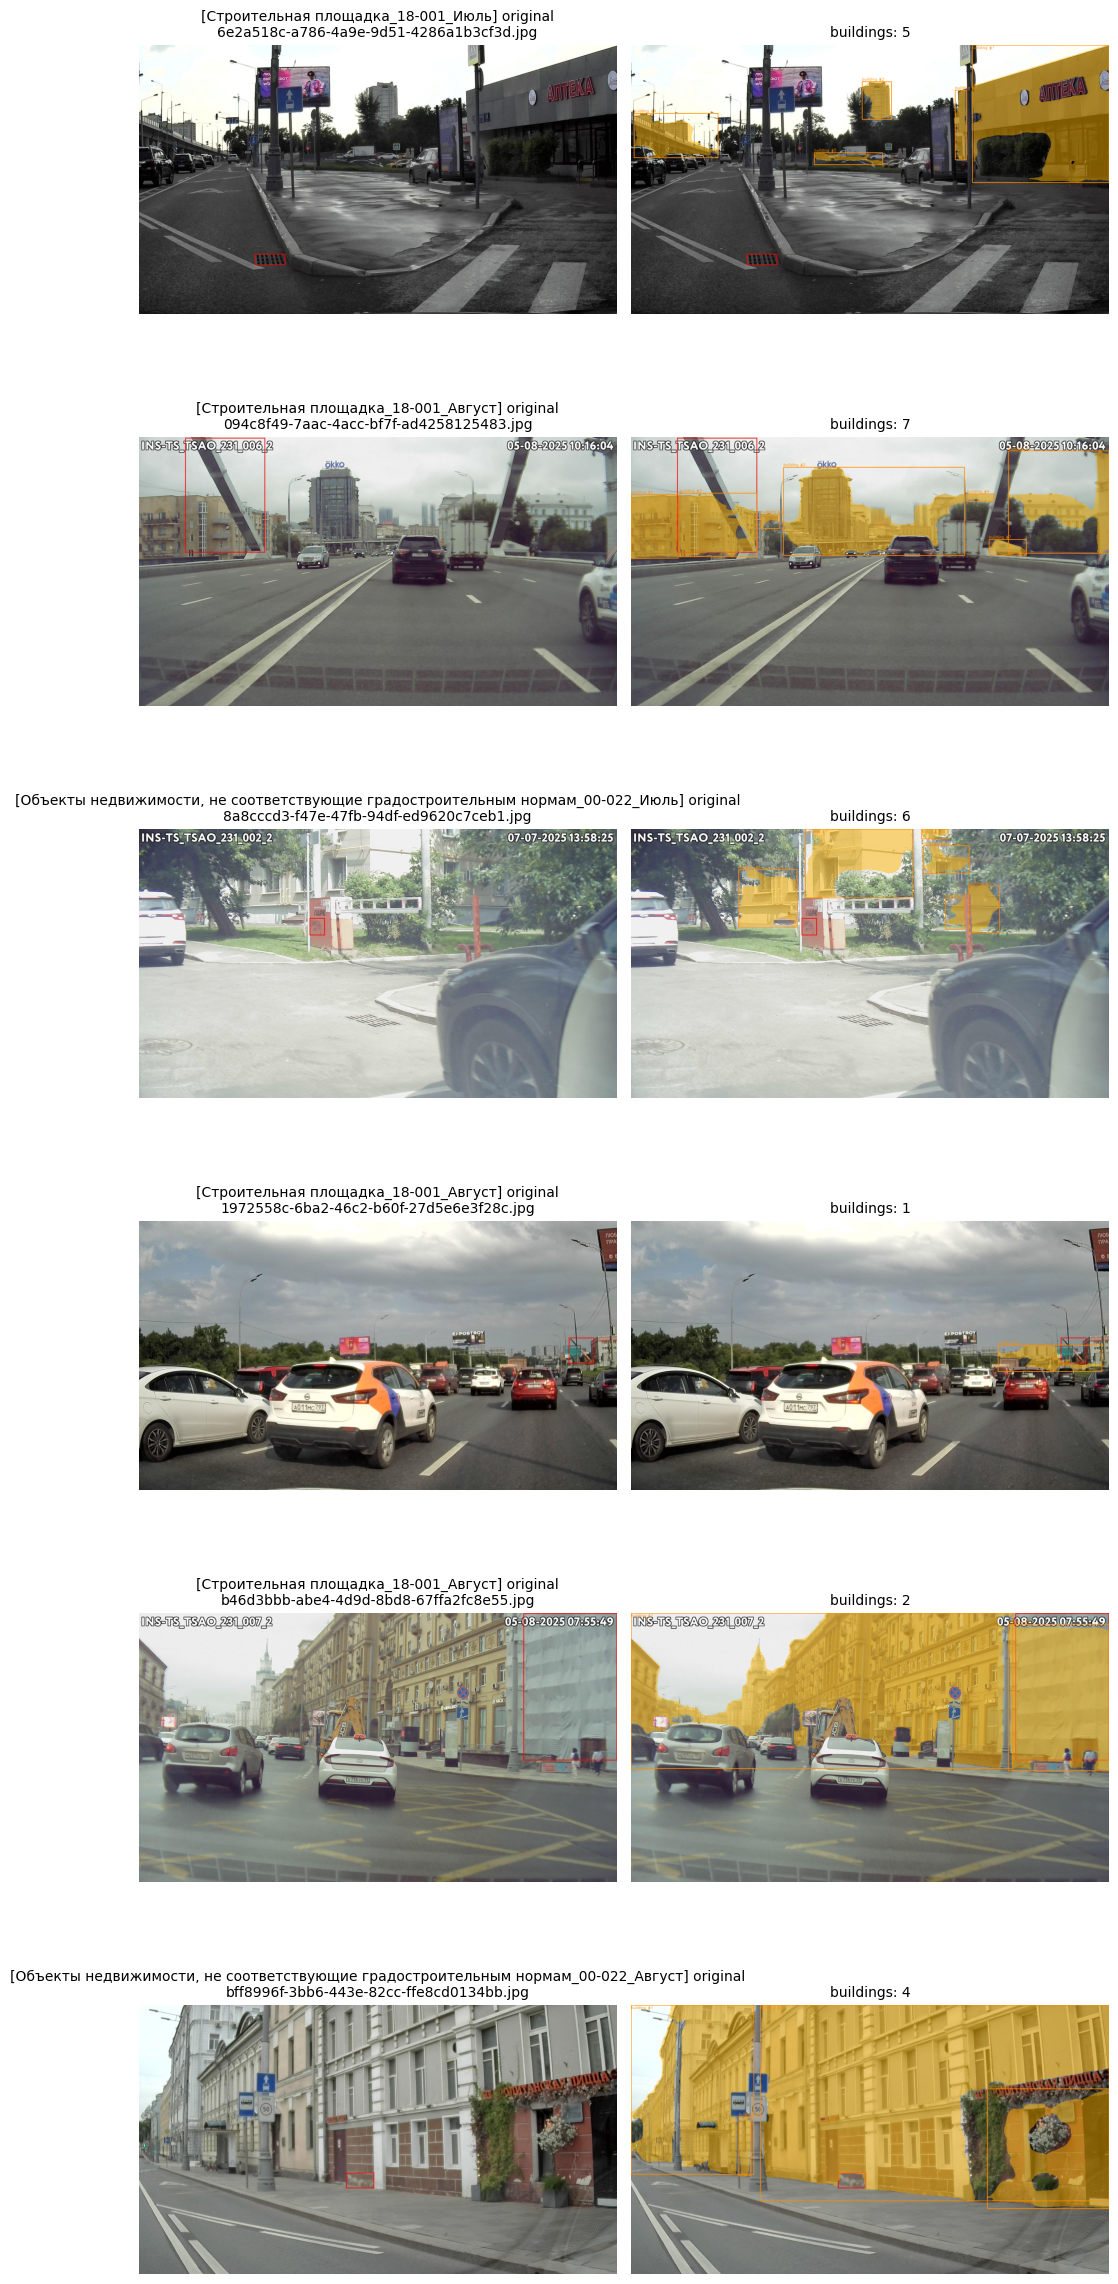

dataset  \
0                  Строительная площадка_18-001_Июль   
1                Строительная площадка_18-001_Август   
2  Объекты недвижимости, не соответствующие градо...   
3                Строительная площадка_18-001_Август   
4                Строительная площадка_18-001_Август   
5  Объекты недвижимости, не соответствующие градо...   

                                       file  \
0  6e2a518c-a786-4a9e-9d51-4286a1b3cf3d.jpg   
1  094c8f49-7aac-4acc-bf7f-ad4258125483.jpg   
2  8a8cccd3-f47e-47fb-94df-ed9620c7ceb1.jpg   
3  1972558c-6ba2-46c2-b60f-27d5e6e3f28c.jpg   
4  b46d3bbb-abe4-4d9d-8bd8-67ffa2fc8e55.jpg   
5  bff8996f-3bb6-443e-82cc-ffe8cd0134bb.jpg   

                                                path  n_buildings  
0  /tmp/Строительная площадка_18-001_Июль/Строите...            5  
1  /tmp/Строительная площадка_18-001_Август/Строи...            7  
2  /tmp/Объекты недвижимости, не соответствующие ...            6  
3  /tmp/Строительная площадка_18-001_Август/Строи...            1  
4  /tmp/Строительная площадка_18-001_Август/Строи...            2  
5  /tmp/Объекты недвижимости, не соответствующие ...            4

In [ ]:
# Mask2Former panoptic → building masks: quick sanity-check on a few random images
# (If the pretrained model isn't cached locally, the code will still show random images without overlays,
#  and print a clear message.)

import os, random, json, math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Try to import transformers + Mask2Former
TRANSFORMERS_OK = True
try:
    import torch
    from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation
except Exception as e:
    TRANSFORMERS_OK = False
    torch = None
    print("[WARN] transformers/Mask2Former unavailable in this environment:", e)

# ---- Helper: pick random images across your loaded datasets ----
def sample_images_from_loaded_data(loaded_data, k_total=6, img_col='Полный путь к файлу'):
    pool = []
    for ds_name, bundle in loaded_data.items():
        df = bundle.get("xlsx", None)
        if df is None or img_col not in df.columns:
            continue
        # keep only rows with existing files
        for p in df[img_col].dropna().tolist():
            if isinstance(p, str) and os.path.exists(p):
                pool.append((ds_name, p))
    if not pool:
        return []
    random.shuffle(pool)
    return pool[:k_total]

# ---- Load model (if available) ----
MODEL_ID = "facebook/mask2former-swin-large-mapillary-vistas-panoptic"
DEVICE = "cuda" if (TRANSFORMERS_OK and hasattr(torch, "cuda") and torch.cuda.is_available()) else "cpu"

processor = None
model = None
id2label = {}
building_label_ids = []

if TRANSFORMERS_OK:
    try:
        processor = AutoImageProcessor.from_pretrained(MODEL_ID)
        model = Mask2FormerForUniversalSegmentation.from_pretrained(MODEL_ID).to(DEVICE).eval()
        id2label = model.config.id2label
        building_label_ids = [i for i, lab in id2label.items() if "building" in lab.lower()]
        print(f"[INFO] Loaded {MODEL_ID} on {DEVICE} | building_label_ids={building_label_ids}")
    except Exception as e:
        print("[WARN] Could not load Mask2Former model (likely no internet/cache). Will skip overlays.\n ", e)
        model = None

# ── функция инференса с правкой CPU→NumPy ─────────────────────────────────────
def run_panoptic_buildings(img_pil, score_thresh=0.4, min_area_px=800):
    """
    Returns overlay PIL image and list of instances (mask, bbox, score, label).
    If model is None, returns the original image and empty list.
    """
    if model is None or processor is None or not building_label_ids:
        return img_pil, []

    orig_w, orig_h = img_pil.size

    # (опц.) даунскейл для скорости
    max_side = 1280
    scale = 1.0
    if max(orig_w, orig_h) > max_side:
        scale = max_side / float(max(orig_w, orig_h))
        new_w = int(orig_w * scale)
        new_h = int(orig_h * scale)
        img_in = img_pil.resize((new_w, new_h), Image.BICUBIC)
    else:
        img_in = img_pil

    inputs = processor(images=img_in, return_tensors="pt").to(DEVICE)
    with torch.no_grad():
        outputs = model(**inputs)

    # ВАЖНО: постпроцесс возвращает тензоры → переводим на CPU прежде чем в numpy
    panoptic = processor.post_process_panoptic_segmentation(
        outputs, target_sizes=[img_in.size[::-1]]
    )[0]

    seg_tensor = panoptic["segmentation"]                 # torch.Tensor [H,W] на DEVICE
    seg = seg_tensor.detach().cpu().numpy()               # → NumPy для дальнейшей логики

    # segments_info может содержать тензоры в полях — приведём к питоновским типам
    seg_infos = []
    for si in panoptic["segments_info"]:
        label_id = int(si["label_id"]) if isinstance(si["label_id"], torch.Tensor) else si["label_id"]
        score = float(si.get("score", 1.0))
        seg_id = int(si["id"]) if isinstance(si["id"], torch.Tensor) else si["id"]
        seg_infos.append({"label_id": label_id, "score": score, "id": seg_id})

    instances = []
    for si in seg_infos:
        if si["label_id"] not in building_label_ids:
            continue
        if si["score"] < score_thresh:
            continue
        seg_id = si["id"]
        mask = (seg == seg_id).astype(np.uint8)
        area = int(mask.sum())
        if area < min_area_px:
            continue

        # апскейл маски назад к оригиналу (если был скейл)
        if abs(scale - 1.0) > 1e-6:
            mask_img = Image.fromarray(mask * 255).resize((orig_w, orig_h), Image.NEAREST)
            mask = (np.array(mask_img) > 127).astype(np.uint8)

        ys, xs = np.where(mask)
        if ys.size == 0 or xs.size == 0:
            continue
        y1, y2 = int(ys.min()), int(ys.max())
        x1, x2 = int(xs.min()), int(xs.max())

        instances.append({
            "mask": mask,
            "bbox": (x1, y1, x2, y2),
            "score": si["score"],
            "label": id2label.get(si["label_id"], f"id:{si['label_id']}")
        })

    # Оверлей
    base = np.array(img_pil).copy()
    overlay = base.copy()
    if instances:
        color = np.array([255, 180, 0], dtype=np.float32)
        for inst in instances:
            m = inst["mask"].astype(bool)
            overlay[m] = (0.5 * color + 0.5 * overlay[m]).astype(np.uint8)

    # bbox’ы (если есть cv2)
    try:
        import cv2
        overlay_bgr = overlay[:, :, ::-1].copy()
        for inst in instances:
            x1, y1, x2, y2 = inst["bbox"]
            cv2.rectangle(overlay_bgr, (x1, y1), (x2, y2), (0, 140, 255), 2)
            txt = f"{inst['label']} {inst['score']:.2f}"
            cv2.putText(overlay_bgr, txt, (x1, max(15, y1 - 5)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 140, 255), 1, cv2.LINE_AA)
        overlay = overlay_bgr[:, :, ::-1]
    except Exception:
        pass

    return Image.fromarray(overlay), instances

def run_building_instances(
    img_pil,
    score_thresh=0.0,          # для семантики не используется, оставлен для совместимости
    min_area_px=800,           # отсекать мелкий мусор
    use_watershed=False,       # включить агрессивное деление слитых зданий
    min_distance_px=10         # параметр для watershed
):
    """
    Возвращает (overlay_PIL, instances), где instances — список словарей:
      { 'mask': np.uint8[H,W] {0,1}, 'bbox': (x1,y1,x2,y2), 'area': int }
    Делит класс 'building' на отдельные инстансы через компоненты связности (и опц. watershed).
    """
    if model is None or processor is None or not building_label_ids:
        return img_pil, []

    orig_w, orig_h = img_pil.size
    max_side = 1280
    scale = 1.0
    if max(orig_w, orig_h) > max_side:
        scale = max_side / float(max(orig_w, orig_h))
        new_w = int(orig_w * scale)
        new_h = int(orig_h * scale)
        img_in = img_pil.resize((new_w, new_h), Image.BICUBIC)
    else:
        img_in = img_pil

    # 1) Семантическая сегментация
    inputs = processor(images=img_in, return_tensors="pt").to(DEVICE)
    with torch.no_grad():
        outputs = model(**inputs)

    sem = processor.post_process_semantic_segmentation(
        outputs, target_sizes=[img_in.size[::-1]]
    )[0]  # torch.LongTensor HxW (на CPU)

    sem = sem.cpu().numpy()
    # building может быть не один id (например, "building" и "building-other").
    build_mask = np.zeros_like(sem, dtype=np.uint8)
    for lid in building_label_ids:
        build_mask |= (sem == lid).astype(np.uint8)

    if build_mask.sum() == 0:
        return img_pil, []

    # 2) Постобработка маски: морфология (немного чистим шум/дыры)
    try:
        import cv2
        kernel = np.ones((3,3), np.uint8)
        build_mask = cv2.morphologyEx(build_mask, cv2.MORPH_OPEN, kernel, iterations=1)
        build_mask = cv2.morphologyEx(build_mask, cv2.MORPH_CLOSE, kernel, iterations=1)
    except Exception:
        pass

    # 3) (опционально) watershed, чтобы разделять слипшиеся блоки
    if use_watershed:
        try:
            import cv2
            # расстояние до фона
            dist = cv2.distanceTransform((build_mask>0).astype(np.uint8), cv2.DIST_L2, 5)
            # ищем пики расстояния
            peak = (dist > max(dist.max()*0.3, min_distance_px)).astype(np.uint8)
            # маркеры
            num_markers, markers = cv2.connectedComponents(peak)
            markers = markers + 1
            markers[build_mask==0] = 0
            # сам watershed
            rgb = np.dstack([build_mask*255]*3).astype(np.uint8)
            cv2.watershed(rgb, markers)
            # маркеры >1 — разные компоненты
            cc = (markers>1).astype(np.uint8)
            # переиспользуем как маску для связностей далее
            build_mask = cc * (build_mask>0).astype(np.uint8)
        except Exception:
            pass

    # 4) Компоненты связности → инстансы
    try:
        import cv2
        num, lab, stats, _ = cv2.connectedComponentsWithStats(build_mask, connectivity=8)
        # stats: [label, x, y, w, h, area]
        instances = []
        for lbl in range(1, num):
            area = int(stats[lbl, cv2.CC_STAT_AREA])
            if area < min_area_px:
                continue
            x, y, w, h, = (int(stats[lbl, cv2.CC_STAT_LEFT]),
                           int(stats[lbl, cv2.CC_STAT_TOP]),
                           int(stats[lbl, cv2.CC_STAT_WIDTH]),
                           int(stats[lbl, cv2.CC_STAT_HEIGHT]))
            mask = (lab == lbl).astype(np.uint8)

            # апскейл к оригиналу
            if abs(scale - 1.0) > 1e-6:
                mask = np.array(Image.fromarray(mask*255).resize((orig_w, orig_h), Image.NEAREST)) > 127
                mask = mask.astype(np.uint8)
                x = int(x/scale); y = int(y/scale); w = int(w/scale); h = int(h/scale)

            instances.append({
                "mask": mask,
                "bbox": (x, y, x+w, y+h),
                "area": int(mask.sum())
            })
    except Exception:
        # без cv2 — fallback на scipy.ndimage
        from scipy import ndimage as ndi
        lab, num = ndi.label(build_mask>0)
        instances = []
        for lbl in range(1, num+1):
            mask = (lab == lbl).astype(np.uint8)
            area = int(mask.sum())
            if area < min_area_px:
                continue
            ys, xs = np.where(mask)
            y1, y2 = int(ys.min()), int(ys.max())
            x1, x2 = int(xs.min()), int(xs.max())
            if abs(scale - 1.0) > 1e-6:
                mask = np.array(Image.fromarray(mask*255).resize((orig_w, orig_h), Image.NEAREST)) > 127
                mask = mask.astype(np.uint8)
                x1 = int(x1/scale); x2 = int(x2/scale)
                y1 = int(y1/scale); y2 = int(y2/scale)
            instances.append({"mask": mask, "bbox": (x1,y1,x2,y2), "area": area})

    # 5) Оверлей
    base = np.array(img_pil).copy()
    overlay = base.copy()
    if instances:
        color = np.array([255, 180, 0], dtype=np.float32)
        for inst in instances:
            m = inst["mask"].astype(bool)
            overlay[m] = (0.5*color + 0.5*overlay[m]).astype(np.uint8)

    # 6) Боксы и подписи
    try:
        import cv2
        overlay_bgr = overlay[:, :, ::-1].copy()
        for k, inst in enumerate(instances, 1):
            x1, y1, x2, y2 = inst["bbox"]
            cv2.rectangle(overlay_bgr, (x1, y1), (x2, y2), (0, 140, 255), 2)
            cv2.putText(overlay_bgr, f"building #{k}", (x1, max(15, y1-5)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,140,255), 1, cv2.LINE_AA)
        overlay = overlay_bgr[:, :, ::-1]
    except Exception:
        pass

    return Image.fromarray(overlay), instances


# ---- Run on a few random images ----
# Expect `loaded_data` to be present per your earlier cell.
if 'loaded_data' not in globals():
    raise RuntimeError("`loaded_data` not found. Please run your data-loading cell first.")

samples = sample_images_from_loaded_data(loaded_data, k_total=6, img_col='Полный путь к файлу')
if not samples:
    raise RuntimeError("No images found across datasets. Check that ZIPs were extracted and paths are correct.")

print(f"[INFO] Sampling {len(samples)} images from {len(loaded_data)} datasets.")
ncols = 2
nrows = len(samples)
fig = plt.figure(figsize=(10, 4*nrows))

results_table = []

for i, (ds_name, path) in enumerate(samples):
    try:
        img = Image.open(path).convert("RGB")
    except Exception as e:
        print(f"[WARN] failed to open {path}: {e}")
        continue

    overlay, inst = run_building_instances(img, score_thresh=0.4, min_area_px=800)
    results_table.append({
        "dataset": ds_name,
        "file": os.path.basename(path),
        "path": path,
        "n_buildings": len(inst)
    })

    ax1 = fig.add_subplot(nrows, ncols, 2*i+1)
    ax1.imshow(img)
    ax1.set_title(f"[{ds_name}] original\n{os.path.basename(path)}", fontsize=10)
    ax1.axis("off")

    ax2 = fig.add_subplot(nrows, ncols, 2*i+2)
    ax2.imshow(overlay)
    ax2.set_title(f"buildings: {len(inst)}", fontsize=10)
    ax2.axis("off")

plt.tight_layout()
plt.show()

summary_df = pd.DataFrame(results_table)
summary_df


# Координаты

In [ ]:
df = loaded_data['Строительная площадка_18-001_Август']["xlsx"]
df

Имя файла  Гиперссылка  \
0      4245ac8c-8289-40dd-a9b6-a07ad02b707e.jpg          NaN   
1      c8f0715e-414e-400c-b3fa-7ce3109179f7.jpg          NaN   
2      b93a5575-2e4c-410f-891c-b08859c22d6b.jpg          NaN   
3      5906532f-4060-457e-b9fe-88807680c50f.jpg          NaN   
4      21586c1e-c686-422d-8518-184826de6d60.jpg          NaN   
...                                         ...          ...   
14995  36306e67-c8c8-4db7-8423-28de3b2c3389.jpg          NaN   
14996  3f5e9824-af85-40f2-b93a-bf87dc8f91b1.jpg          NaN   
14997  f9b7591f-6f98-427b-9609-199416924515.jpg          NaN   
14998  0b8251fe-f2b0-4b95-9fdf-07934f17058d.jpg          NaN   
14999  1c6a5efa-a8a6-488b-ba9f-54162ef923a6.jpg          NaN   

                                     camera  latitude  longitude  TP  FP  \
0      fb40ed24-21ef-458a-a239-038ab19932cc  55.89481   37.68944 NaN NaN   
1      fb40ed24-21ef-458a-a239-038ab19932cc  55.91006   37.59163 NaN NaN   
2      797901ad-53b1-41b8-99d1-d59d59c863d5  55.91006   37.59163 NaN NaN   
3      fb40ed24-21ef-458a-a239-038ab19932cc  55.91176   37.58951 NaN NaN   
4      fb40ed24-21ef-458a-a239-038ab19932cc  55.82236   37.77449 NaN NaN   
...                                     ...       ...        ...  ..  ..   
14995  fb40ed24-21ef-458a-a239-038ab19932cc  55.78709   37.74344 NaN NaN   
14996  a28f597e-d1cd-4d3b-b572-c86d033412e9  55.75496   37.50466 NaN NaN   
14997  caa4772d-6278-4484-a046-ee25514bf521  55.77742   37.51552 NaN NaN   
14998  b23a39fd-838c-435a-bacd-b4d6bb842c62  55.72639   37.66484 NaN NaN   
14999  fb9a37cc-57a6-447c-98bb-0b299f09c809  55.72639   37.66484 NaN NaN   

       Да/Нет                                Полный путь к файлу  
0         NaN  /tmp/Строительная площадка_18-001_Август/Строи...  
1         NaN  /tmp/Строительная площадка_18-001_Август/Строи...  
2         NaN  /tmp/Строительная площадка_18-001_Август/Строи...  
3         NaN  /tmp/Строительная площадка_18-001_Август/Строи...  
4         NaN  /tmp/Строительная площадка_18-001_Август/Строи...  
...       ...                                                ...  
14995     NaN  /tmp/Строительная площадка_18-001_Август/Строи...  
14996     NaN  /tmp/Строительная площадка_18-001_Август/Строи...  
14997     NaN  /tmp/Строительная площадка_18-001_Август/Строи...  
14998     NaN  /tmp/Строительная площадка_18-001_Август/Строи...  
14999     NaN  /tmp/Строительная площадка_18-001_Август/Строи...  

[15000 rows x 9 columns]

In [ ]:
camera_stats = {}

for obj_name, data in loaded_data.items():
    df = data.get("xlsx") # Use .get() to safely access the xlsx key
    if df is not None and 'camera' in df.columns:
        print(f"Calculating camera stats for: {obj_name}")
        # Group by 'camera' and count the occurrences
        camera_counts = df.groupby('camera').size()

        # Calculate average and maximum
        average_frames_per_camera = camera_counts.mean() if not camera_counts.empty else 0
        max_frames_per_camera = camera_counts.max() if not camera_counts.empty else 0

        # Count cameras with more than 10 frames
        cameras_with_more_than_10_frames = (camera_counts > 10).sum()

        camera_stats[obj_name] = {
            "average_frames": average_frames_per_camera,
            "max_frames": max_frames_per_camera,
            "cameras_gt_10_frames": cameras_with_more_than_10_frames # Add the new count
        }
    else:
        print(f"Skipping {obj_name}: No DataFrame or 'camera' column found.")

# Display the results
for obj_name, stats in camera_stats.items():
    print(f"\nСтатистика по камерам для '{obj_name}':")
    print(f"  Среднее количество кадров на камеру: {stats['average_frames']:.2f}")
    print(f"  Максимальное количество кадров на камеру: {stats['max_frames']}")
    print(f"  Количество камер с более чем 10 кадрами: {stats['cameras_gt_10_frames']}") # Display the new count

Calculating camera stats for: Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август
Calculating camera stats for: Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль
Calculating camera stats for: Строительная площадка_18-001_Август
Calculating camera stats for: Строительная площадка_18-001_Июль

Статистика по камерам для 'Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август':
  Среднее количество кадров на камеру: 148.72
  Максимальное количество кадров на камеру: 1610
  Количество камер с более чем 10 кадрами: 74

Статистика по камерам для 'Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль':
  Среднее количество кадров на камеру: 102.80
  Максимальное количество кадров на камеру: 708
  Количество камер с более чем 10 кадрами: 75

Статистика по камерам для 'Строительная площадка_18-001_Август':
  Среднее количество кадров на камеру: 187.50
  Максимальное количество кадров на камер

Выбрана случайная камера с ID: 9ca2abb7-5978-4e19-b2b4-4d185fa6739e (более 10 кадров) из объекта 'Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август'

Отображение 5 случайных изображений для камеры 9ca2abb7-5978-4e19-b2b4-4d185fa6739e:
  Отображение изображения: /tmp/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август/7a2fcbe5-62a5-4539-8ba2-aa212949f59f.jpg


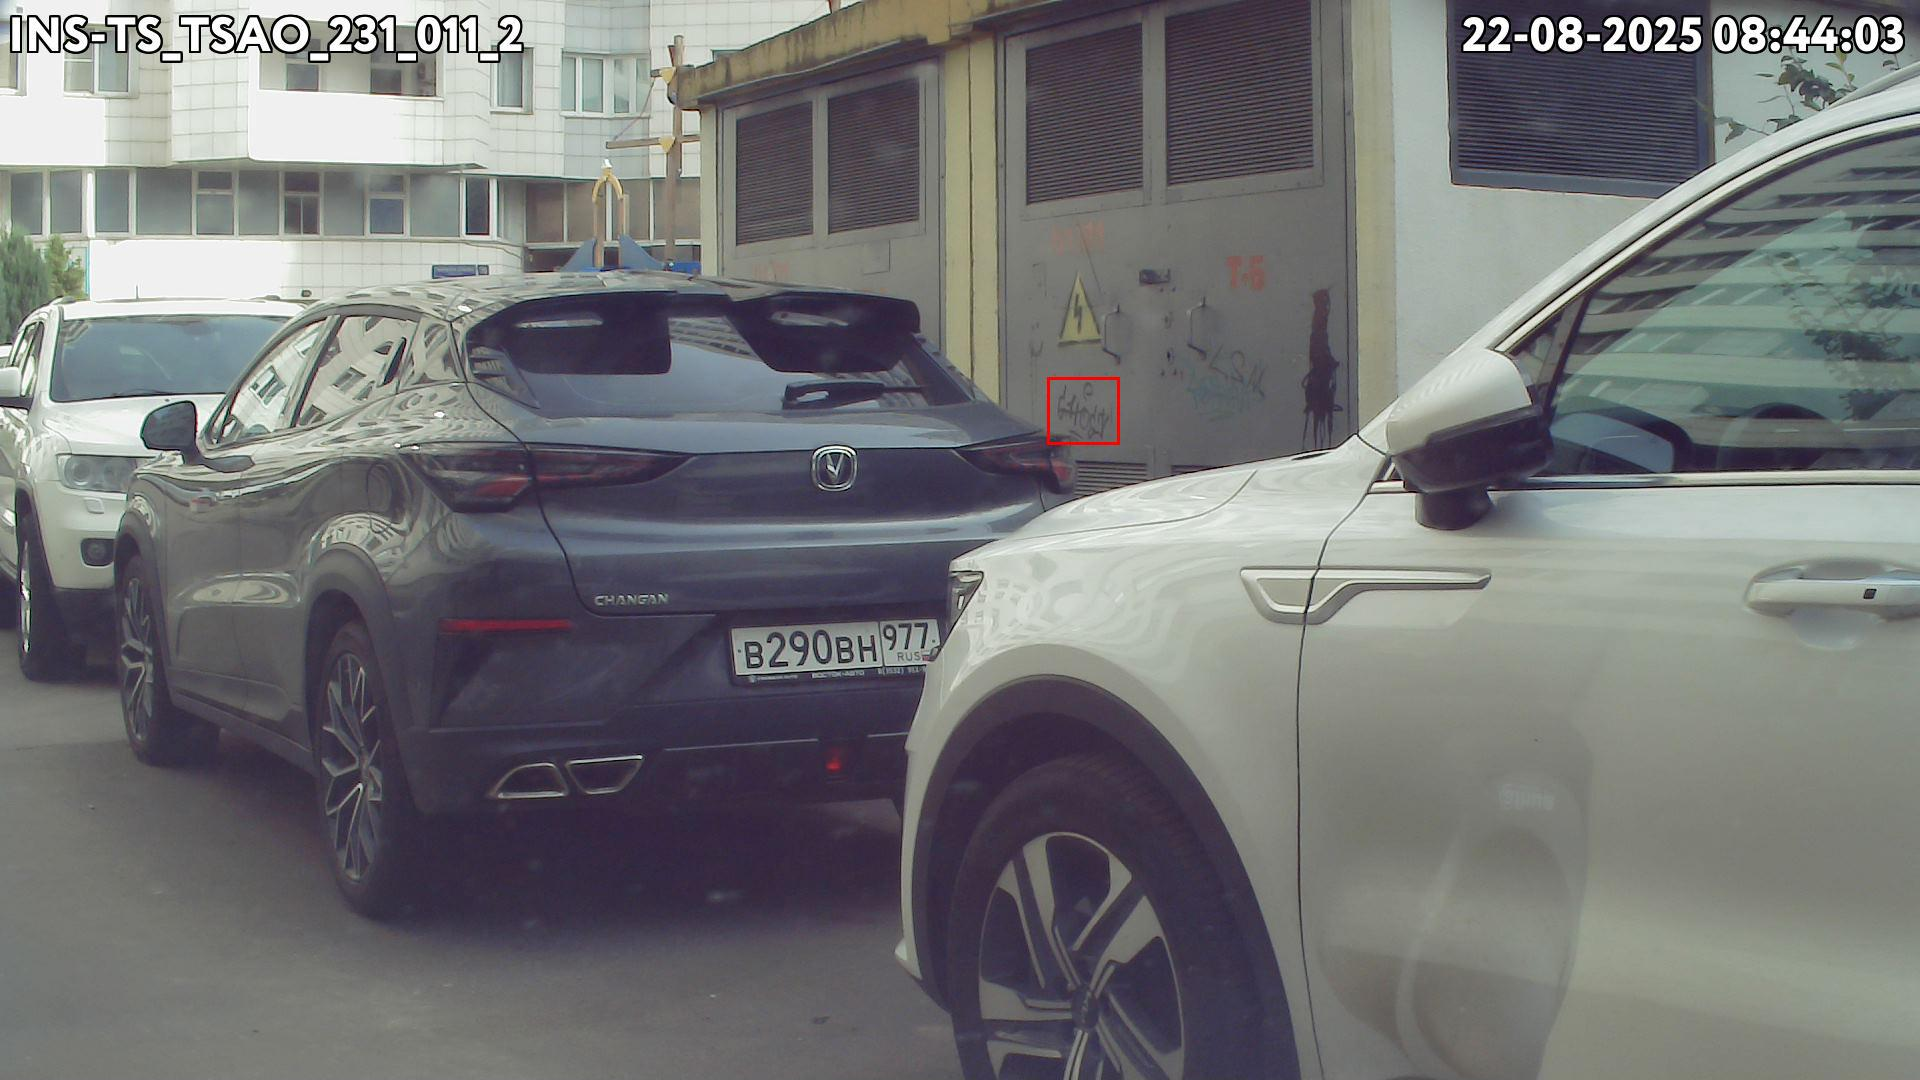

  Отображение изображения: /tmp/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август/ff459712-fcfc-4d3f-8a31-9b34e4f019c3.jpg


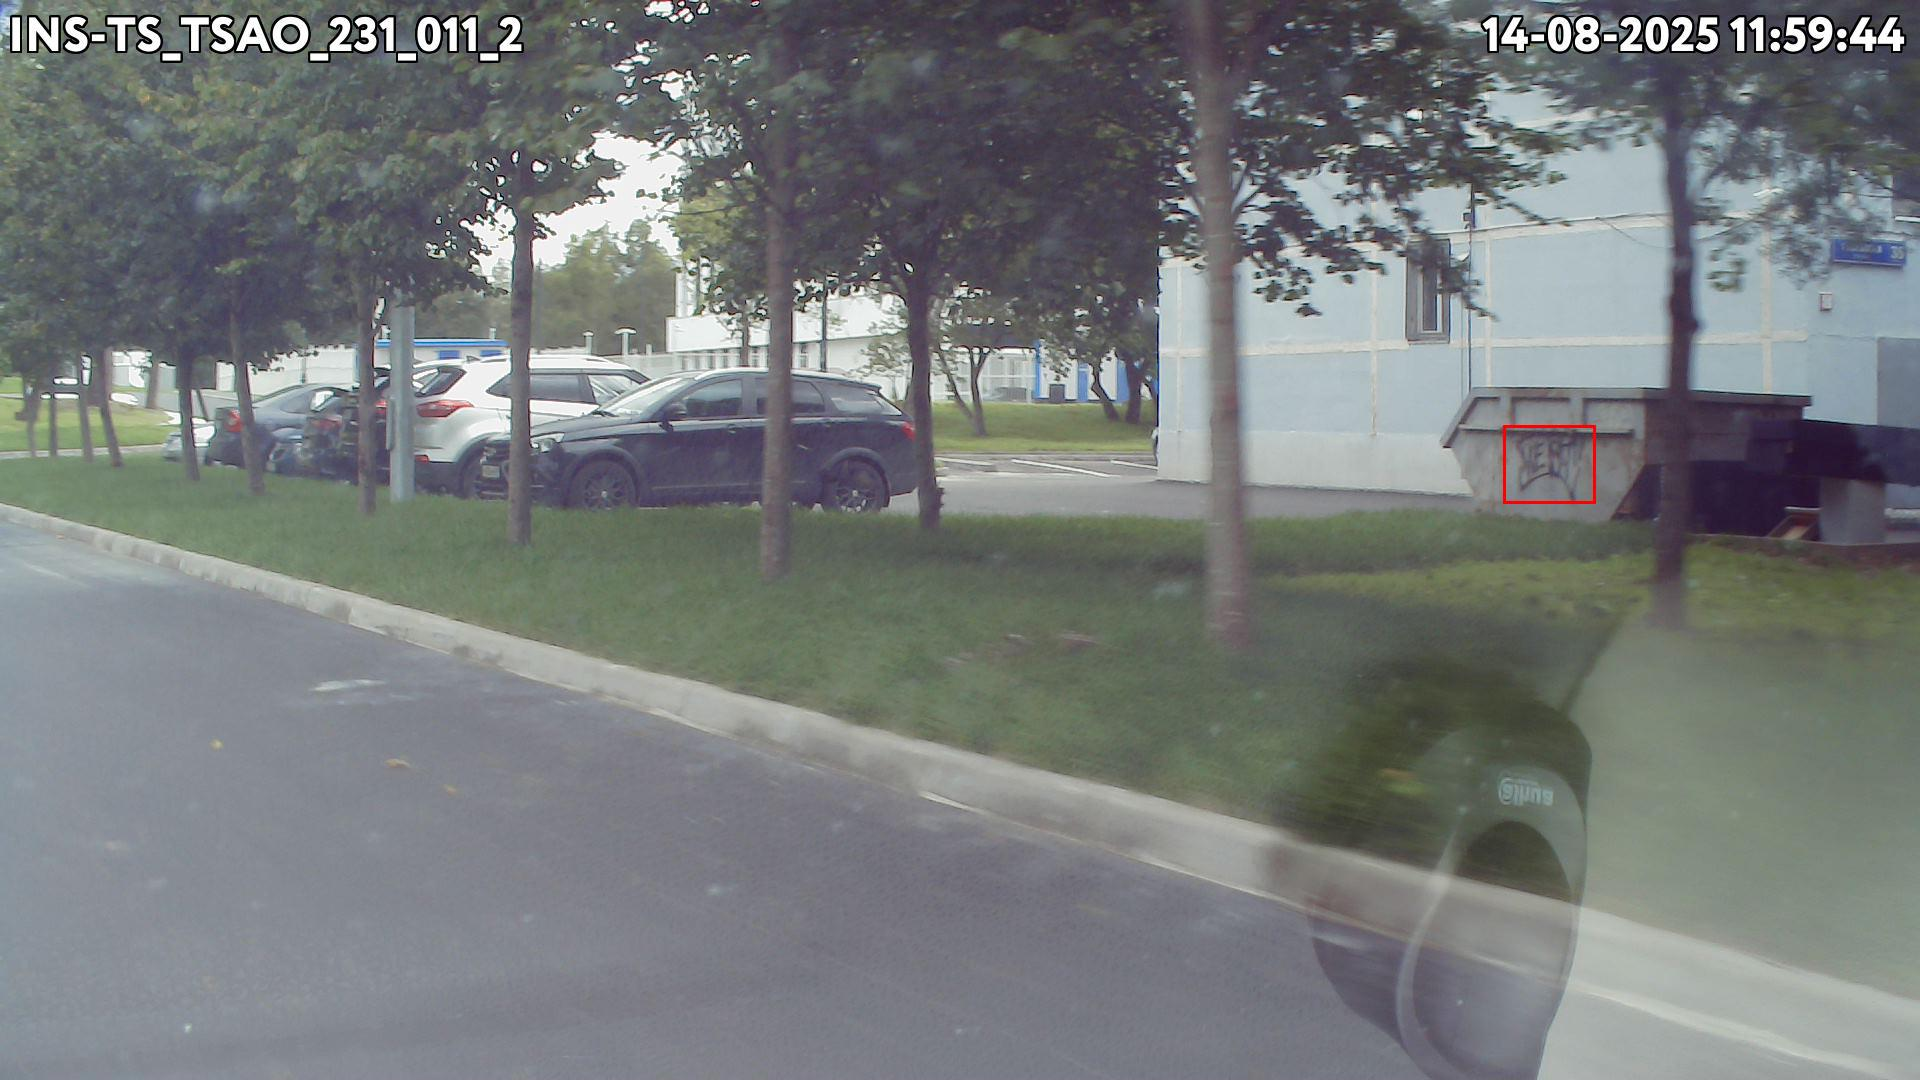

  Отображение изображения: /tmp/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август/2ca4a7eb-589a-42af-9d0c-dfbec04feb31.jpg


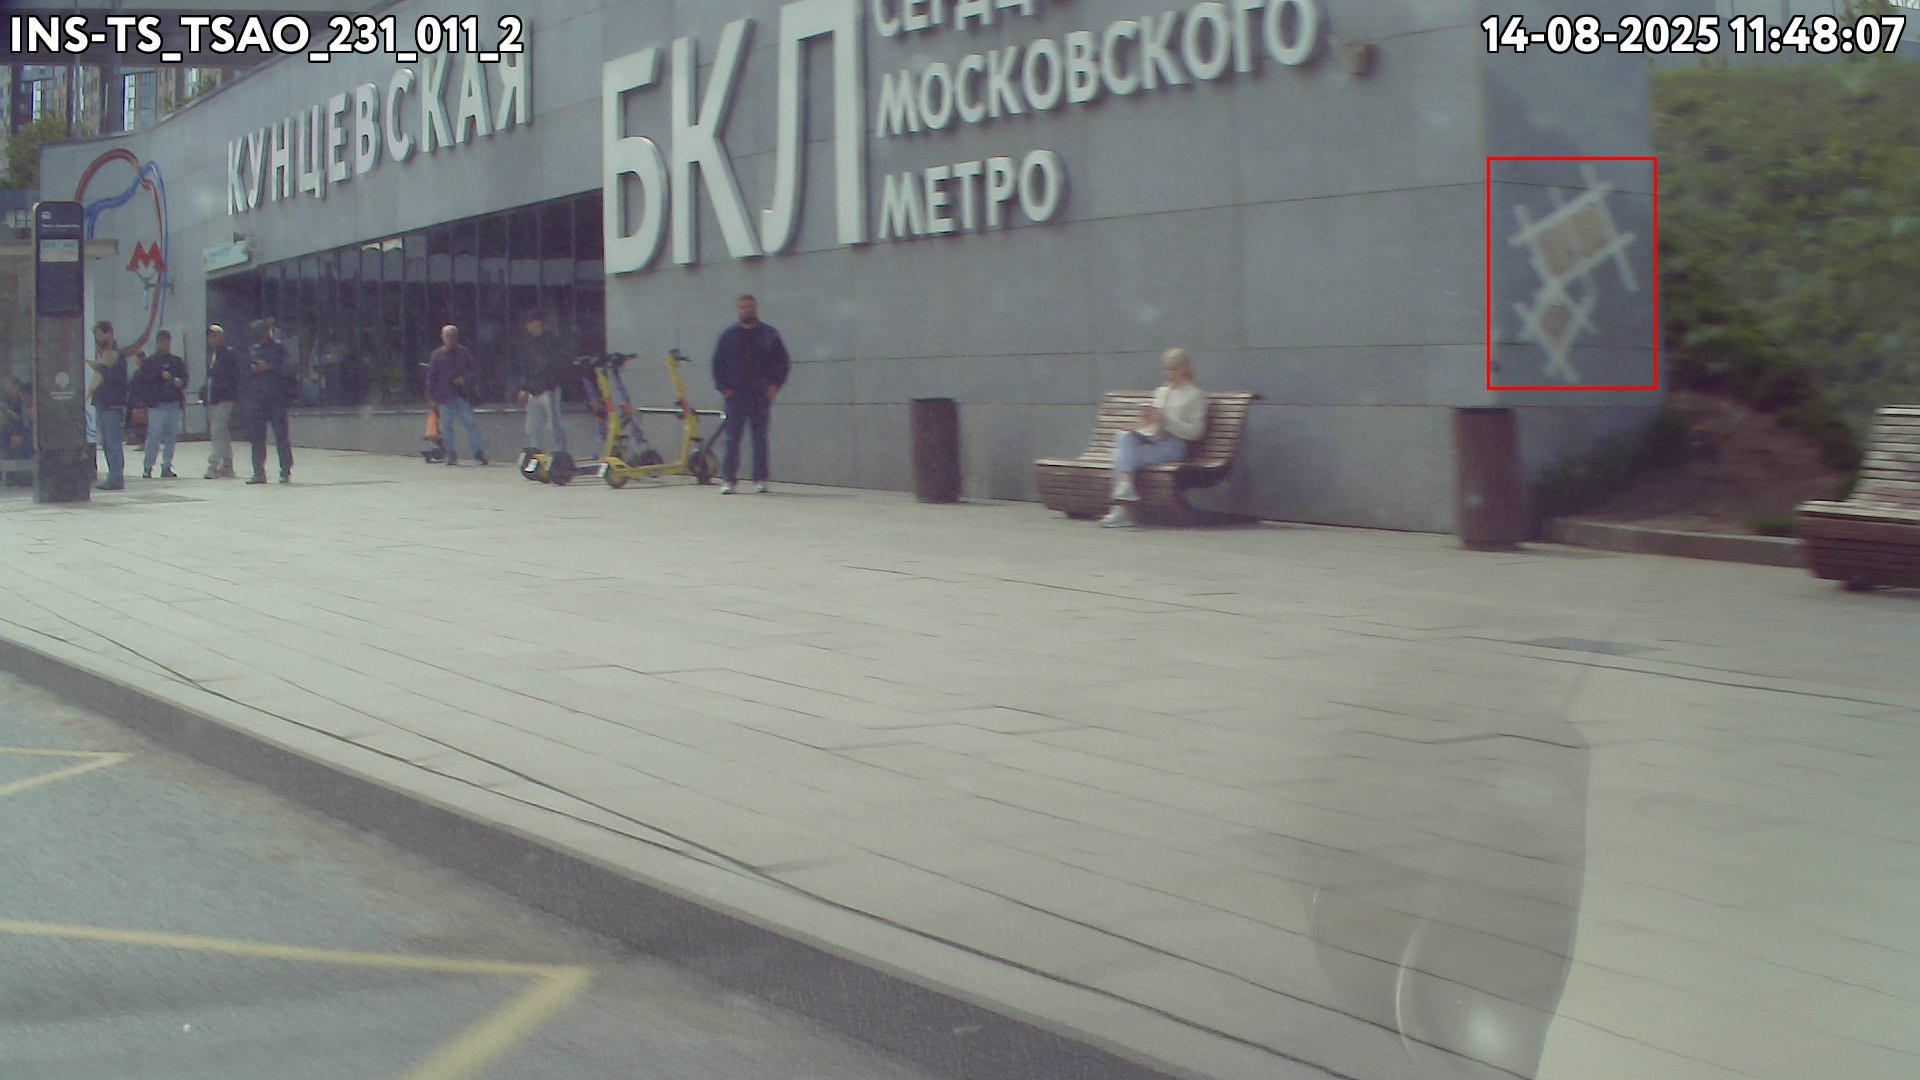

  Отображение изображения: /tmp/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август/c534e391-1405-47fd-9c38-389da47678f7.jpg


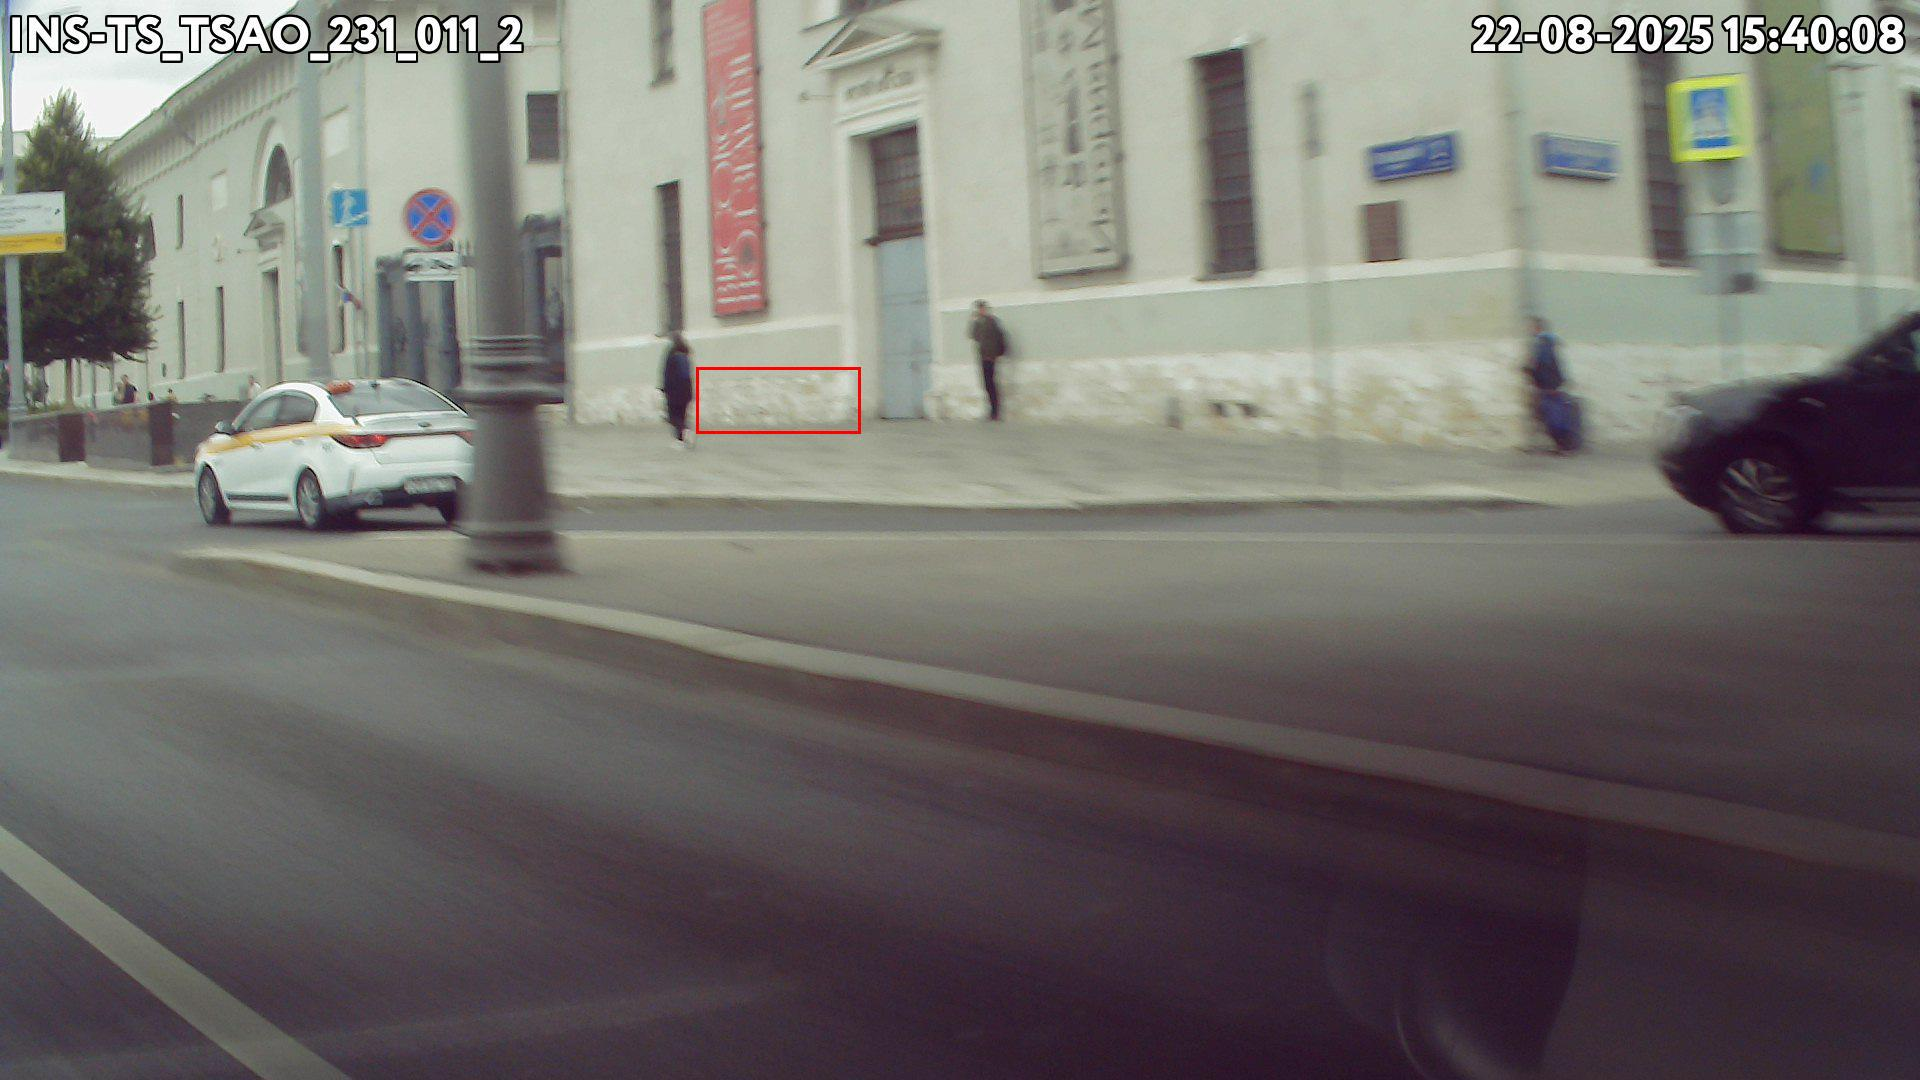

  Отображение изображения: /tmp/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август/7441fd6d-4ea9-4b21-896f-3104669b9f93.jpg


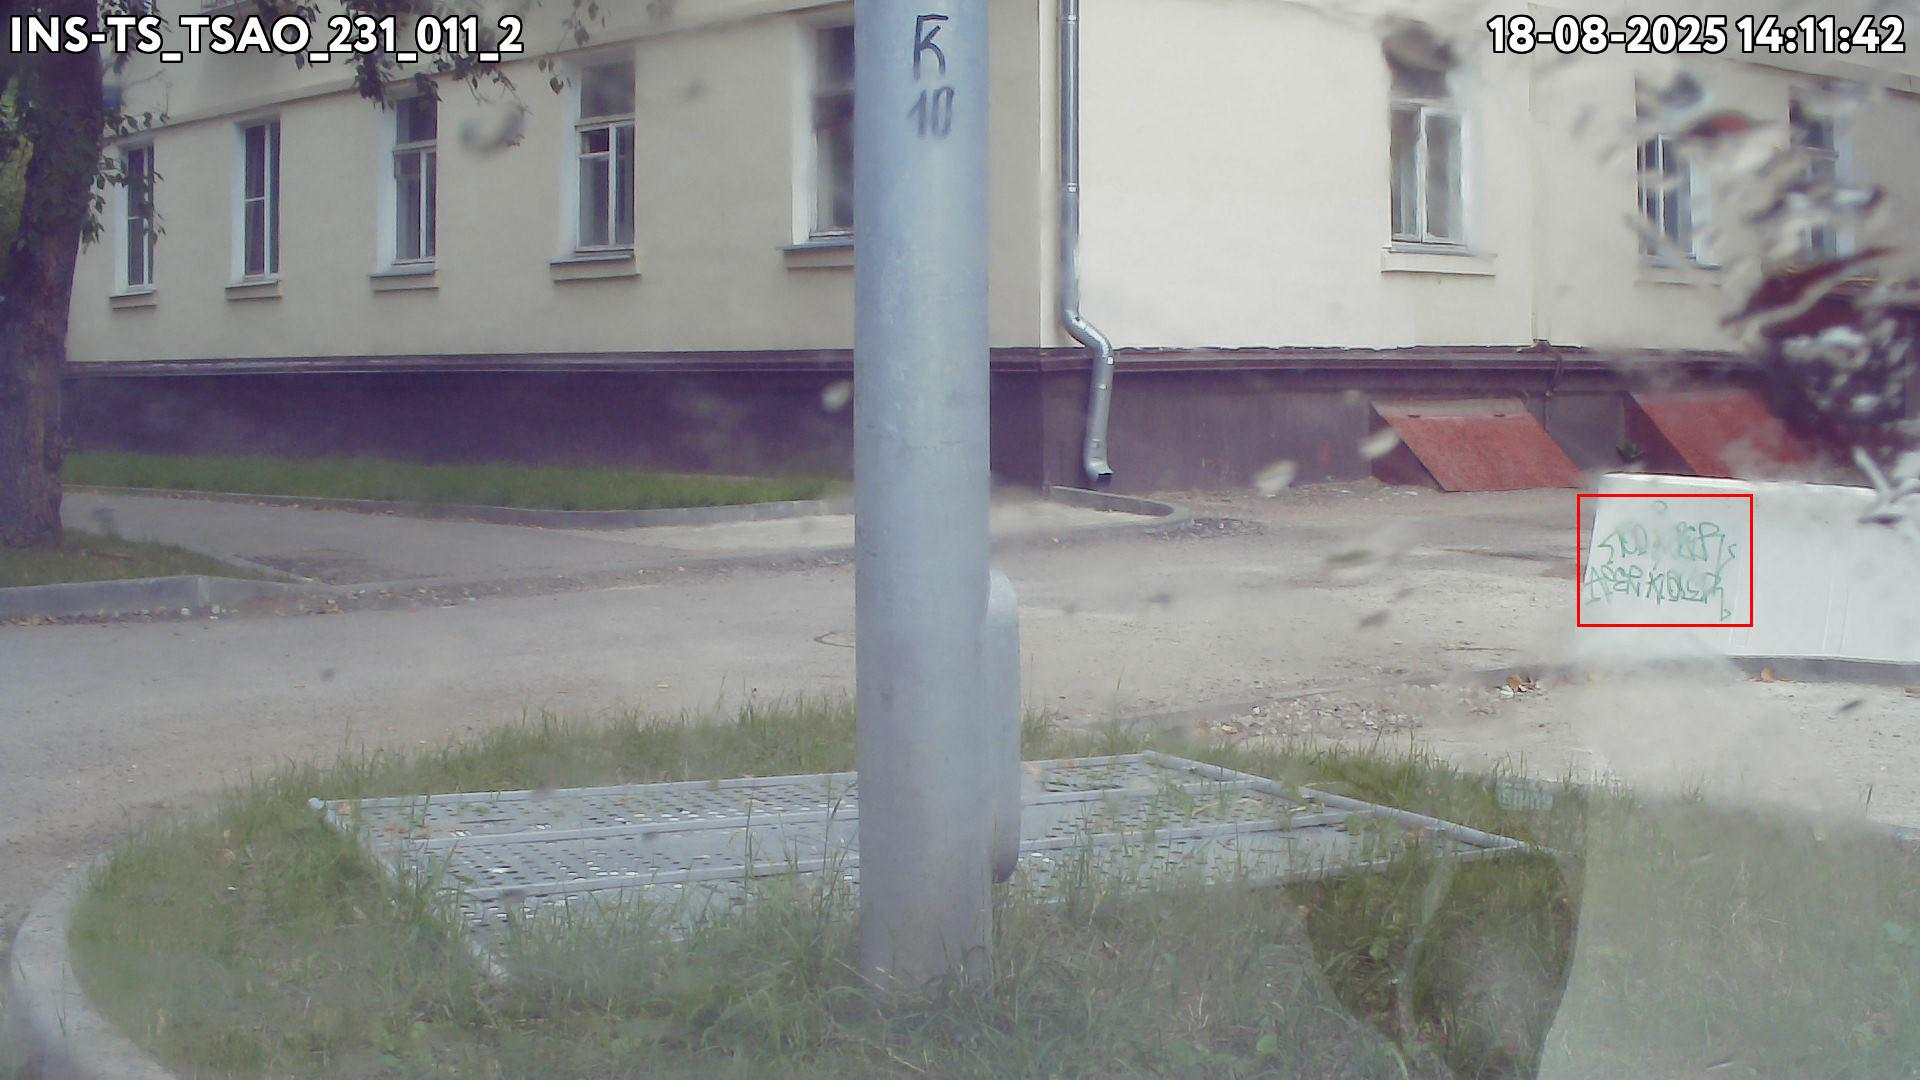

In [ ]:
from IPython.display import display, Image
import random # Import the random module

# Выберите имя объекта
object_name_to_view = "Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август"

df_object = loaded_data[object_name_to_view]["xlsx"]
if df_object is not None and 'camera' in df_object.columns:
    camera_counts = df_object.groupby('camera').size()
    if not camera_counts.empty:
        # Filter cameras with more than 10 frames
        cameras_gt_10 = camera_counts[camera_counts > 10].index.tolist()

        if cameras_gt_10:
            # Select a random camera ID from the filtered list
            camera_id_to_view = random.choice(cameras_gt_10)
            print(f"Выбрана случайная камера с ID: {camera_id_to_view} (более 10 кадров) из объекта '{object_name_to_view}'")

            # Отфильтруйте DataFrame по выбранному идентификатору камеры
            camera_df = df_object[df_object['camera'] == camera_id_to_view]

            # Выберите случайные 5 изображений из отфильтрованного DataFrame
            if 'Полный путь к файлу' in camera_df.columns and not camera_df['Полный путь к файлу'].empty:
                sample_images = camera_df.sample(min(5, len(camera_df))) # Выберите до 5 изображений

                # Отобразите изображения
                print(f"\nОтображение {len(sample_images)} случайных изображений для камеры {camera_id_to_view}:")
                for index, row in sample_images.iterrows():
                    image_path = row['Полный путь к файлу']
                    if os.path.exists(image_path):
                        print(f"  Отображение изображения: {image_path}")
                        display(Image(filename=image_path))
                    else:
                        print(f"  Файл изображения не найден: {image_path}")
            else:
                 print("Столбец 'Полный путь к файлу' не найден или пуст в отфильтрованном DataFrame.")
        else:
            print(f"Нет камер с более чем 10 кадрами для объекта '{object_name_to_view}'.")
    else:
        print(f"Нет данных по камерам для объекта '{object_name_to_view}'.")
else:
    print(f"DataFrame для объекта '{object_name_to_view}' не загружен или не содержит столбца 'camera'.")

In [ ]:
import numpy as np
import pandas as pd

# --- 1) Настройки базлайна ---
# "Центр Москвы" — Кремль (можешь заменить на более подходящий якорь)
BASE_LAT, BASE_LON = 55.751244, 37.618423

# Грубая маска валидных точек по Москве (фильтр мусора)
LAT_MIN, LAT_MAX = 55.2, 56.2
LON_MIN, LON_MAX = 36.5, 38.2

# --- 2) Вспомогательные функции ---

def haversine_m(lat1, lon1, lat2, lon2):
    """
    Векторизованная Haversine-дистанция в метрах между (lat1,lon1) и (lat2,lon2).
    Аргументы — numpy-массивы одинаковой длины или скаляры.
    """
    R = 6371000.0  # радиус Земли, м
    lat1 = np.radians(lat1); lon1 = np.radians(lon1)
    lat2 = np.radians(lat2); lon2 = np.radians(lon2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    c = 2*np.arcsin(np.sqrt(a))
    return R * c

def df_clean_moscow(df, lat_col='latitude', lon_col='longitude'):
    """Фильтрация NaN и выбросов вне Москвы."""
    keep = (
        df[lat_col].notna() & df[lon_col].notna() &
        (df[lat_col] >= LAT_MIN) & (df[lat_col] <= LAT_MAX) &
        (df[lon_col] >= LON_MIN) & (df[lon_col] <= LON_MAX)
    )
    return df.loc[keep].copy()

def metrics_from_errors(err_m):
    """Сводка метрик по массиву ошибок в метрах."""
    if len(err_m) == 0:
        return dict(n=0, mae=np.nan, rmse=np.nan, median=np.nan,
                    p50=np.nan, p90=np.nan, pct_10m=np.nan, pct_25m=np.nan, pct_50m=np.nan)
    return dict(
        n=len(err_m),
        mae=float(np.mean(err_m)),
        rmse=float(np.sqrt(np.mean(err_m**2))),
        median=float(np.median(err_m)),
        p50=float(np.percentile(err_m, 50)),
        p90=float(np.percentile(err_m, 90)),
        pct_10m=float((err_m <= 10).mean()*100.0),
        pct_25m=float((err_m <= 25).mean()*100.0),
        pct_50m=float((err_m <= 50).mean()*100.0),
    )

# --- 3) Подсчёт метрик по каждому набору ---

rows = []
for obj_name, bundle in loaded_data.items():
    df = bundle.get("xlsx")
    if df is None or ('latitude' not in df.columns) or ('longitude' not in df.columns):
        continue

    dfx = df_clean_moscow(df, 'latitude', 'longitude')
    if len(dfx) == 0:
        rows.append({"dataset": obj_name, "note": "no valid points in Moscow", **metrics_from_errors(np.array([]))})
        continue

    # Бейзлайн: всем предсказываем одну точку (центр Москвы)
    pred_lat = np.full(len(dfx), BASE_LAT, dtype=float)
    pred_lon = np.full(len(dfx), BASE_LON, dtype=float)

    err_m = haversine_m(dfx['latitude'].to_numpy(), dfx['longitude'].to_numpy(), pred_lat, pred_lon)

    m = metrics_from_errors(err_m)
    rows.append({"dataset": obj_name, **m})

# Итоговая таблица
baseline_table = pd.DataFrame(rows, columns=[
    "dataset","n","mae","rmse","median","p50","p90","pct_10m","pct_25m","pct_50m"
])

# Отсортируем по median
baseline_table = baseline_table.sort_values(by="median", ascending=True).reset_index(drop=True)
baseline_table

dataset      n           mae  \
0  Объекты недвижимости, не соответствующие градо...  11421  11985.546936   
1  Объекты недвижимости, не соответствующие градо...   8240  11829.073224   
2                Строительная площадка_18-001_Август  14557  12477.555055   
3                  Строительная площадка_18-001_Июль  14438  12622.182145   

           rmse        median           p50           p90  pct_10m  pct_25m  \
0  14813.080913   9935.687155   9935.687155  26725.299187      0.0      0.0   
1  14199.473280  10384.678108  10384.678108  24814.954265      0.0      0.0   
2  14942.747246  10726.124565  10726.124565  26828.335494      0.0      0.0   
3  14789.839000  11135.960258  11135.960258  26804.034686      0.0      0.0   

   pct_50m  
0      0.0  
1      0.0  
2      0.0  
3      0.0

In [ ]:
# Общий пул (агрегируем все валидные точки)
all_err = []
for obj_name, bundle in loaded_data.items():
    df = bundle.get("xlsx")
    if df is None or ('latitude' not in df.columns) or ('longitude' not in df.columns):
        continue
    dfx = df_clean_moscow(df, 'latitude', 'longitude')
    if len(dfx) == 0:
        continue
    err_m = haversine_m(dfx['latitude'].to_numpy(), dfx['longitude'].to_numpy(),
                        np.full(len(dfx), BASE_LAT), np.full(len(dfx), BASE_LON))
    all_err.append(err_m)

if all_err:
    all_err = np.concatenate(all_err)
    overall = pd.DataFrame([metrics_from_errors(all_err)])
    overall


In [ ]:
overall

n           mae          rmse        median           p50  \
0  48656  12295.160508  14743.224993  10734.919906  10734.919906   

            p90  pct_10m  pct_25m  pct_50m  
0  26766.138488      0.0      0.0      0.0

In [ ]:
import numpy as np
import pandas as pd

# --- Константы ---
# "Центр" для дистанций (Кремль)
CTR_LAT, CTR_LON = 55.751244, 37.618423

# Очень широкий бокс по Москве и МО (не режем агрессивно)
LAT_WIDE = (55.3, 56.0)
LON_WIDE = (37.2, 38.0)

# Более "ядровой" бокс (внутренняя Москва) — для справки
LAT_CORE = (55.3, 56.0)
LON_CORE = (37.2, 38.0)

# Круговая маска от центра (альтернатива/дополнение к боксу)
# <70 км — Москва и ближнее Подмосковье; подстрой при необходимости
RADIUS_KM = 70.0

def haversine_m(lat1, lon1, lat2, lon2):
    R = 6371000.0
    lat1 = np.radians(lat1); lon1 = np.radians(lon1)
    lat2 = np.radians(lat2); lon2 = np.radians(lon2)
    dlat = lat2 - lat1; dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    return R * (2*np.arcsin(np.sqrt(a)))

def add_coord_flags(df, lat_col='latitude', lon_col='longitude'):
    dfx = df.copy()
    # валидность чисел
    dfx['coord_notna'] = dfx[lat_col].notna() & dfx[lon_col].notna()

    # широкие/ядровые боксы
    dfx['in_wide_box'] = (
        dfx[lat_col].between(*LAT_WIDE) &
        dfx[lon_col].between(*LON_WIDE)
    )
    dfx['in_core_box'] = (
        dfx[lat_col].between(*LAT_CORE) &
        dfx[lon_col].between(*LON_CORE)
    )

    # дистанция от центра
    dfx['dist_m_from_center'] = haversine_m(dfx[lat_col], dfx[lon_col], CTR_LAT, CTR_LON)
    dfx['in_radius'] = (dfx['dist_m_from_center'] <= RADIUS_KM*1000)

    # итоговая маска "Москва ок" (логика: валидные числа И (в широком боксе ИЛИ в радиусе))
    dfx['moscow_ok'] = dfx['coord_notna'] & (dfx['in_wide_box'] | dfx['in_radius'])

    return dfx

def summarize_coords(dfx, name, lat_col='latitude', lon_col='longitude'):
    n = len(dfx)
    n_notna = int(dfx['coord_notna'].sum())
    n_ok = int(dfx['moscow_ok'].sum())
    n_core = int(dfx['in_core_box'].sum())

    # базовые статистики по валидным координатам
    valid = dfx[dfx['coord_notna']]
    if len(valid):
        lat_min, lat_max = valid[lat_col].min(), valid[lat_col].max()
        lon_min, lon_max = valid[lon_col].min(), valid[lon_col].max()
        dists = valid['dist_m_from_center'].values
        stats = {
            'dist_m_median': float(np.median(dists)),
            'dist_m_p90': float(np.percentile(dists, 90)),
            'dist_m_max': float(np.max(dists)),
        }
    else:
        lat_min=lat_max=lon_min=lon_max=np.nan
        stats = {'dist_m_median':np.nan,'dist_m_p90':np.nan,'dist_m_max':np.nan}

    print(f"\n== {name} ==")
    print(f"Всего строк: {n}")
    print(f"Координаты notna: {n_notna} ({n_notna/n*100:.1f}%)")
    print(f"moscow_ok: {n_ok} ({n_ok/n*100:.1f}%) | in_core_box: {n_core} ({n_core/n*100:.1f}%)")
    print(f"Lat range: [{lat_min:.5f}, {lat_max:.5f}] | Lon range: [{lon_min:.5f}, {lon_max:.5f}]")
    print(f"Dist from center (m): median={stats['dist_m_median']:.1f}, p90={stats['dist_m_p90']:.1f}, max={stats['dist_m_max']:.1f}")
    return stats

# ---- прогон по всем наборам ----
coord_flags = {}  # сохраним обогащенные DataFrame при желании использовать дальше

for obj_name, bundle in loaded_data.items():
    df = bundle.get("xlsx")
    if df is None or ('latitude' not in df.columns) or ('longitude' not in df.columns):
        print(f"\n== {obj_name} ==\nНет координатных колонок.")
        continue

    dfx = add_coord_flags(df, 'latitude', 'longitude')
    coord_flags[obj_name] = dfx  # НЕ удаляем, просто добавили признаки

    _ = summarize_coords(dfx, obj_name, 'latitude', 'longitude')

# (опционально) Топ-камеры по доле выбросов (вне moscow_ok)
for obj_name, dfx in coord_flags.items():
    if 'camera' not in dfx.columns:
        continue
    tmp = dfx.copy()
    grp = tmp.groupby('camera').agg(
        n=('camera','size'),
        bad=('moscow_ok', lambda s: (~s).sum())
    )
    grp['bad_pct'] = grp['bad'] / grp['n'] * 100
    top = grp.sort_values('bad_pct', ascending=False).head(10)
    print(f"\n== Топ-камер по выбросам (вне moscow_ok) — {obj_name} ==")
    print(top.to_string(formatters={'bad_pct':lambda v: f"{v:.1f}%"}))



== Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август ==
Всего строк: 11898
Координаты notna: 11898 (100.0%)
moscow_ok: 11456 (96.3%) | in_core_box: 11203 (94.2%)
Lat range: [25.61625, 65.20046] | Lon range: [27.07118, 82.65228]
Dist from center (m): median=10418.4, p90=27544.9, max=3443066.5

== Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль ==
Всего строк: 8635
Координаты notna: 8635 (100.0%)
moscow_ok: 8300 (96.1%) | in_core_box: 8114 (94.0%)
Lat range: [43.54107, 58.69785] | Lon range: [22.96079, 82.65218]
Dist from center (m): median=10872.3, p90=27690.3, max=2795683.4

== Строительная площадка_18-001_Август ==
Всего строк: 15000
Координаты notna: 15000 (100.0%)
moscow_ok: 14596 (97.3%) | in_core_box: 14335 (95.6%)
Lat range: [41.19006, 65.05930] | Lon range: [25.14838, 82.65452]
Dist from center (m): median=10933.1, p90=27733.8, max=2795883.8

== Строительная площадка_18-001_Июль ==
Всего строк: 15000
Координаты notna: 

In [ ]:
# === Примеры выбросов (вне Москвы) ===
N_EXAMPLES = 10

for obj_name, dfx in coord_flags.items():
    bad = dfx[~dfx['moscow_ok']]
    if bad.empty:
        print(f"\n== {obj_name} ==\nВыбросов нет.")
        continue

    print(f"\n== {obj_name} ==\nНайдено выбросов: {len(bad)}")
    # показываем первые N_EXAMPLES
    cols = ['Имя файла','camera','latitude','longitude','dist_m_from_center']
    cols = [c for c in cols if c in bad.columns]  # только существующие
    print(bad[cols].head(N_EXAMPLES).to_string(index=False,
                                               formatters={'dist_m_from_center':lambda v: f"{v:.1f} м"}))




== Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август ==
Найдено выбросов: 442
                               Имя файла                               camera  latitude  longitude dist_m_from_center
f2278ebb-771c-4fea-8a37-b298cabe8d03.jpg 8cde1fd0-eca1-4510-86ab-3c743b65fdfc  25.83874   28.11086        3413959.0 м
20a90377-da76-468c-bcd3-200c17294f84.jpg 1c951e11-4940-43c6-a447-394097e5609a  25.83368   28.10205        3414672.8 м
27c3b40f-98f3-426e-8401-2f47054305ad.jpg 1c951e11-4940-43c6-a447-394097e5609a  25.82814   28.09453        3415415.7 м
0669e664-eef0-43b8-82bc-1b00c7000bca.jpg 8cde1fd0-eca1-4510-86ab-3c743b65fdfc  25.82814   28.09453        3415415.7 м
4a988244-60e0-43e3-9d7d-b071a072125b.jpg 1c951e11-4940-43c6-a447-394097e5609a  25.82814   28.09453        3415415.7 м
4f4df4f0-aad4-4d9f-8053-2274d601edcd.jpg 8cde1fd0-eca1-4510-86ab-3c743b65fdfc  25.82814   28.09453        3415415.7 м
0f82ed3c-c19f-49fb-893e-f98a0c9d7f4a.jpg 8cde1fd0-eca1-4510-86ab-


== Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август ==
Примеры выбросов (всего 442)
Камера=50e4626c-a80e-42ab-b999-b5092c2c063f, файл=a547708e-9391-411e-9cfc-9dc2ae91a4de.jpg, координаты=(45.05147, 33.98138), от центра=1216.9 км


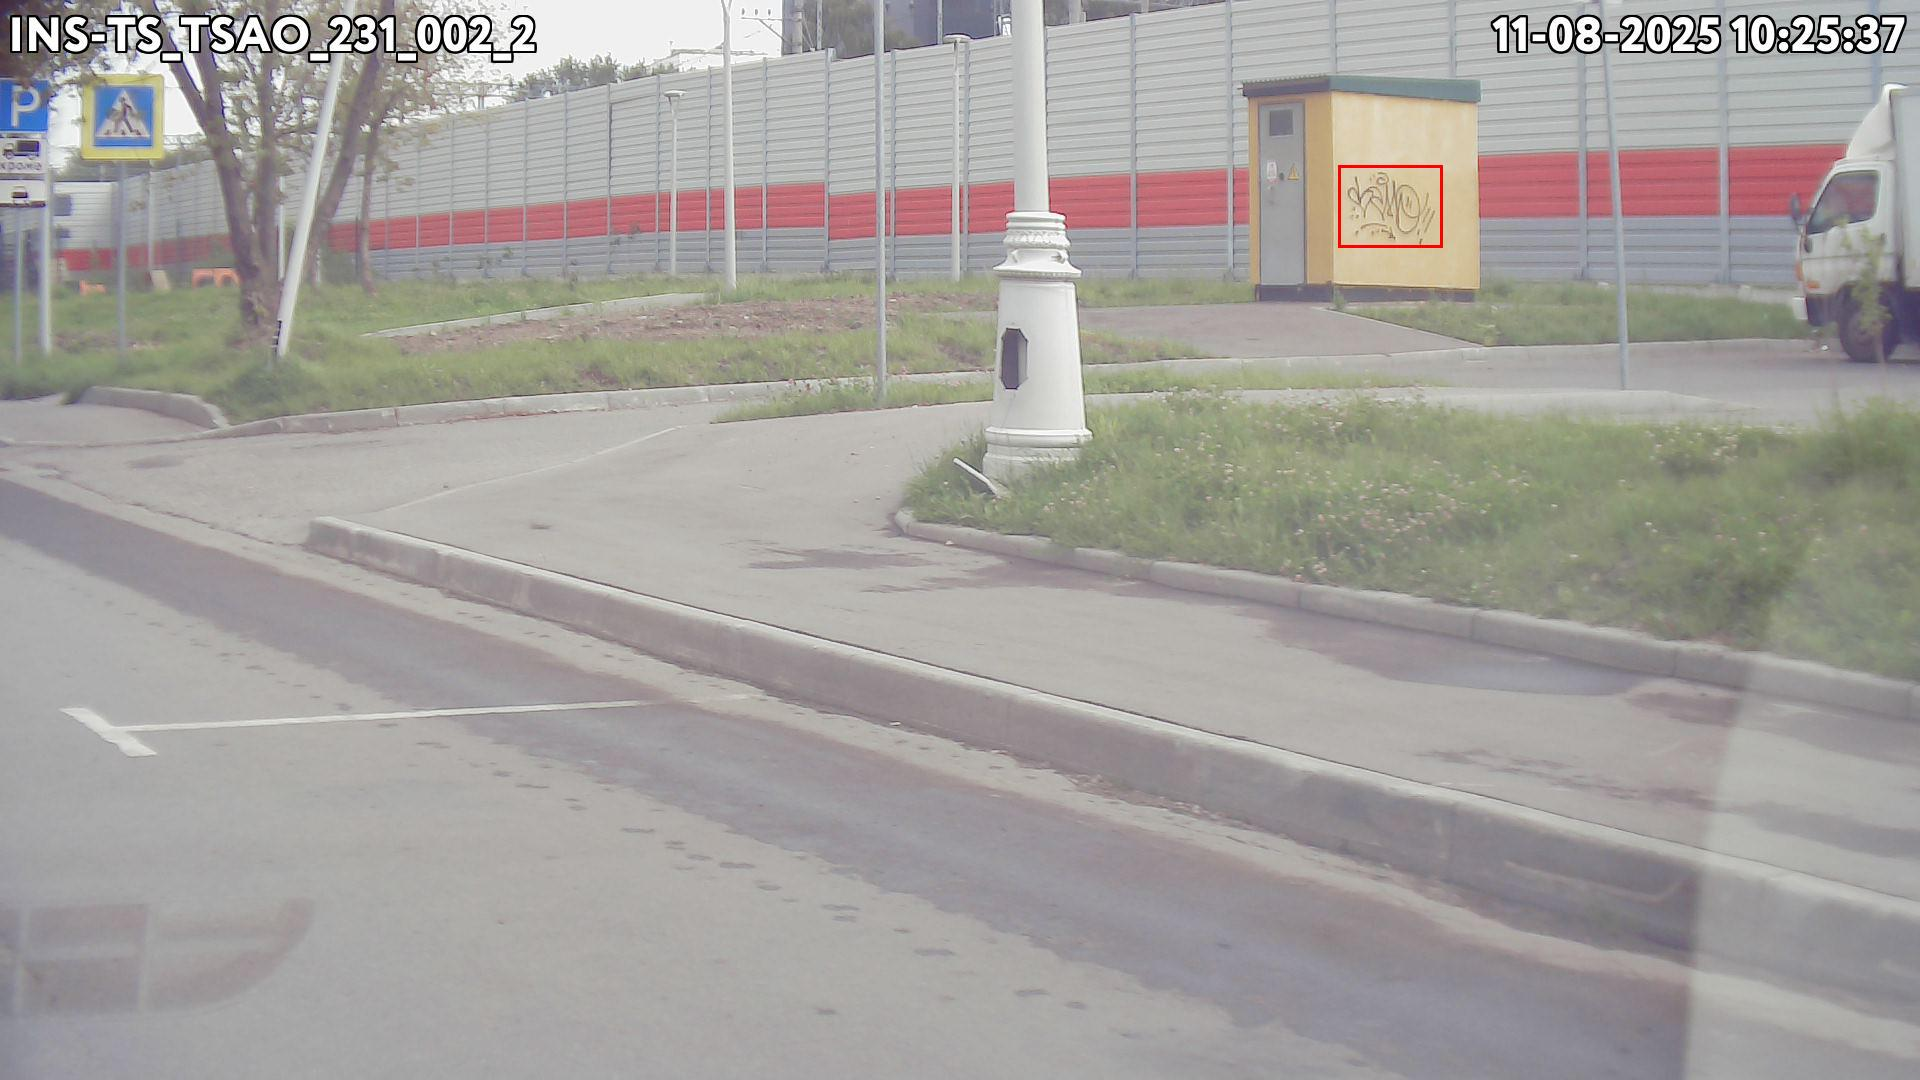

Камера=cbf95b01-f708-45a3-9ec0-3603469b538e, файл=612117c7-4d9e-4967-a0c0-ae950d3e3e04.jpg, координаты=(56.45441, 38.05574), от центра=82.8 км


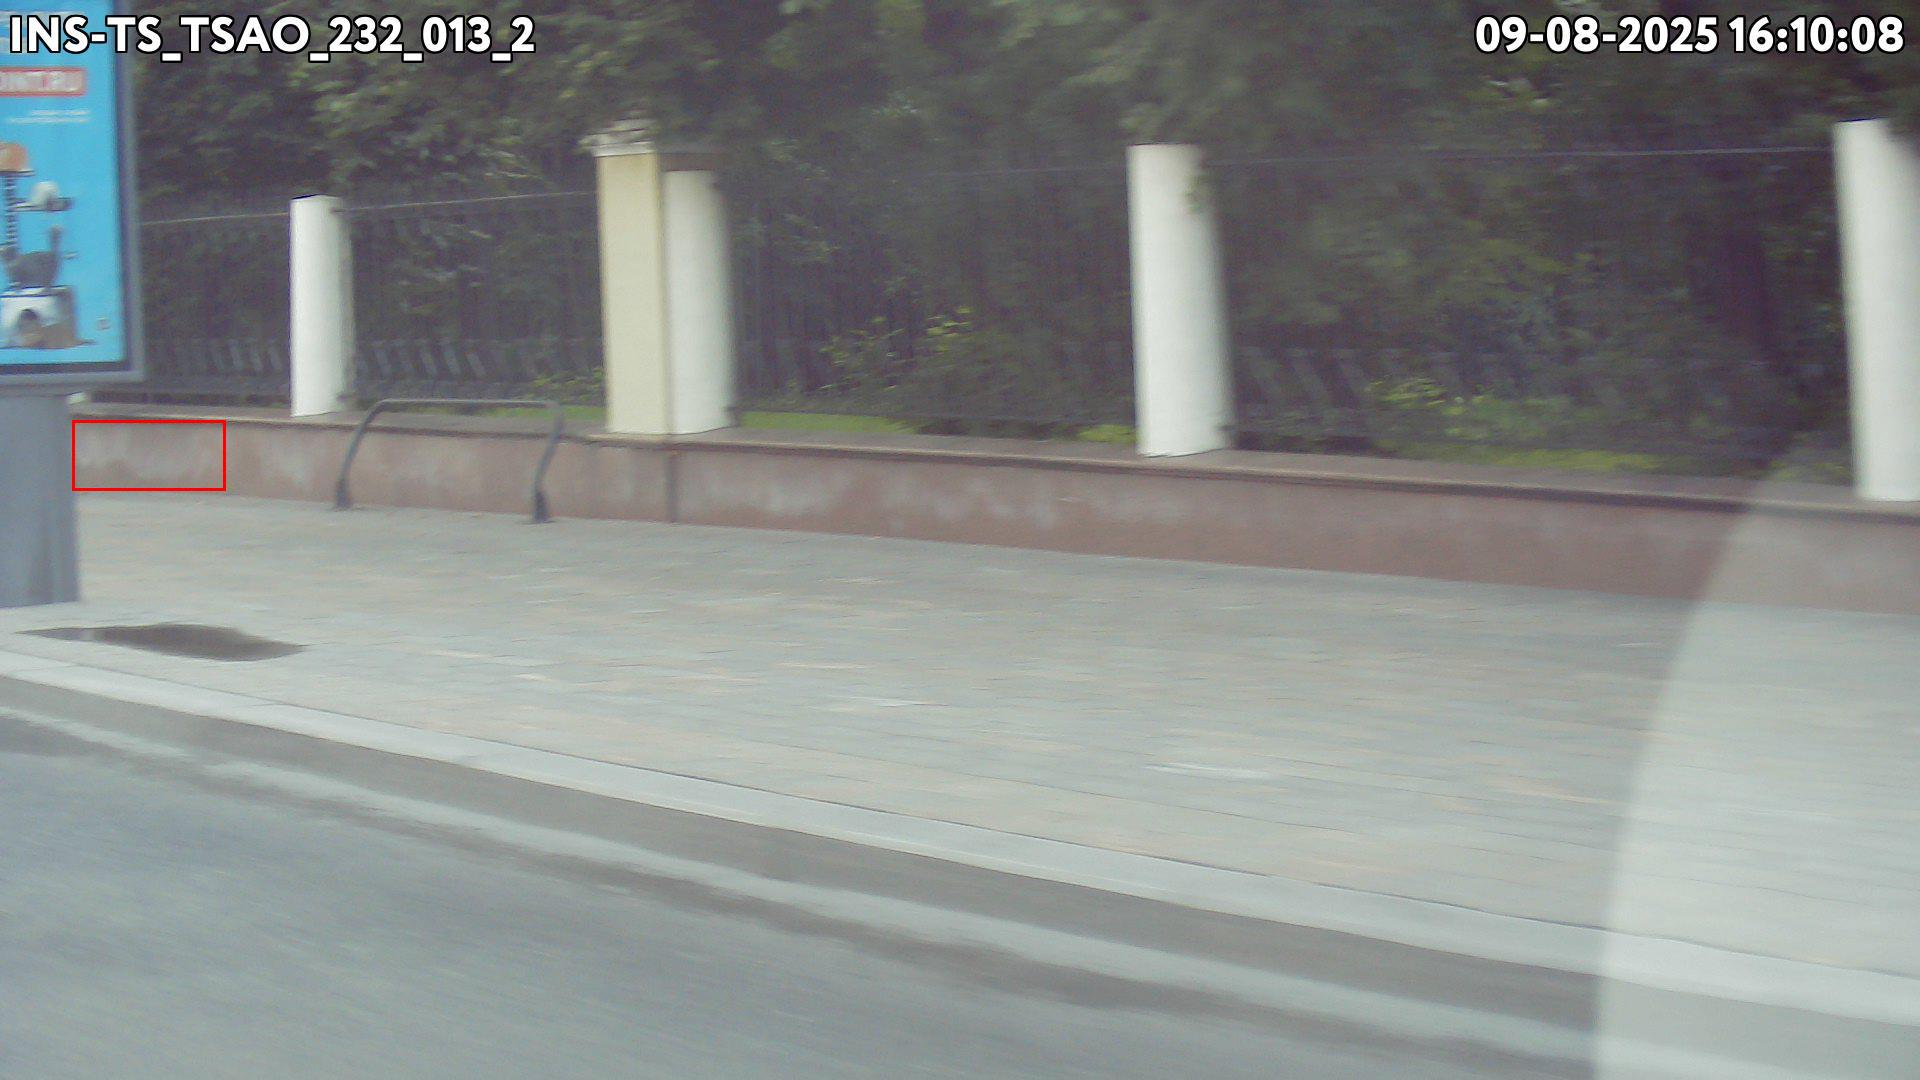

Камера=a1a9db89-3f74-42ef-8fad-ad69705102cd, файл=4213a69d-1207-4b72-afe4-d9c50d8f762a.jpg, координаты=(54.82396, 35.25110), от центра=181.9 км


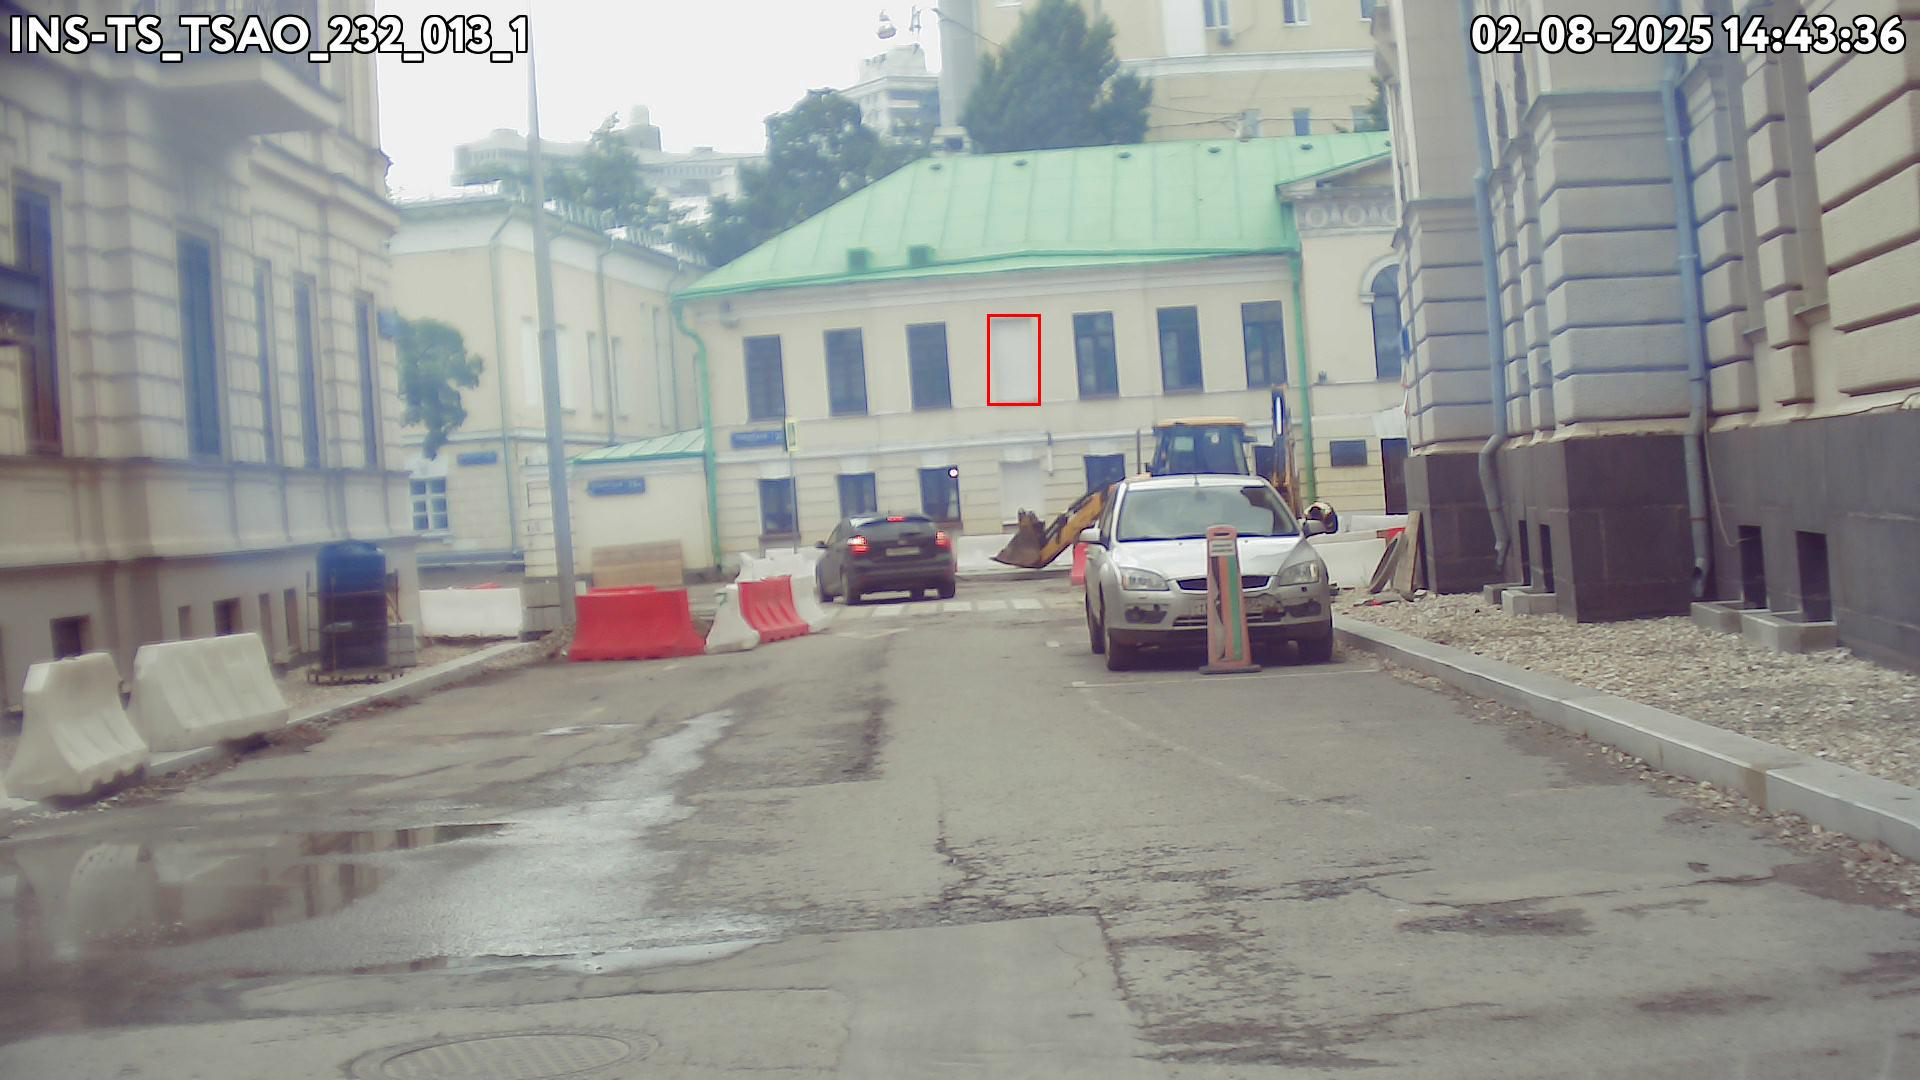

Камера=18a5c468-d9e6-4814-8477-1caf4a2e1fe9, файл=6a79d3a9-8892-4f07-b7ef-e581545a9d93.jpg, координаты=(45.05200, 33.98193), от центра=1216.9 км


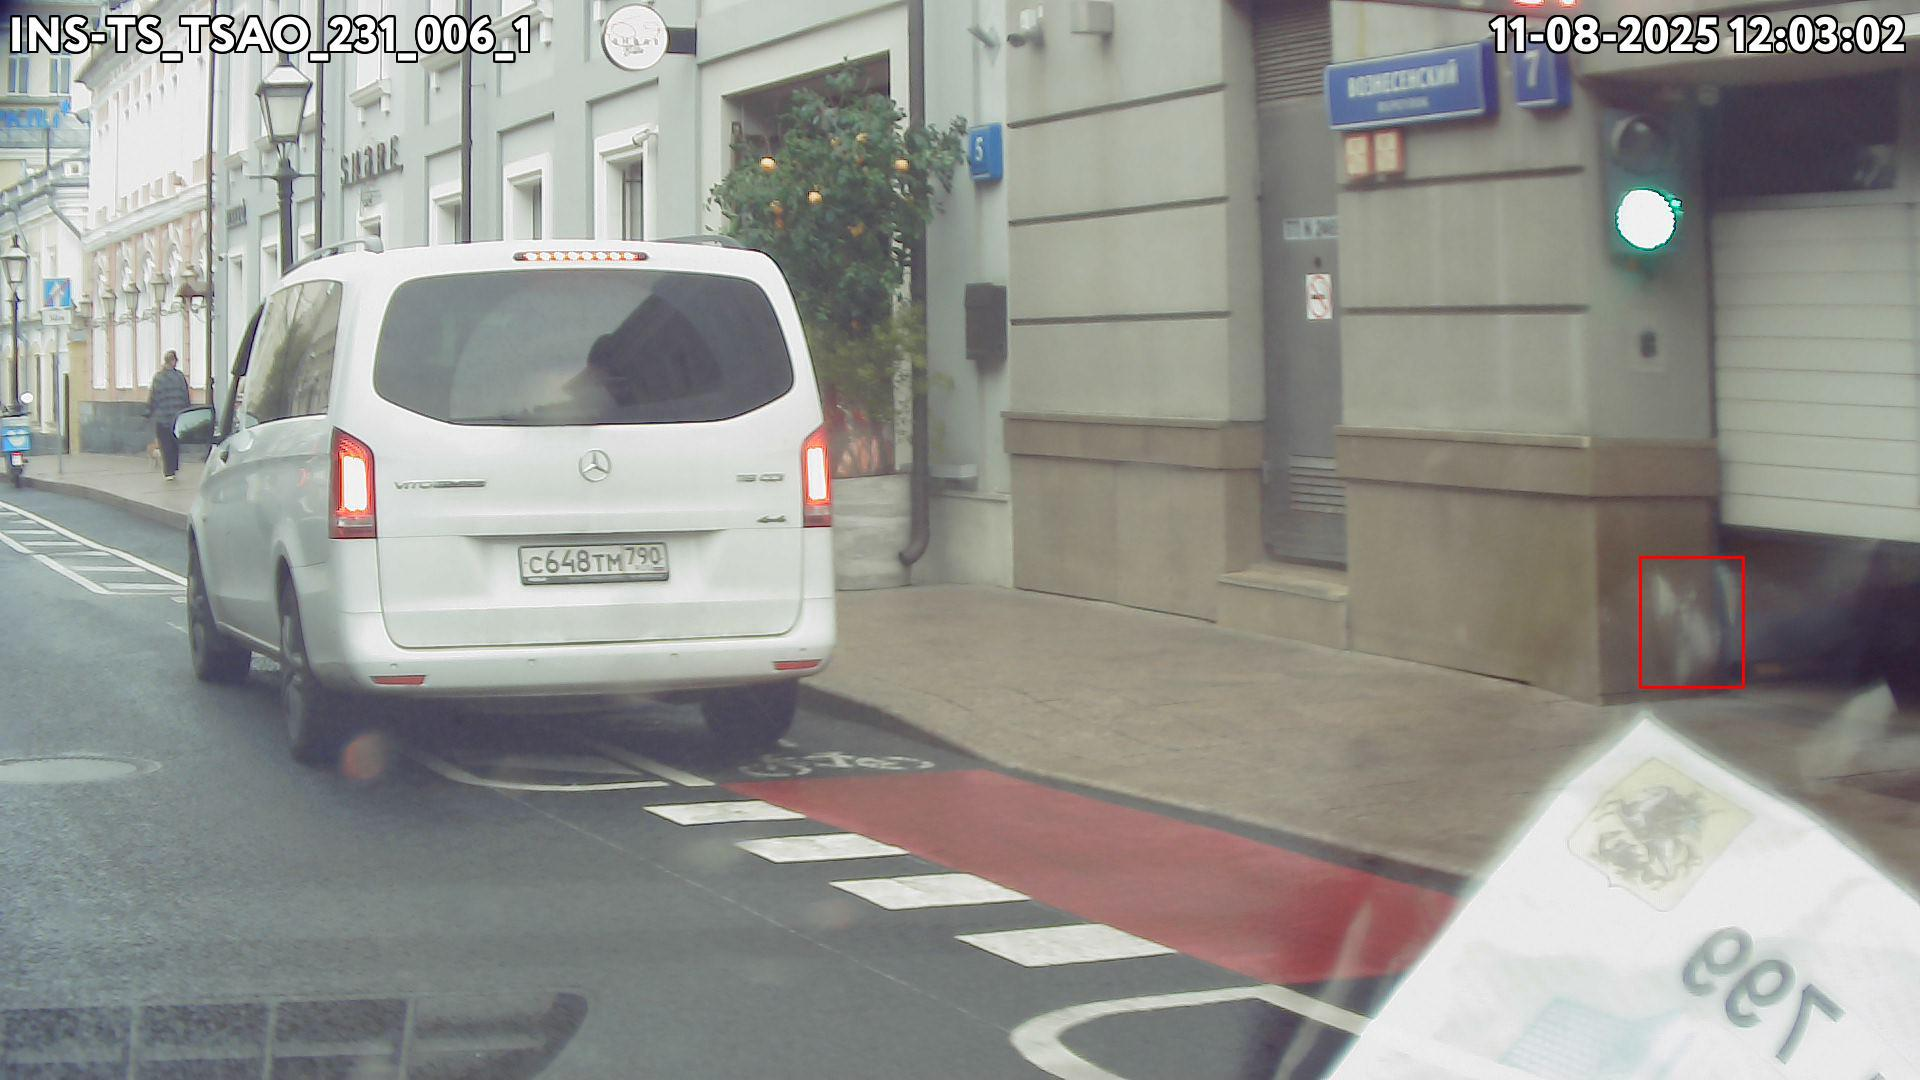

Камера=cbf95b01-f708-45a3-9ec0-3603469b538e, файл=8f3b583a-bd2a-4560-a0ce-58465224e443.jpg, координаты=(54.82396, 35.25110), от центра=181.9 км


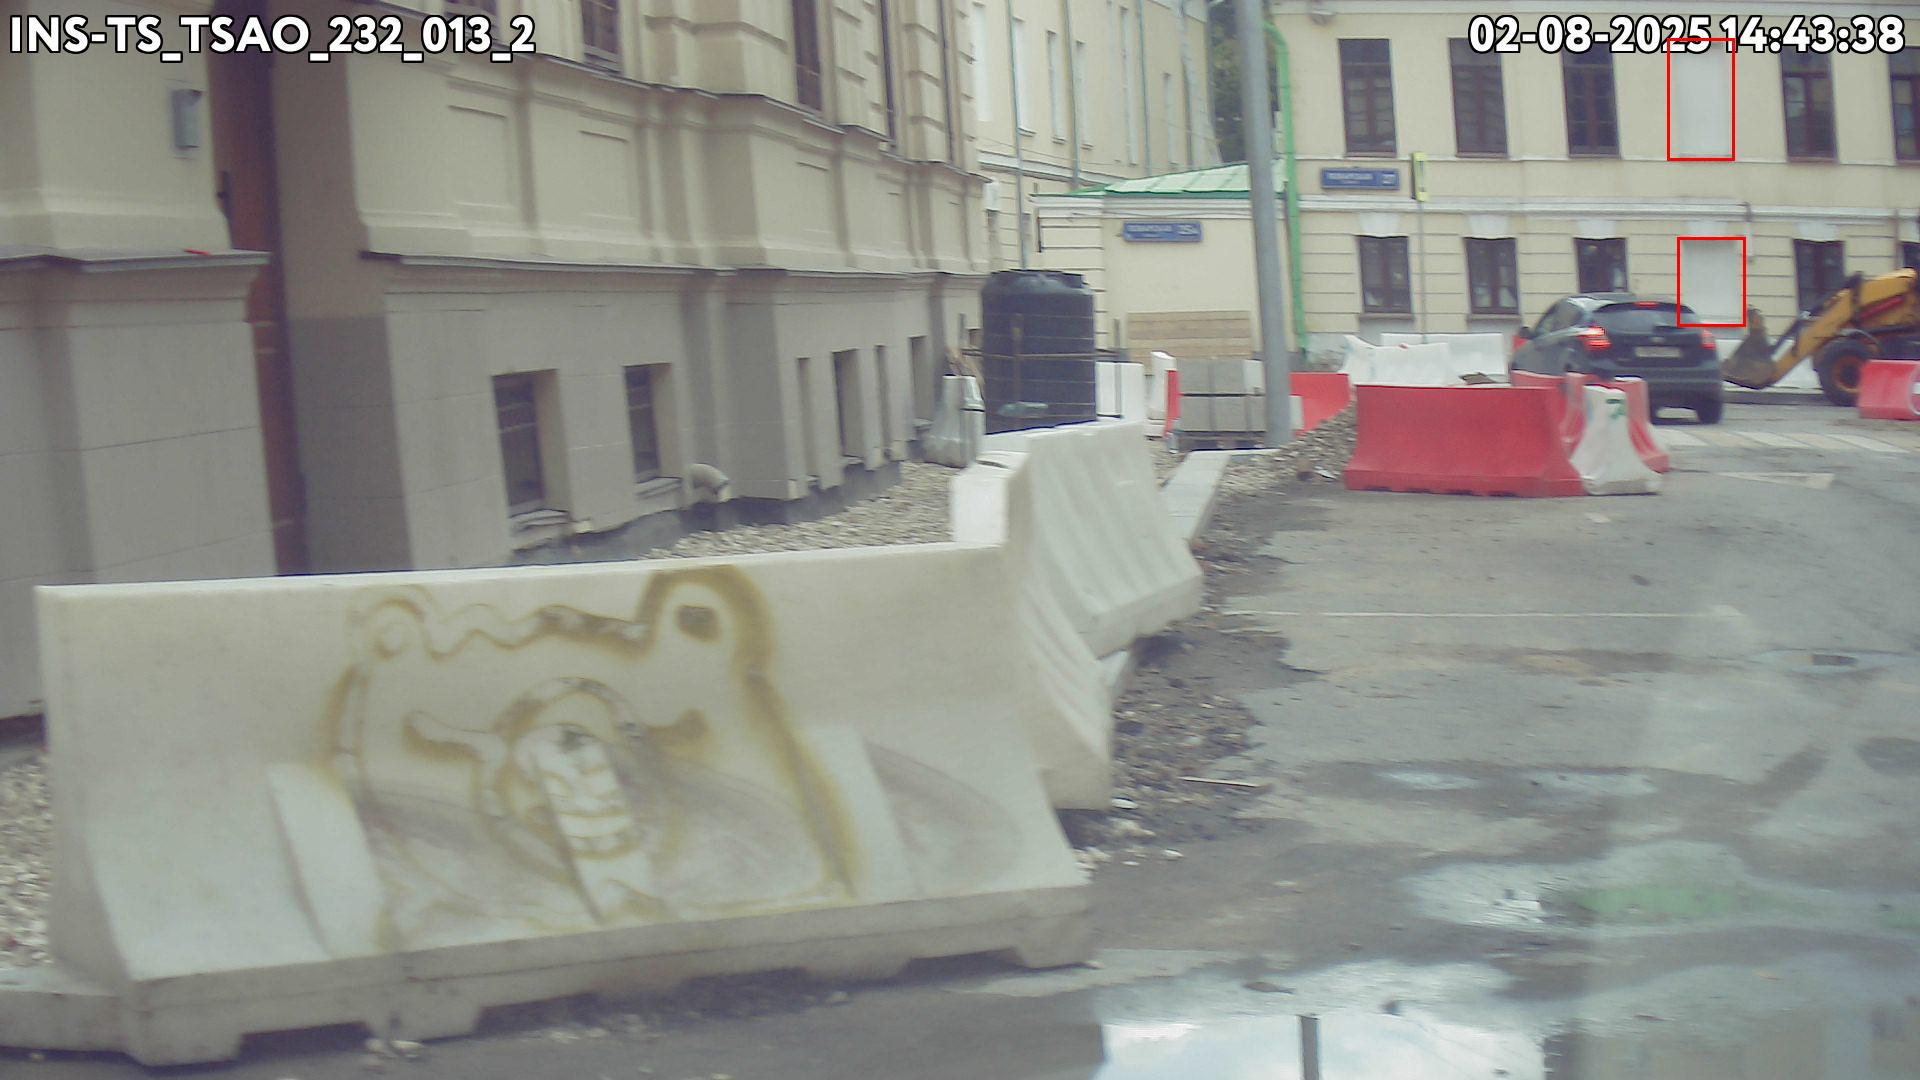


== Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль ==
Примеры выбросов (всего 335)
Камера=e26f5fc2-1353-4f29-85f3-87c56419161c, файл=c42a793f-9fec-41dc-b275-63485cdce210.jpg, координаты=(55.97301, 35.83291), от центра=114.1 км


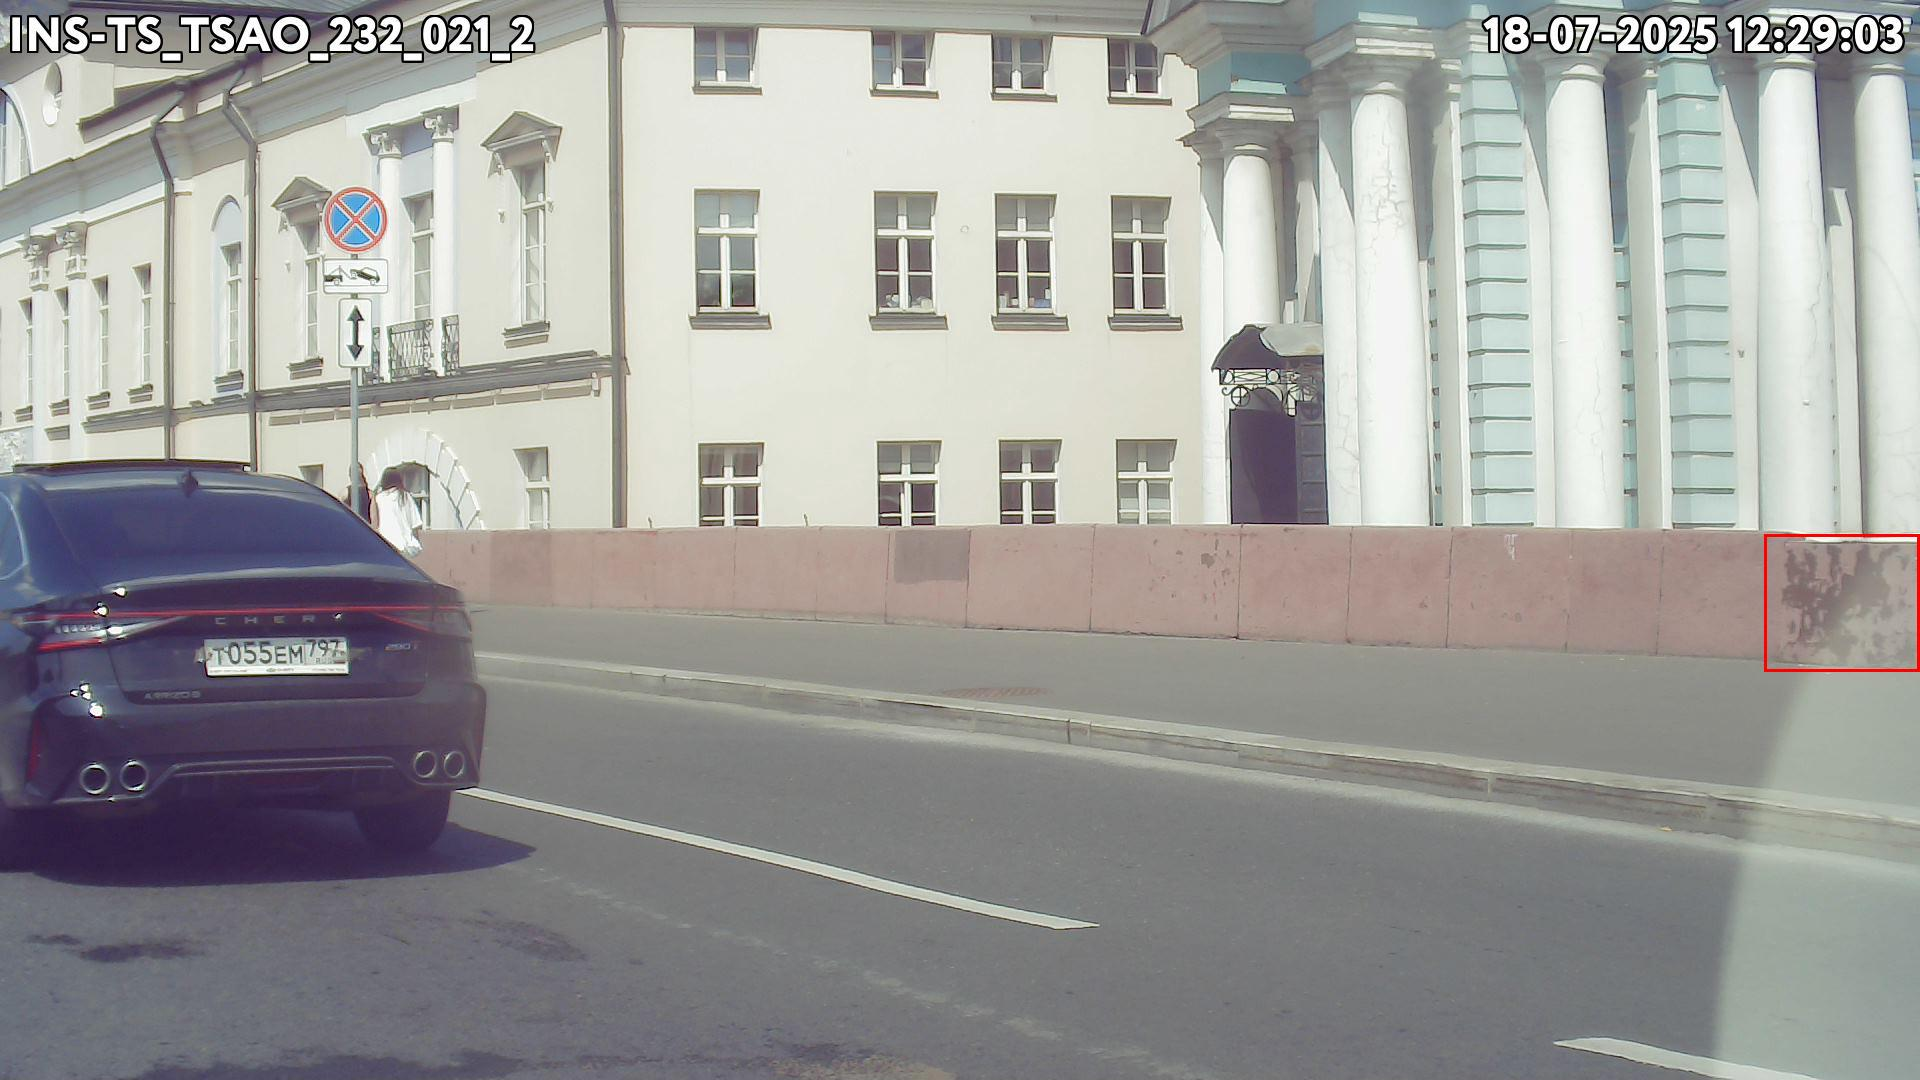

Камера=af173c70-3716-4040-aa0b-1be99e78abe8, файл=35eb464c-0887-4aba-9880-cfcd71e6ad82.jpg, координаты=(45.04953, 33.97419), от центра=1217.3 км


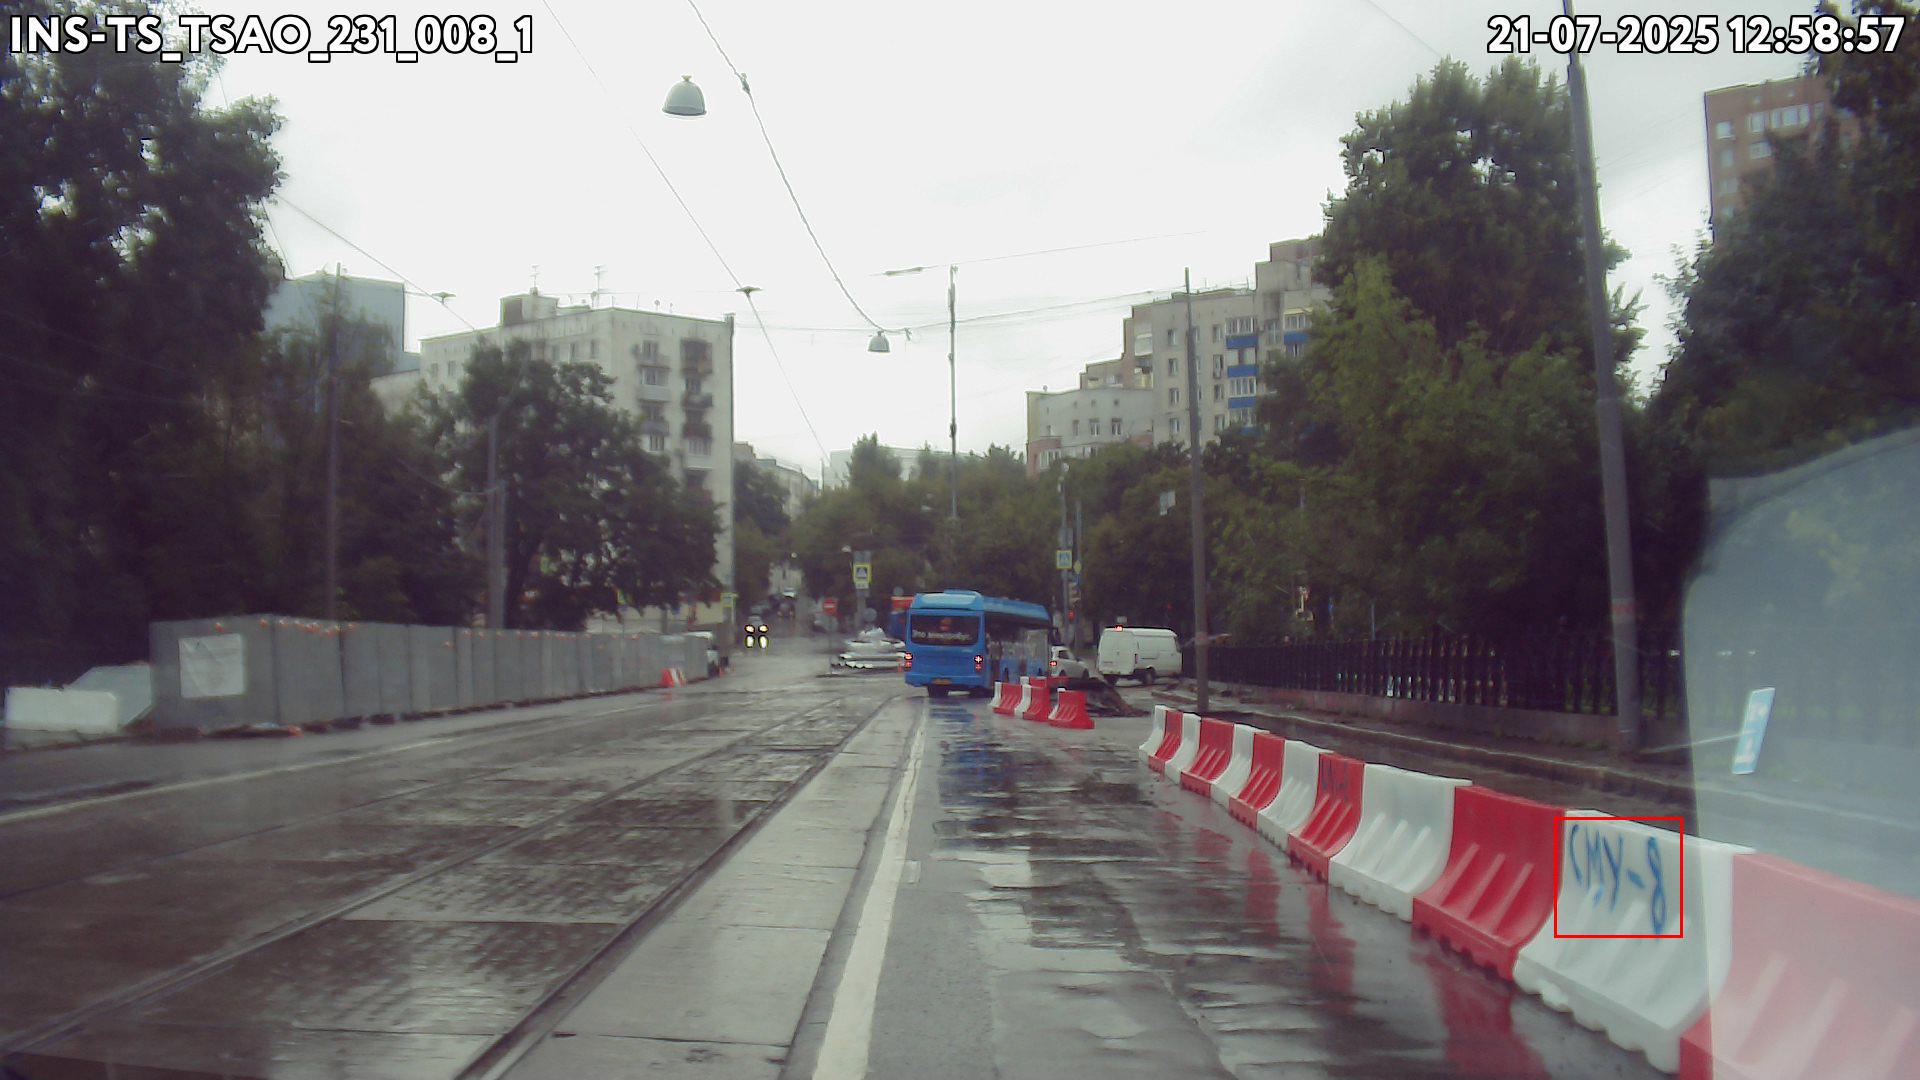

Камера=dd22c7c9-0046-46d8-8631-55150dbf8ae5, файл=16c2b51d-4f6a-408a-8b75-5950d41448da.jpg, координаты=(45.05630, 33.97615), от центра=1216.5 км


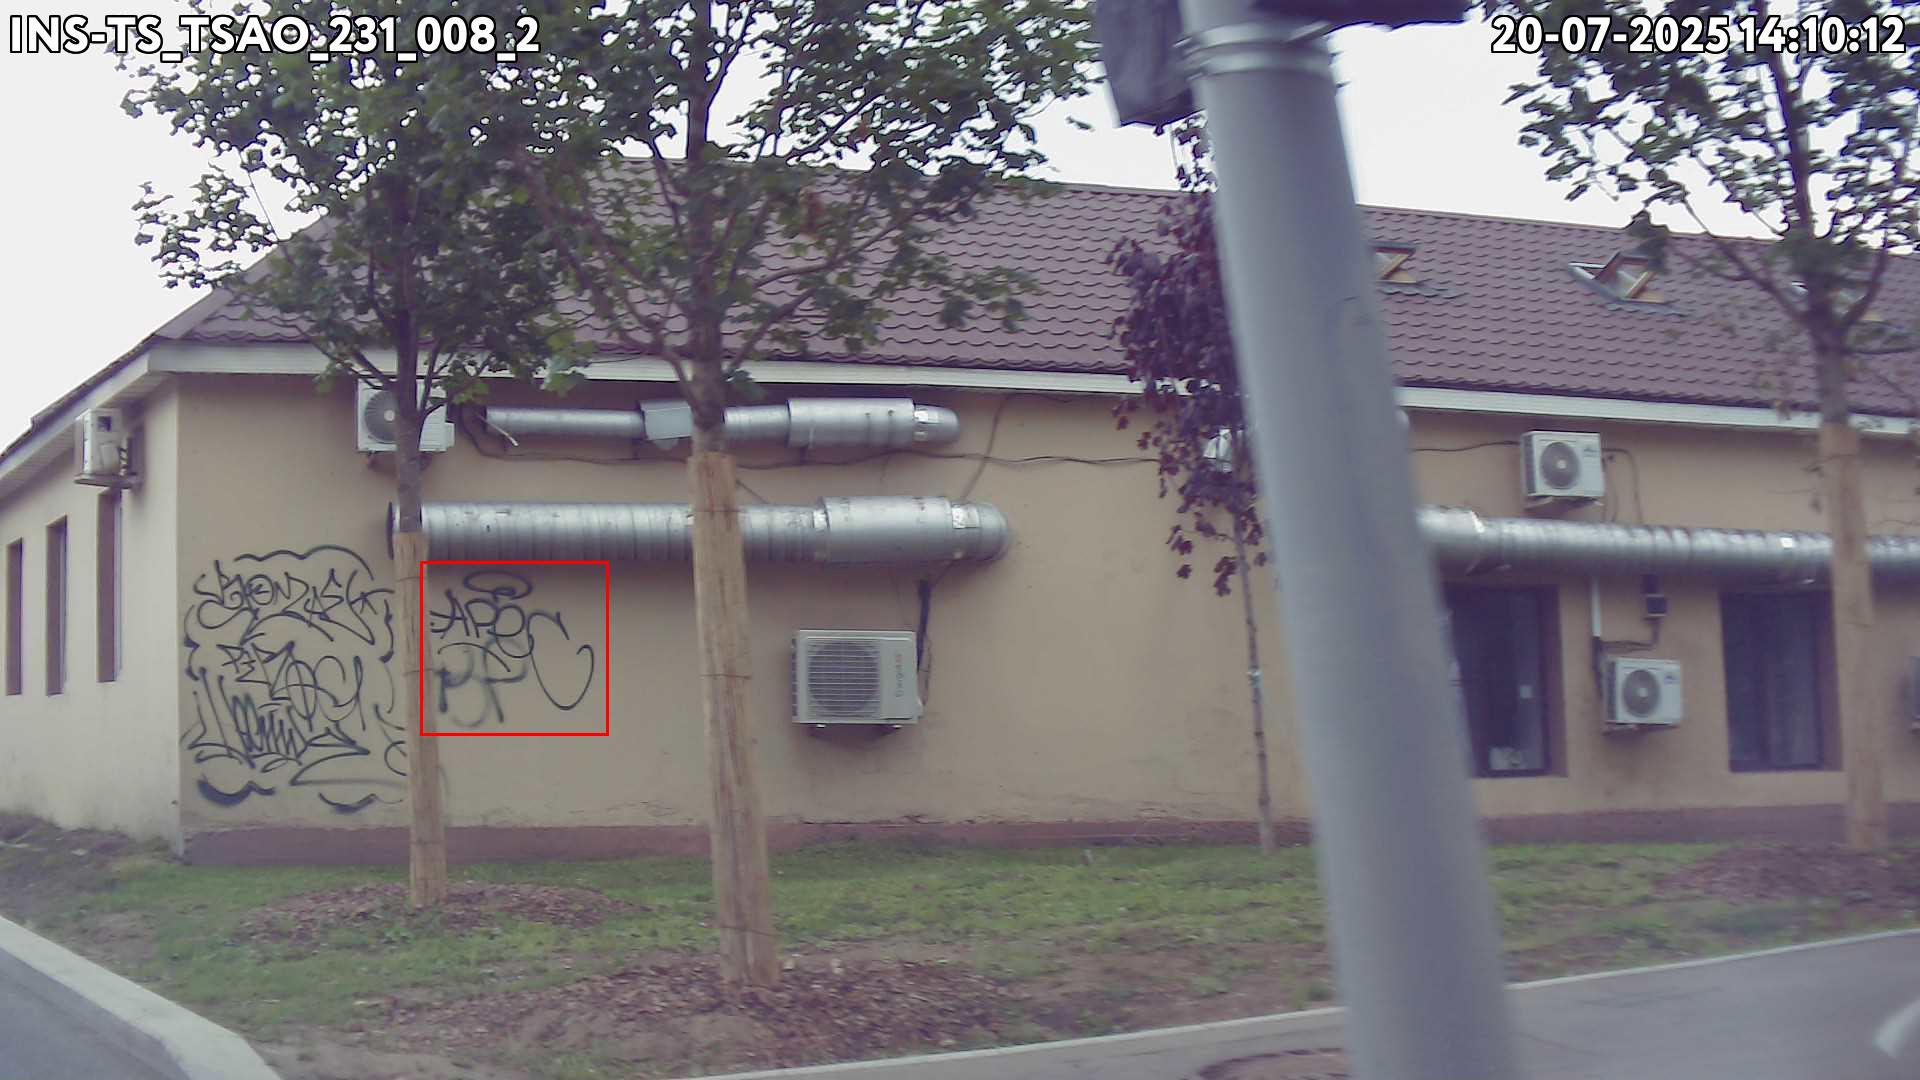

Камера=6e2567a0-1fb9-40d5-a0e7-0adb480d2965, файл=81e0d233-fed0-4ad6-859d-07e117304dee.jpg, координаты=(55.53793, 39.35509), от центра=111.5 км


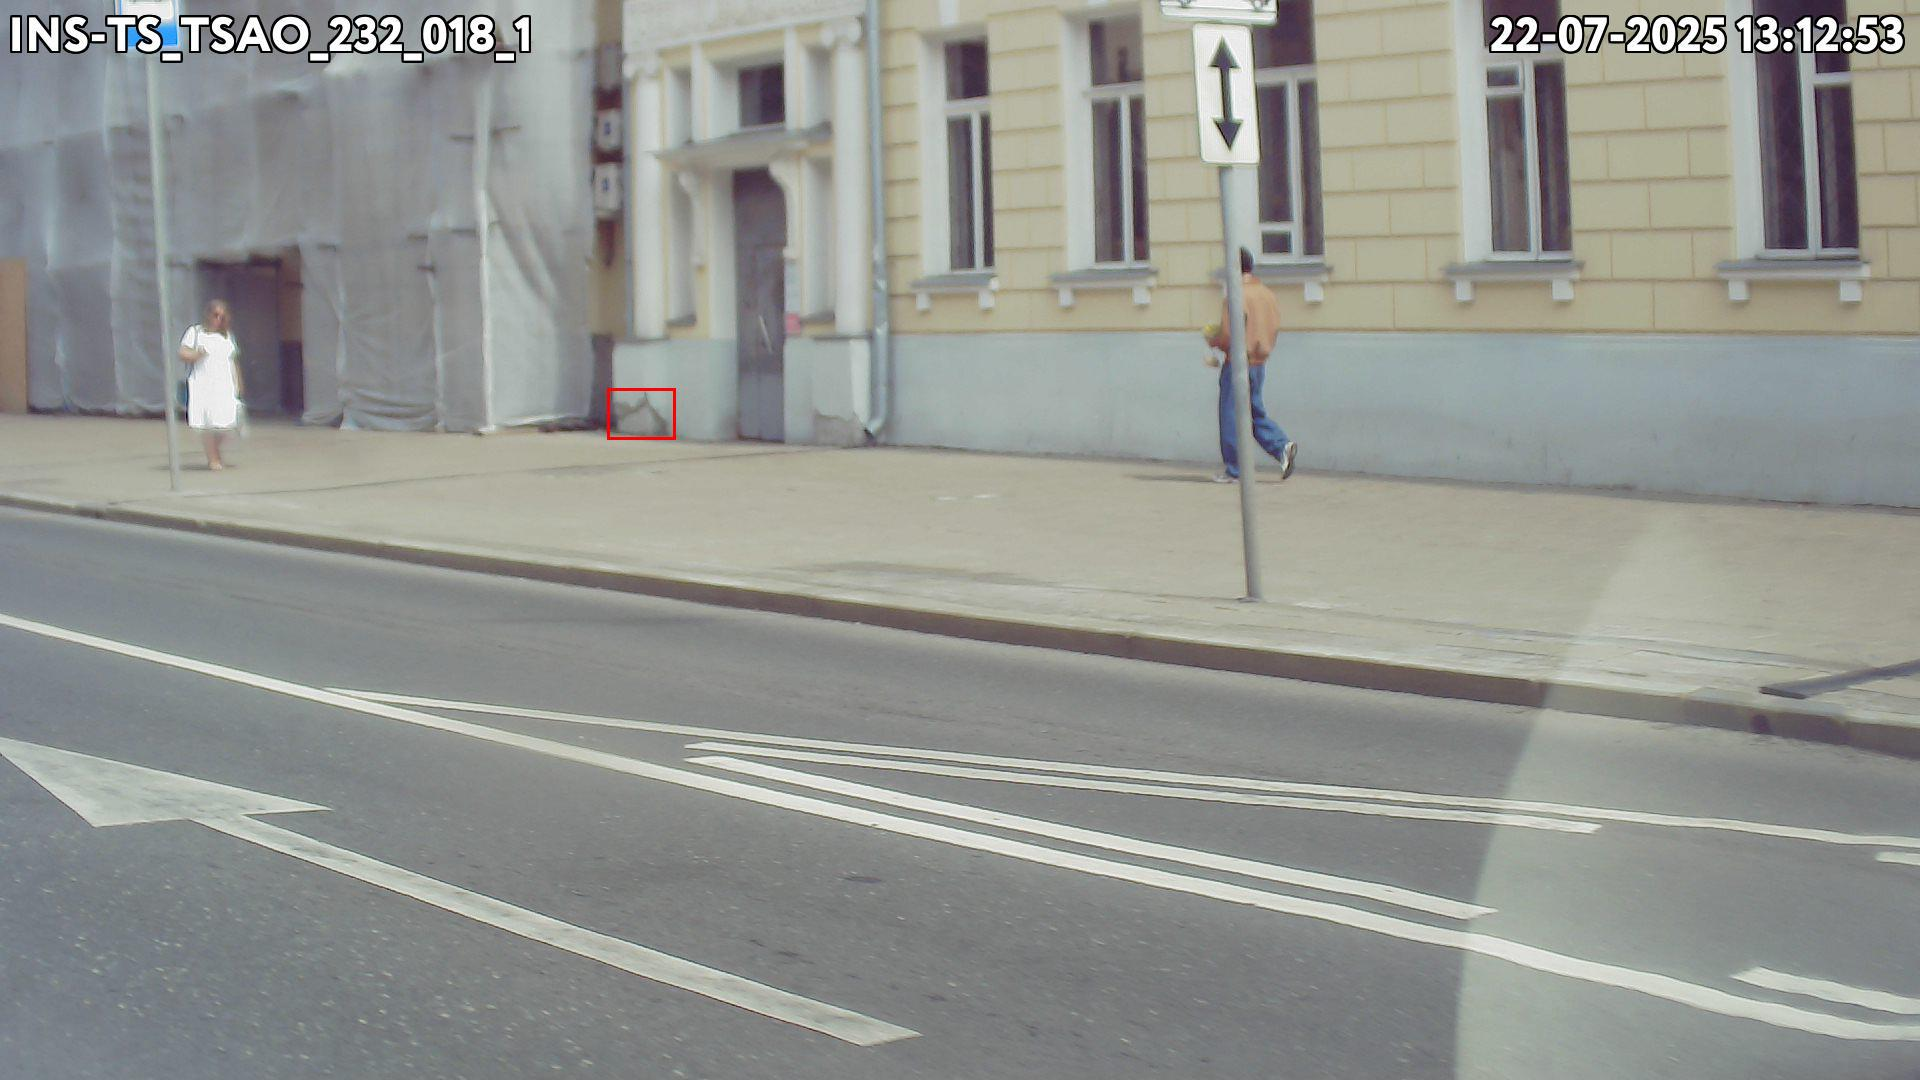

Камера=cbf95b01-f708-45a3-9ec0-3603469b538e, файл=4c88a9ff-d31f-4502-9144-043d483fff32.jpg, координаты=(45.06003, 33.97176), от центра=1216.1 км


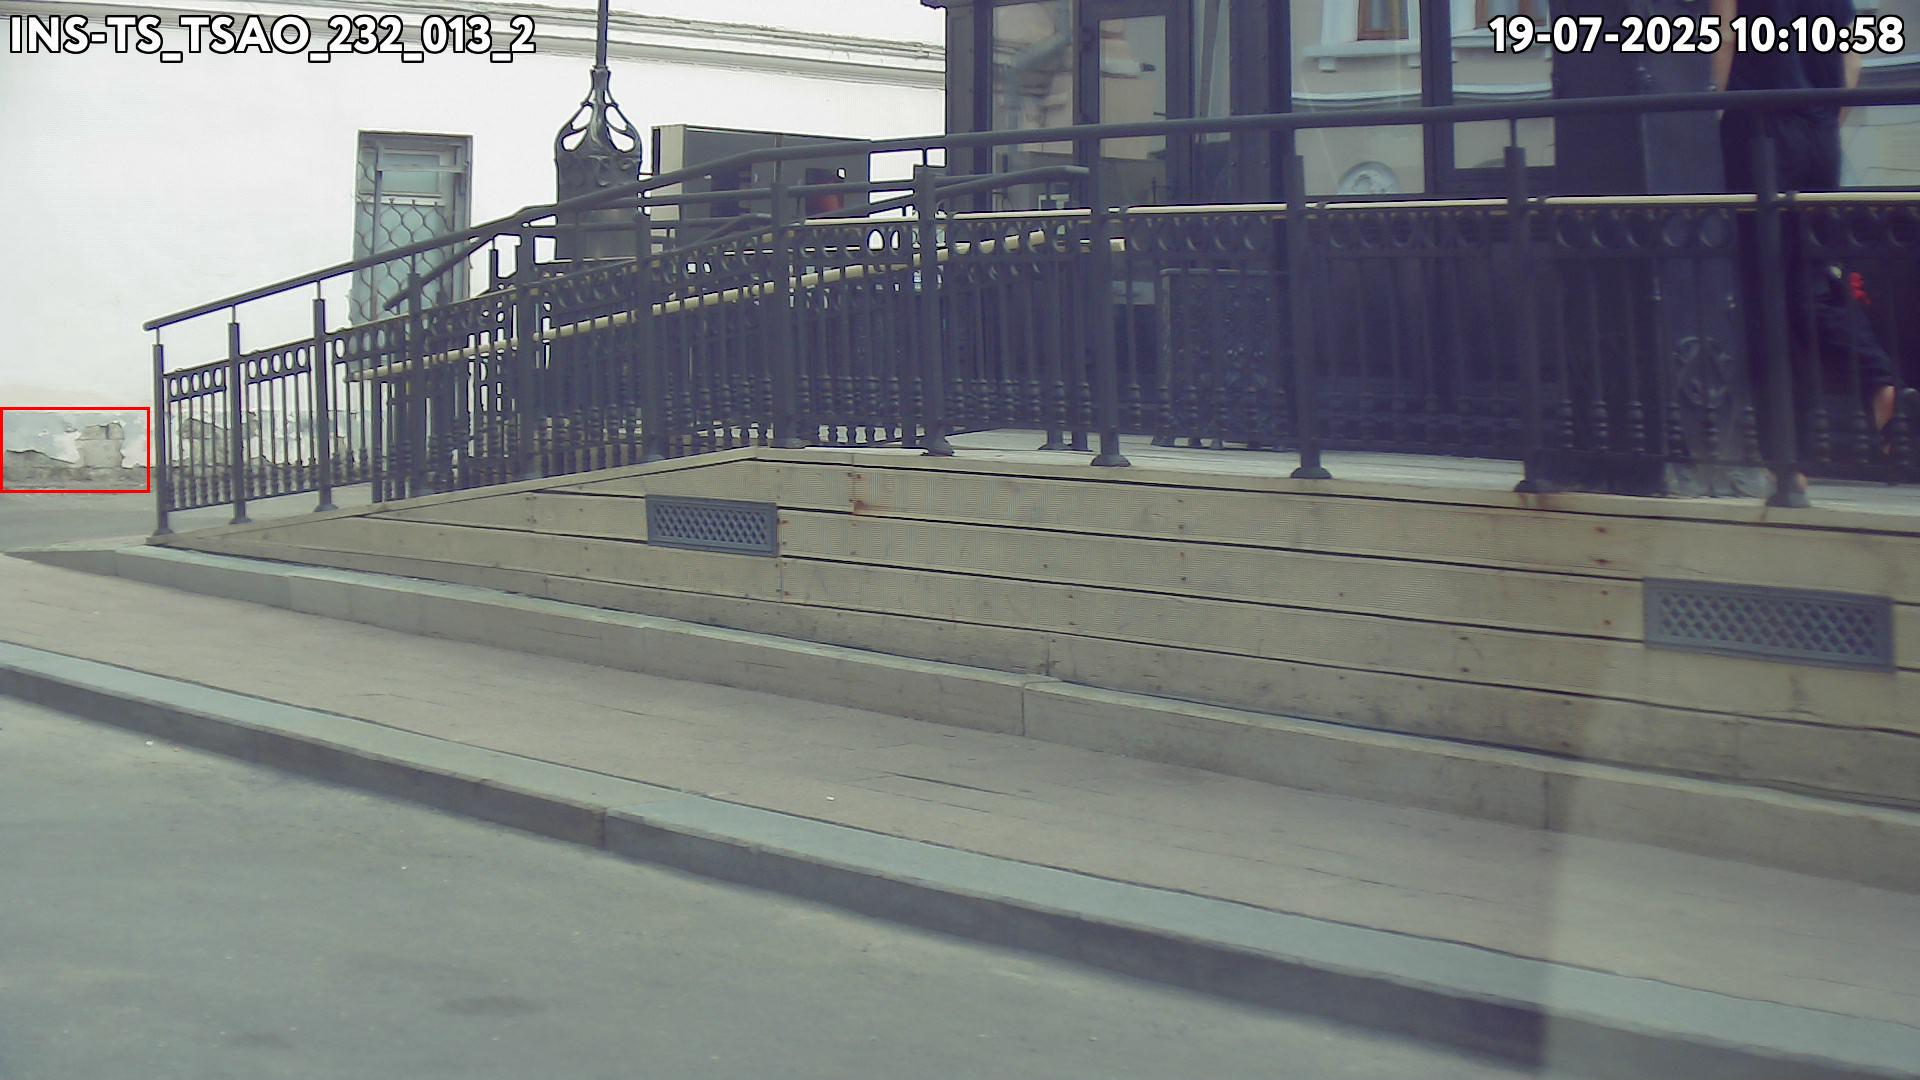


== Строительная площадка_18-001_Август ==
Примеры выбросов (всего 404)
Камера=12e795ad-2aa7-49de-b2da-2c6aa35a4559, файл=9c24a1b8-296c-4e72-bf3d-45ed8c31ba59.jpg, координаты=(56.91815, 40.48421), от центра=219.2 км


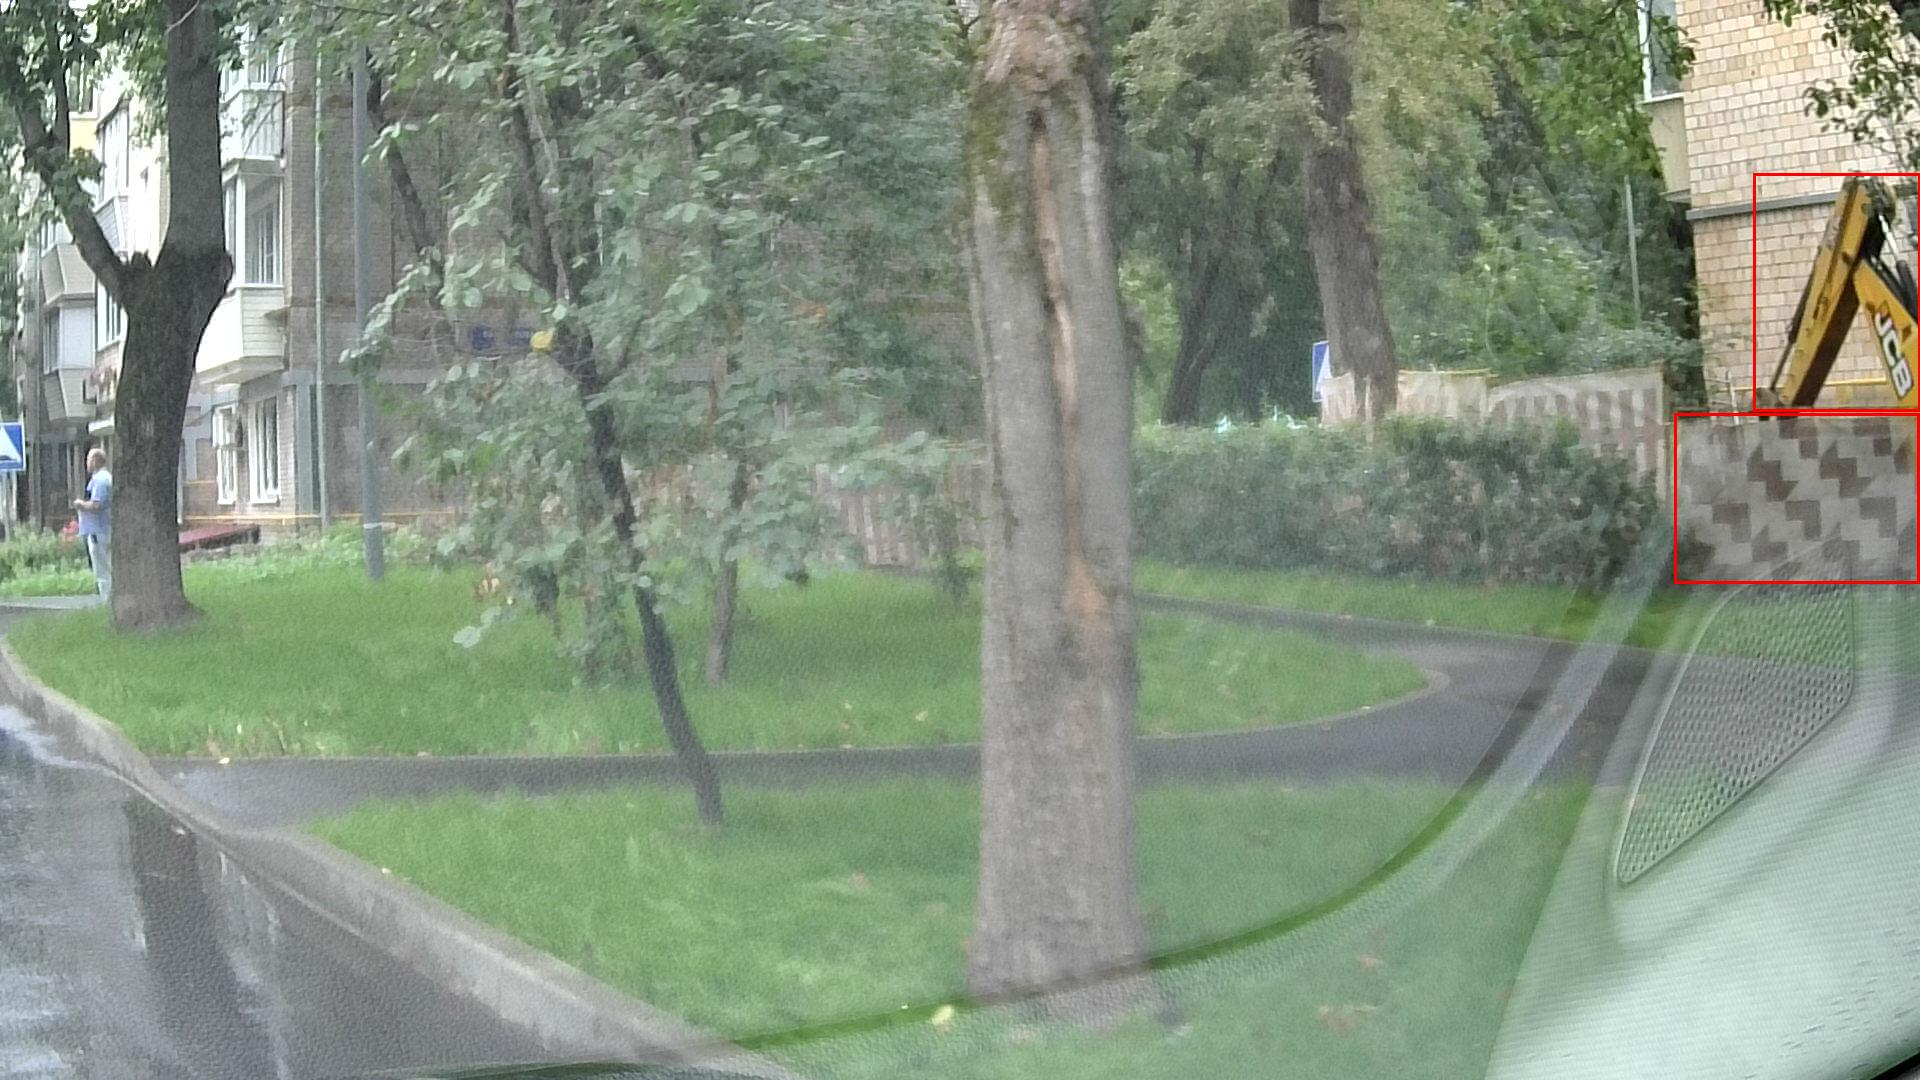

Камера=93848fc8-17e7-4748-9ebc-c7e379e11d2f, файл=2daa77d4-3f92-4e1f-9529-e256892cd4d9.jpg, координаты=(45.04168, 33.97408), от центра=1218.1 км


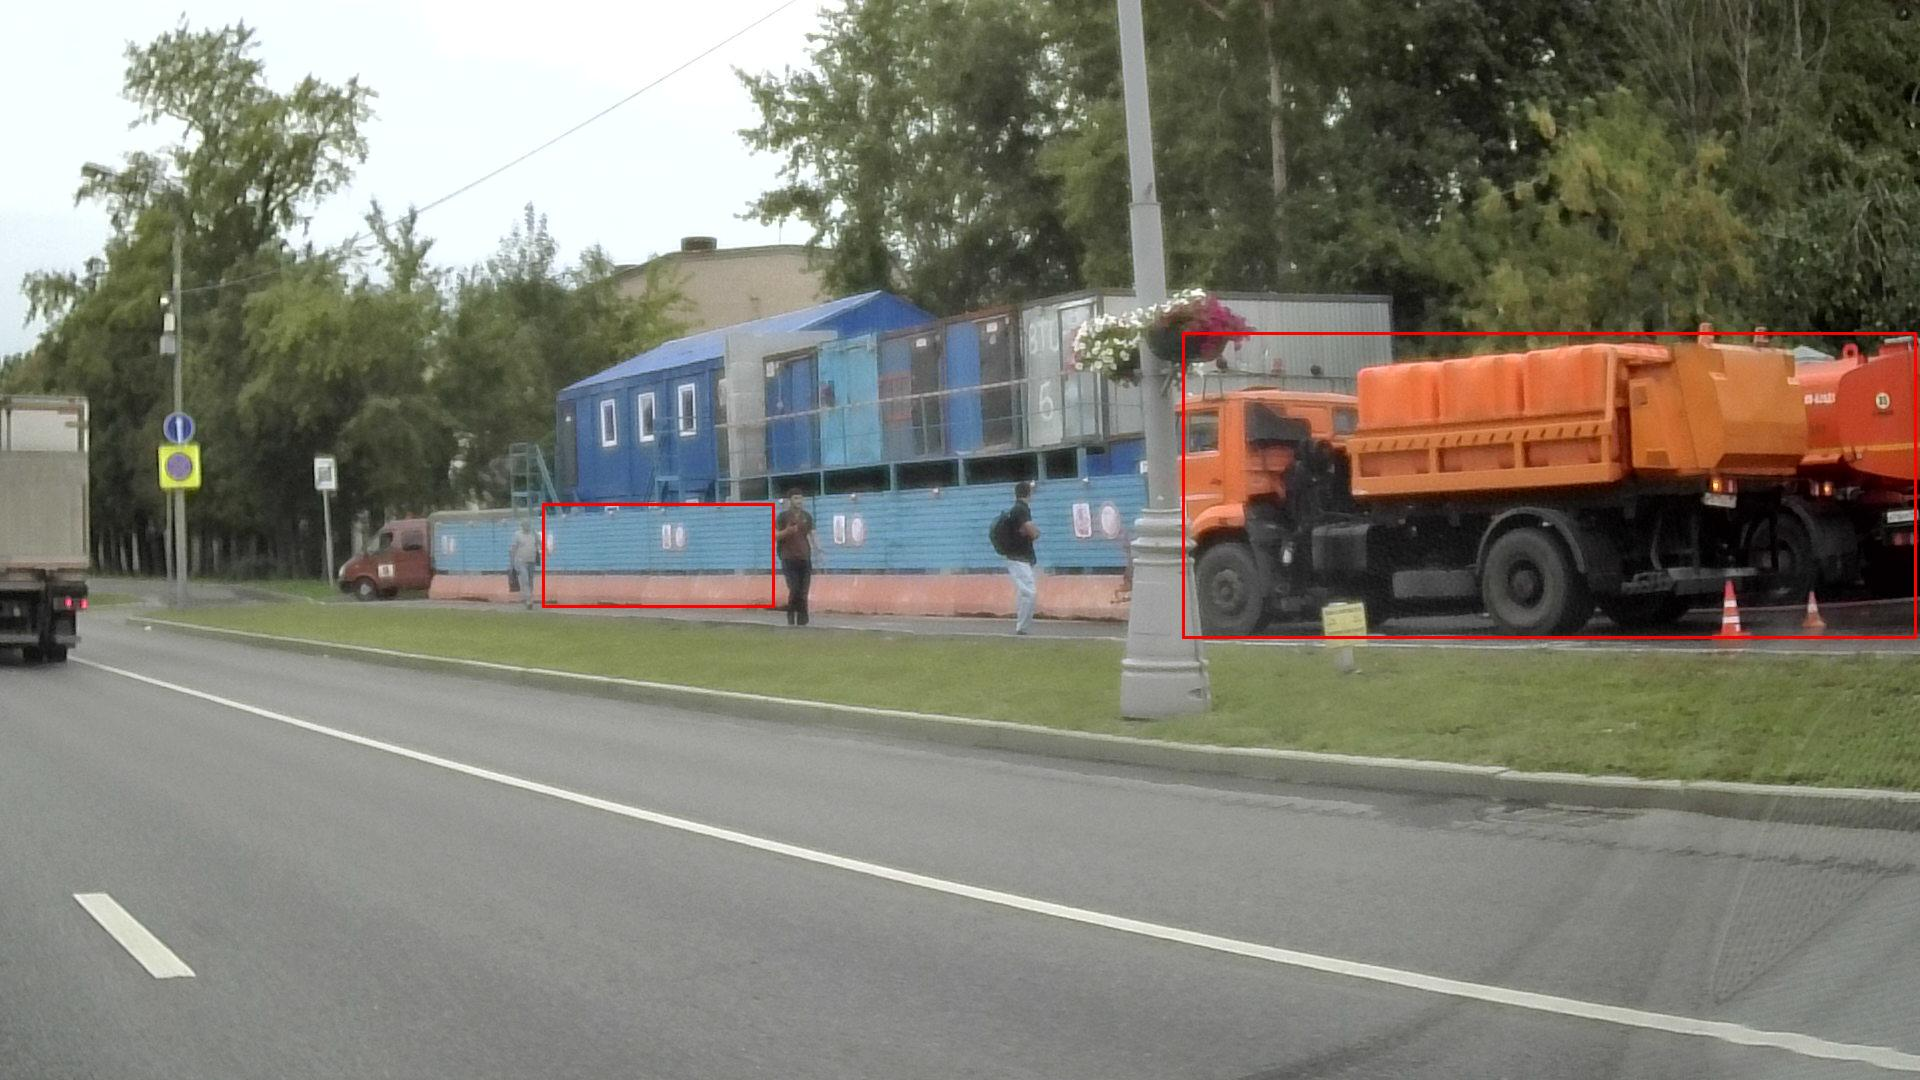

Камера=9fb3d110-951f-48da-9d90-cfd7e1b5800d, файл=0ae54737-c52f-4111-95d8-6192dd8940dc.jpg, координаты=(55.88667, 39.35175), от центра=109.3 км


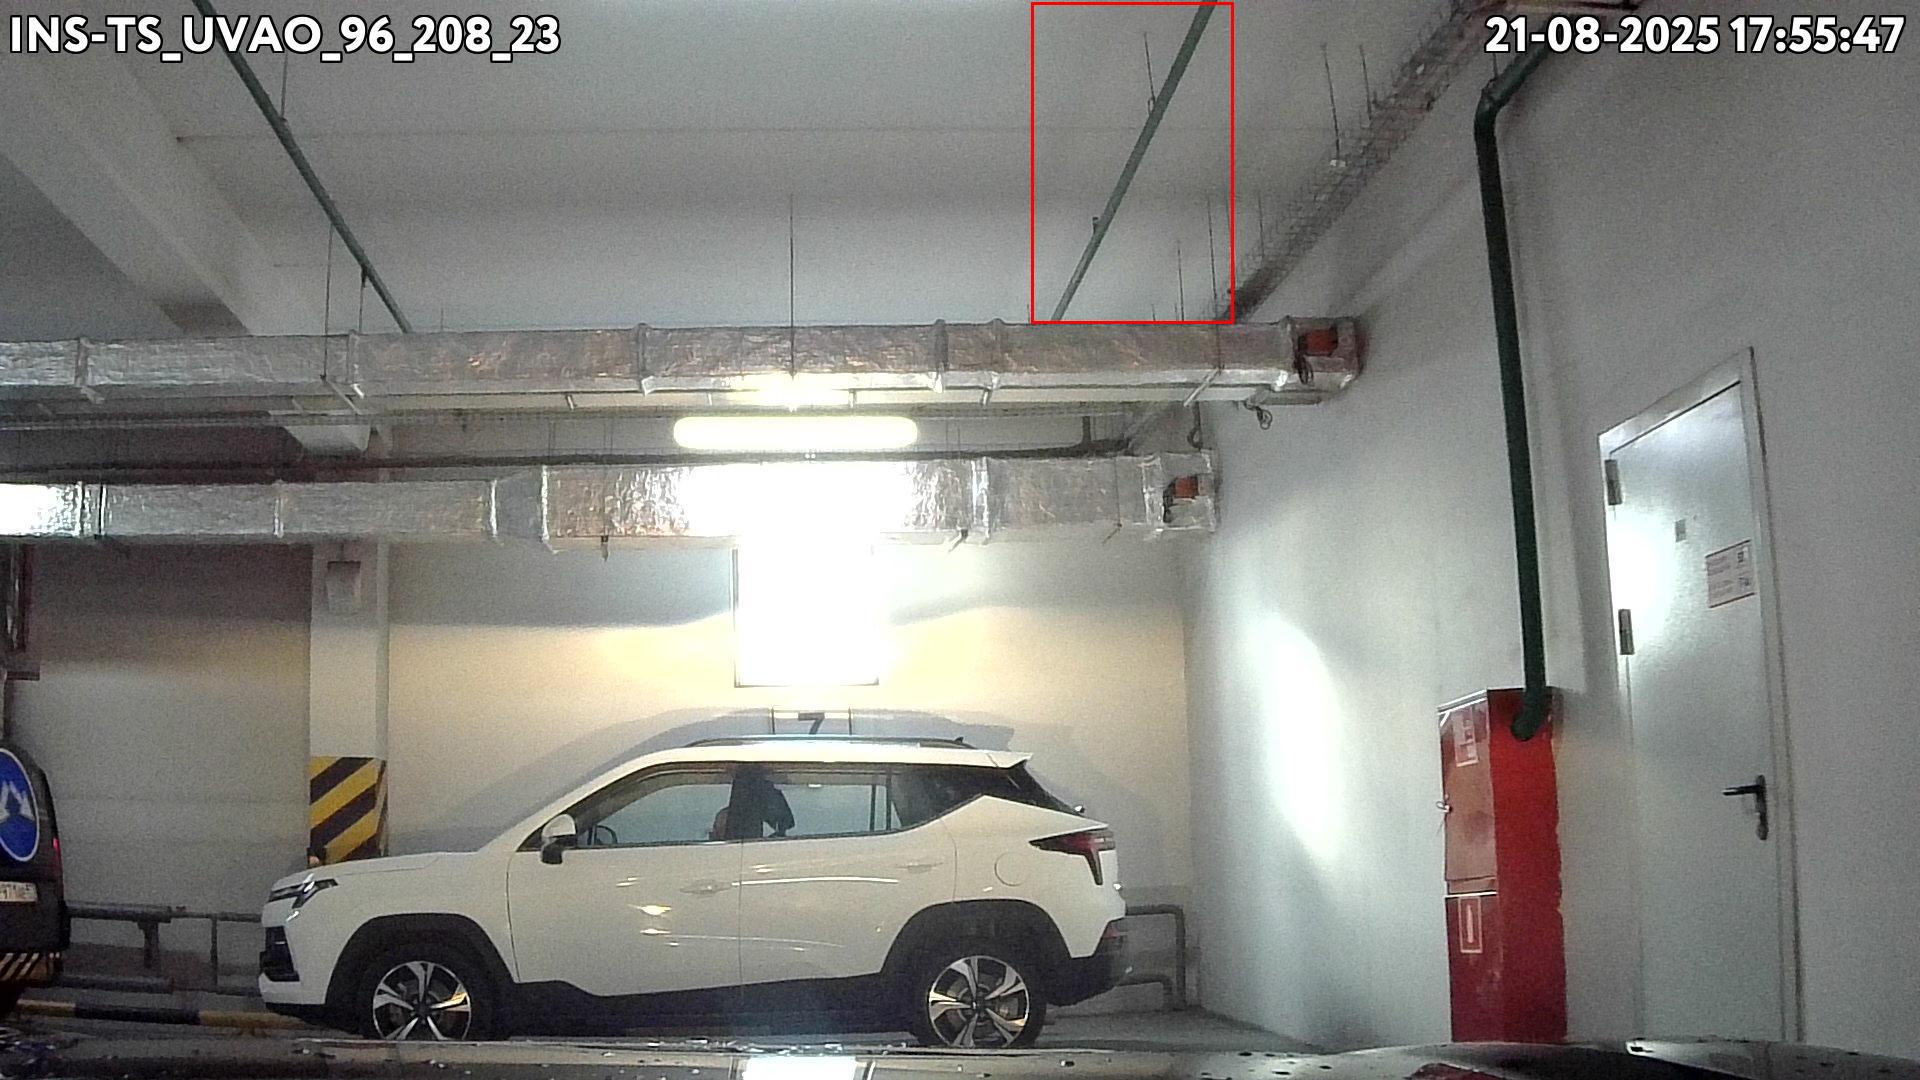

Камера=91248771-2c4d-44f3-b3cf-d536bd4ae73c, файл=09c4a3f3-78ea-40ac-bd37-405e6bdbb3b9.jpg, координаты=(55.00894, 82.65208), от центра=2795.7 км


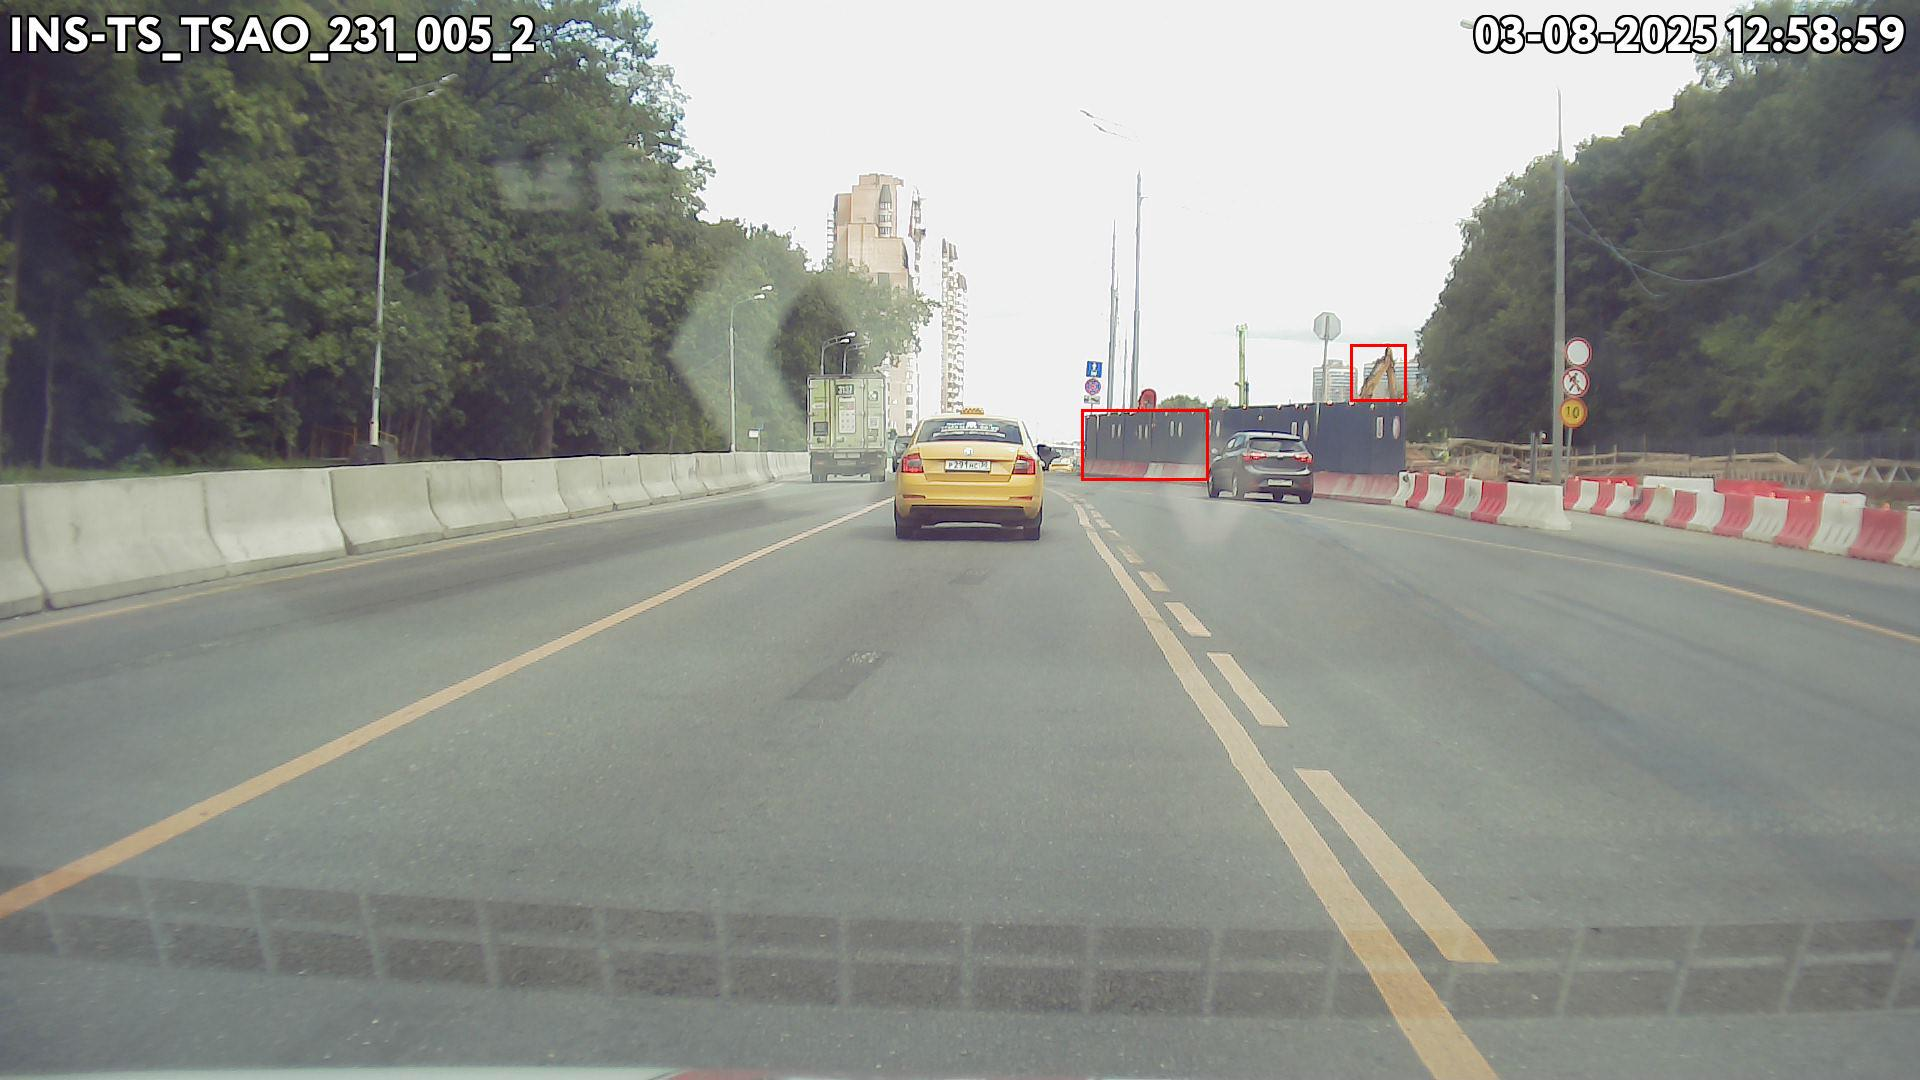

Камера=61936922-4d4b-458e-80ea-6d4c450aa1d5, файл=c5890a34-aa6c-4a37-938e-8d6f0f19dce8.jpg, координаты=(56.84946, 37.84162), от центра=122.9 км


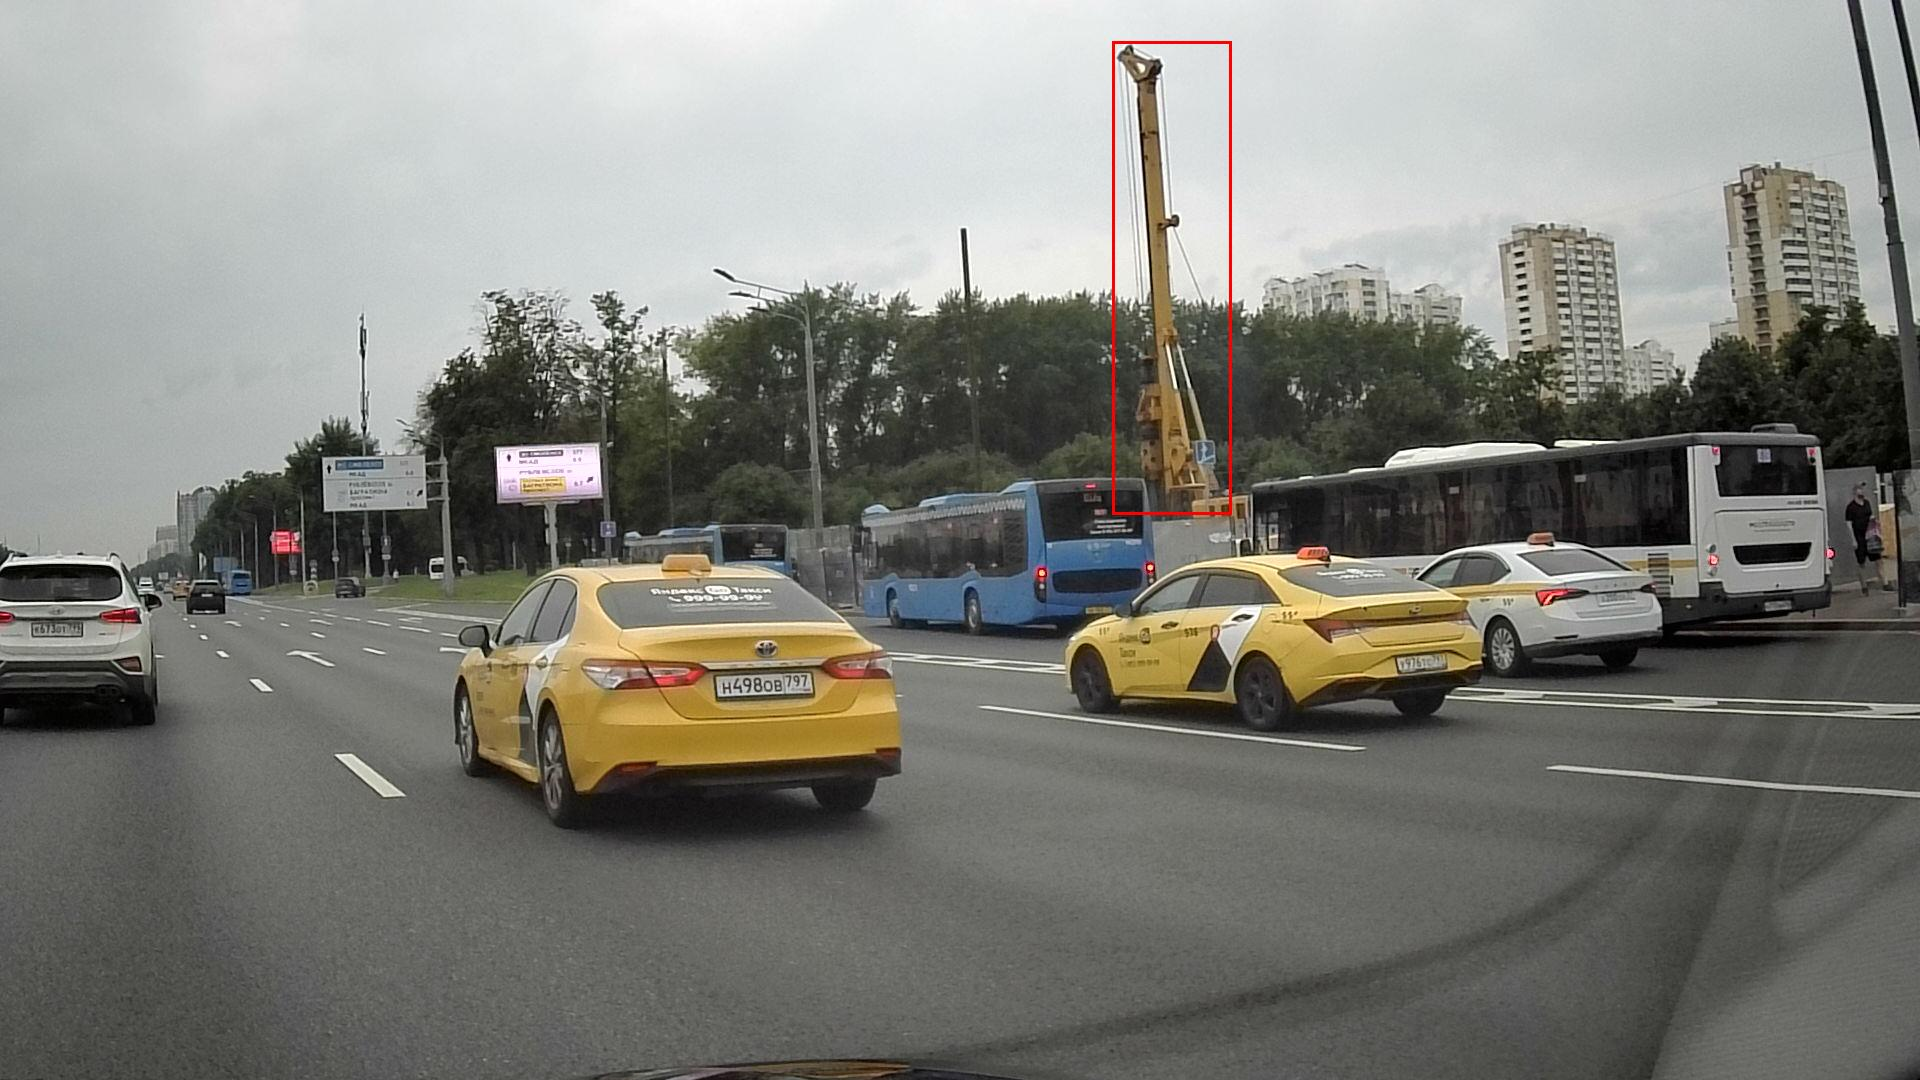


== Строительная площадка_18-001_Июль ==
Примеры выбросов (всего 540)
Камера=f20fbc2b-b369-4734-bb66-92af02fbb0d1, файл=0cf483c4-e1ae-4c28-85ba-eeaae3626d77.jpg, координаты=(45.04584, 33.97429), от центра=1217.7 км


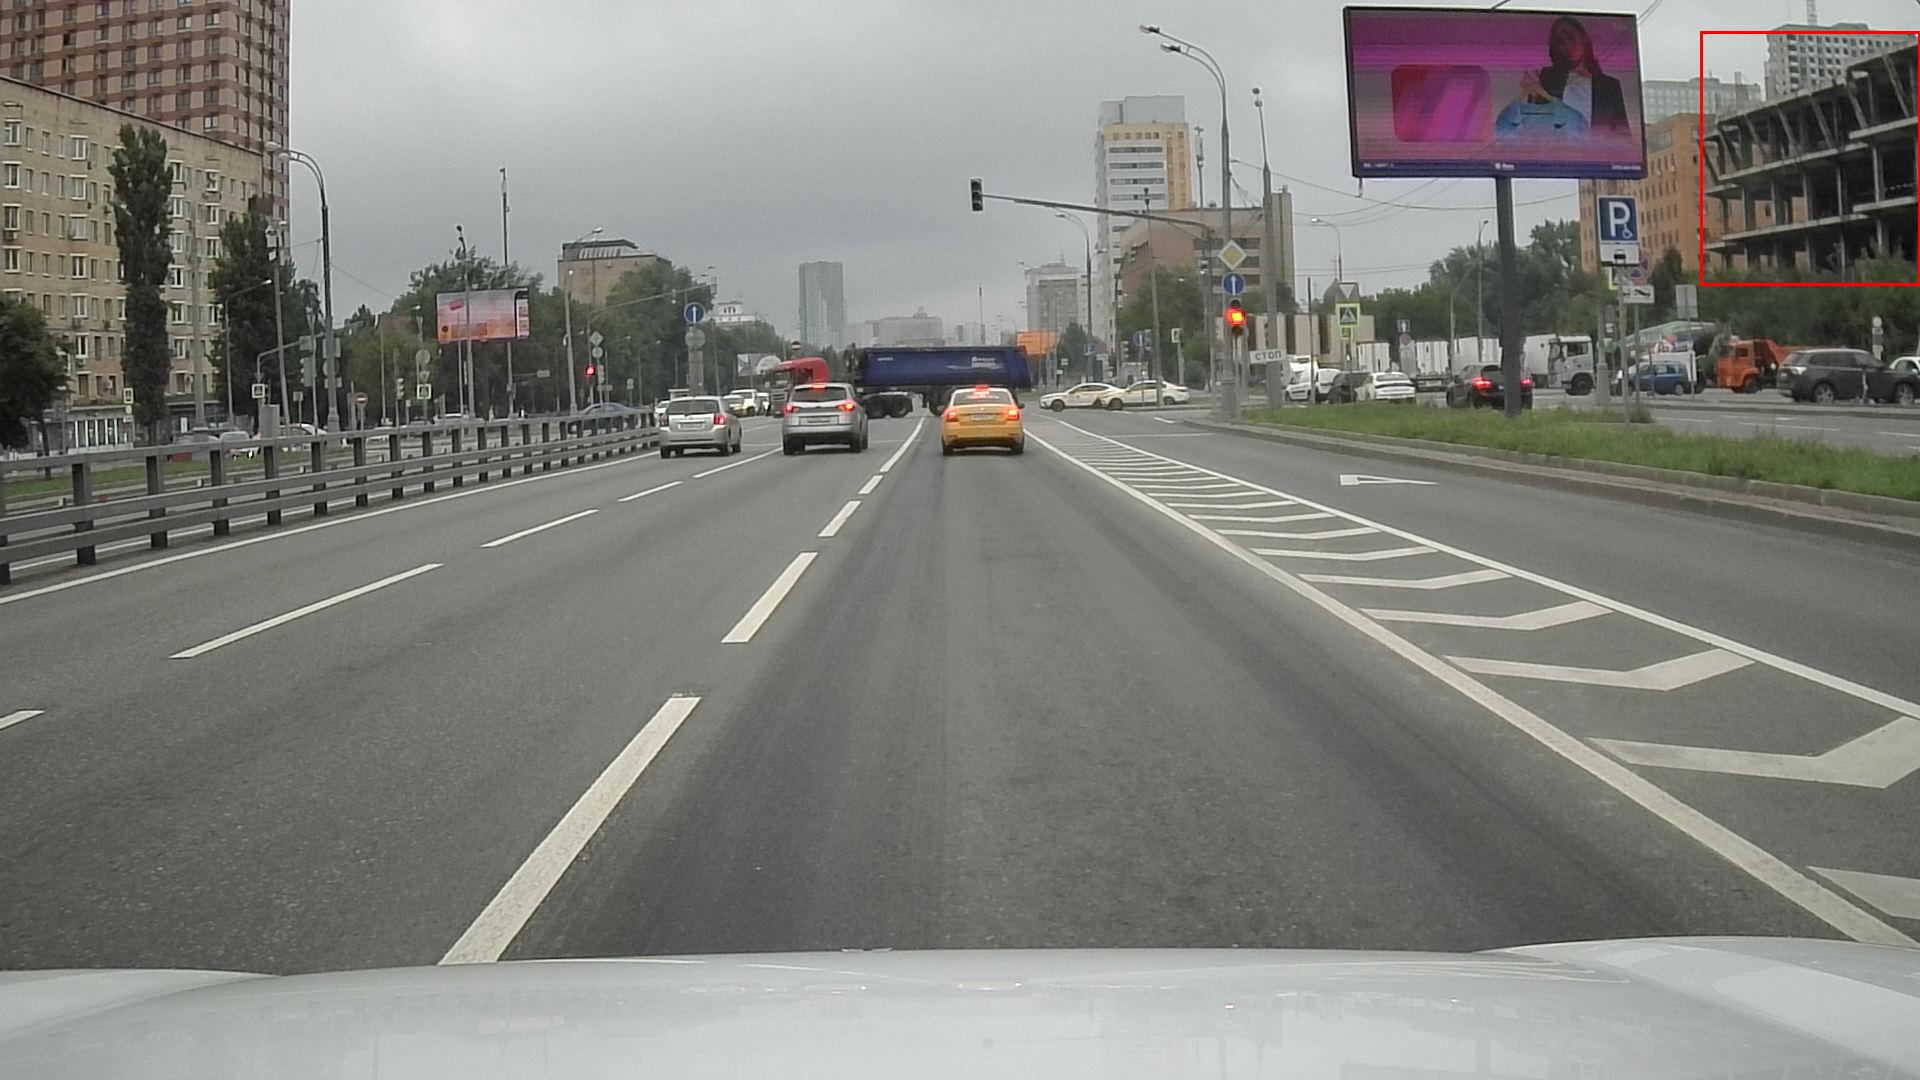

Камера=9f88688f-4c81-42a8-b76a-3c3e7edf869e, файл=b346fd67-4a6f-42e7-a652-2a6601506036.jpg, координаты=(45.04788, 33.97282), от центра=1217.5 км


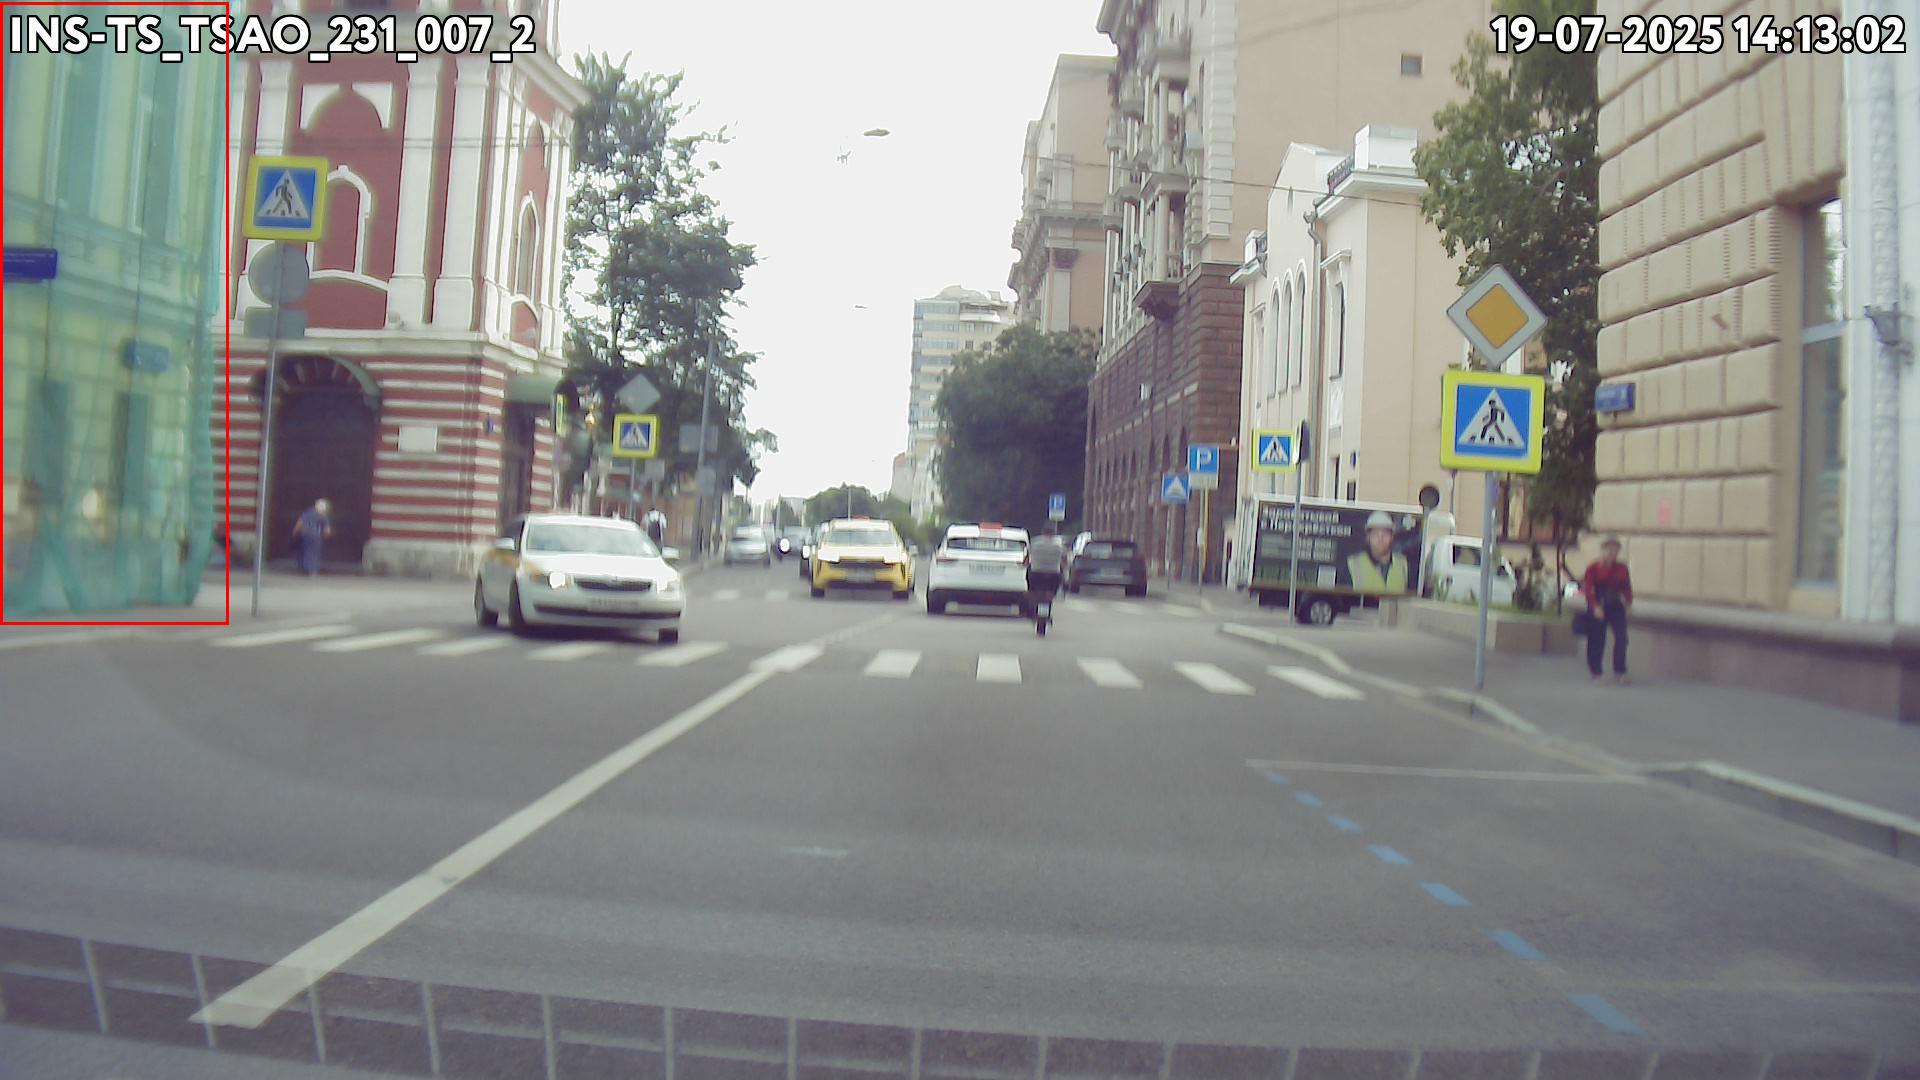

Камера=f389b777-2837-46f0-983f-56af24850601, файл=5b317adf-7859-4ce0-952f-f0459f7c03a6.jpg, координаты=(45.07211, 34.08770), от центра=1213.1 км


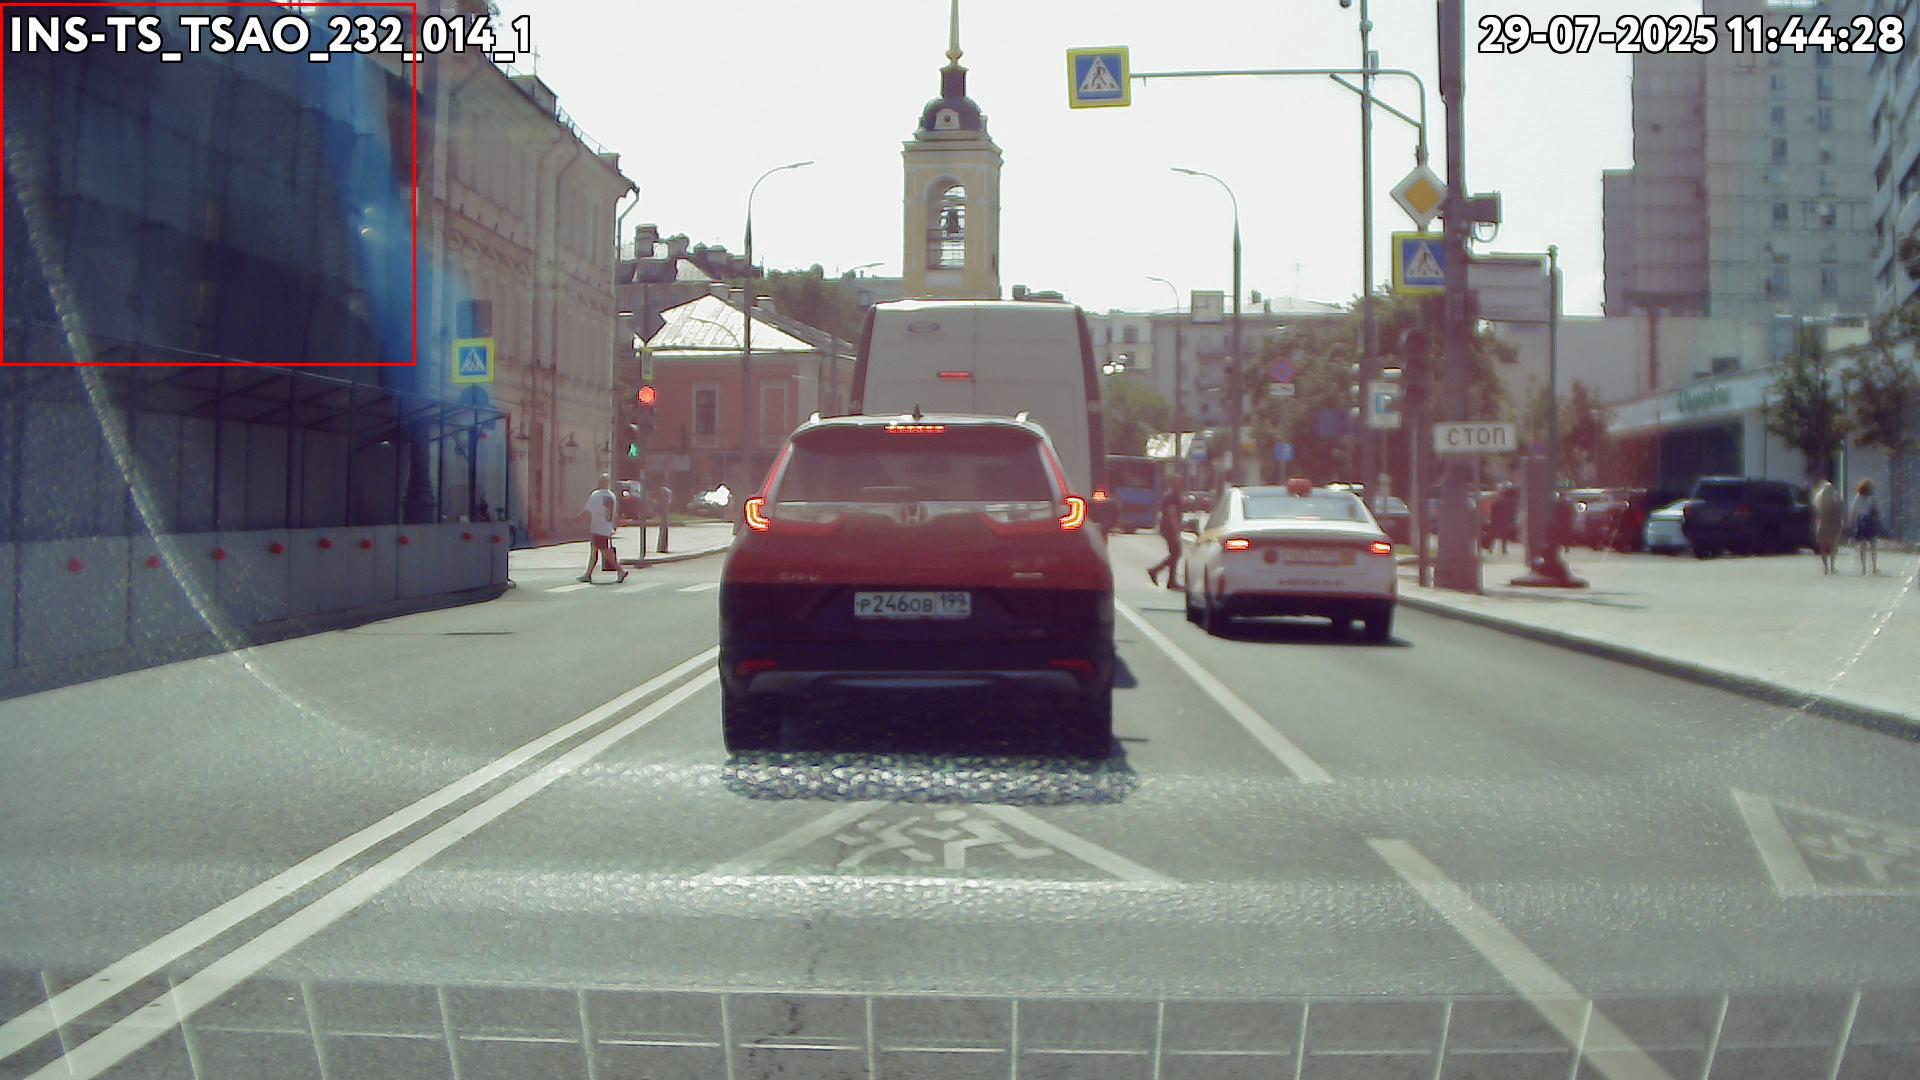

Камера=e90a3ac0-5b70-4ede-abeb-382371713306, файл=b463d9a5-da45-4ec3-be65-d7c7733575bb.jpg, координаты=(45.04993, 33.97298), от центра=1217.2 км


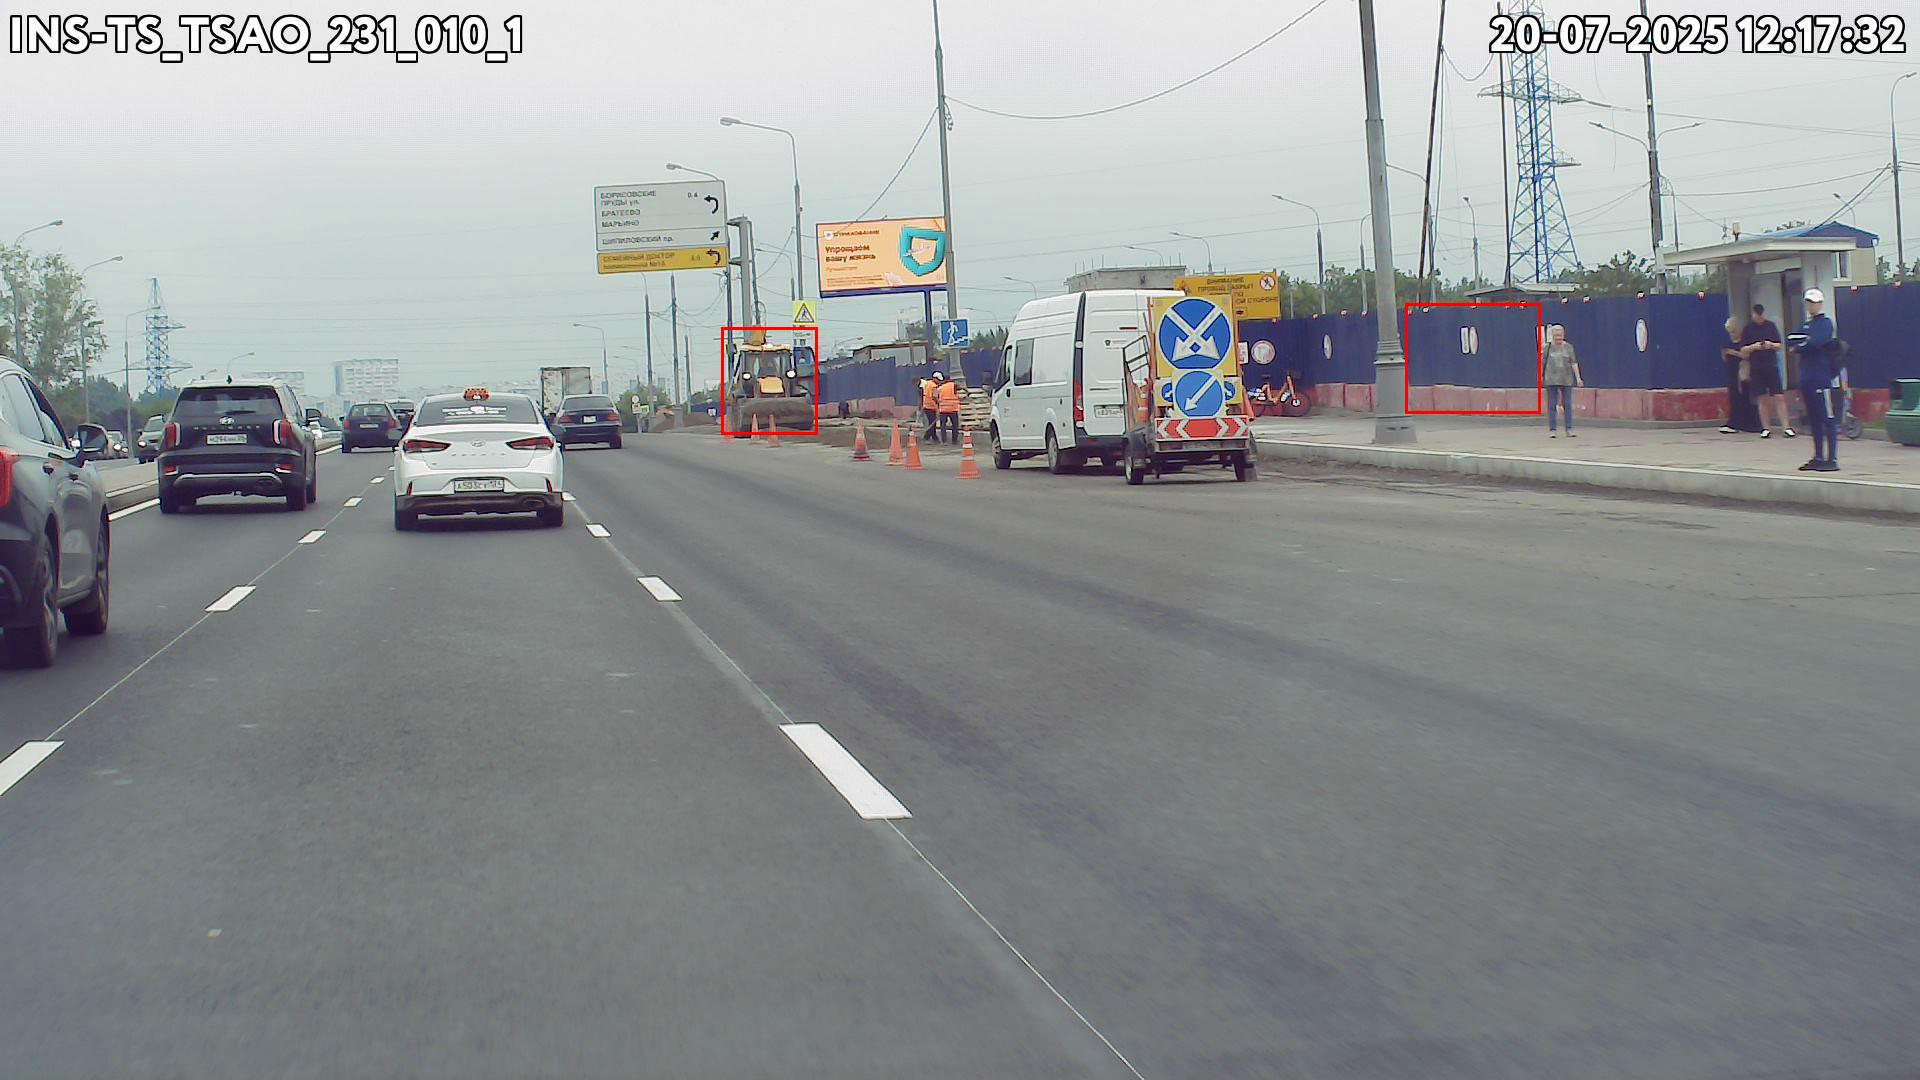

Камера=71239877-3cfe-4ed6-87a7-5c84ab51c75a, файл=cdc90e19-351e-4de8-974f-812131d550d3.jpg, координаты=(51.82241, 39.21279), от центра=449.2 км


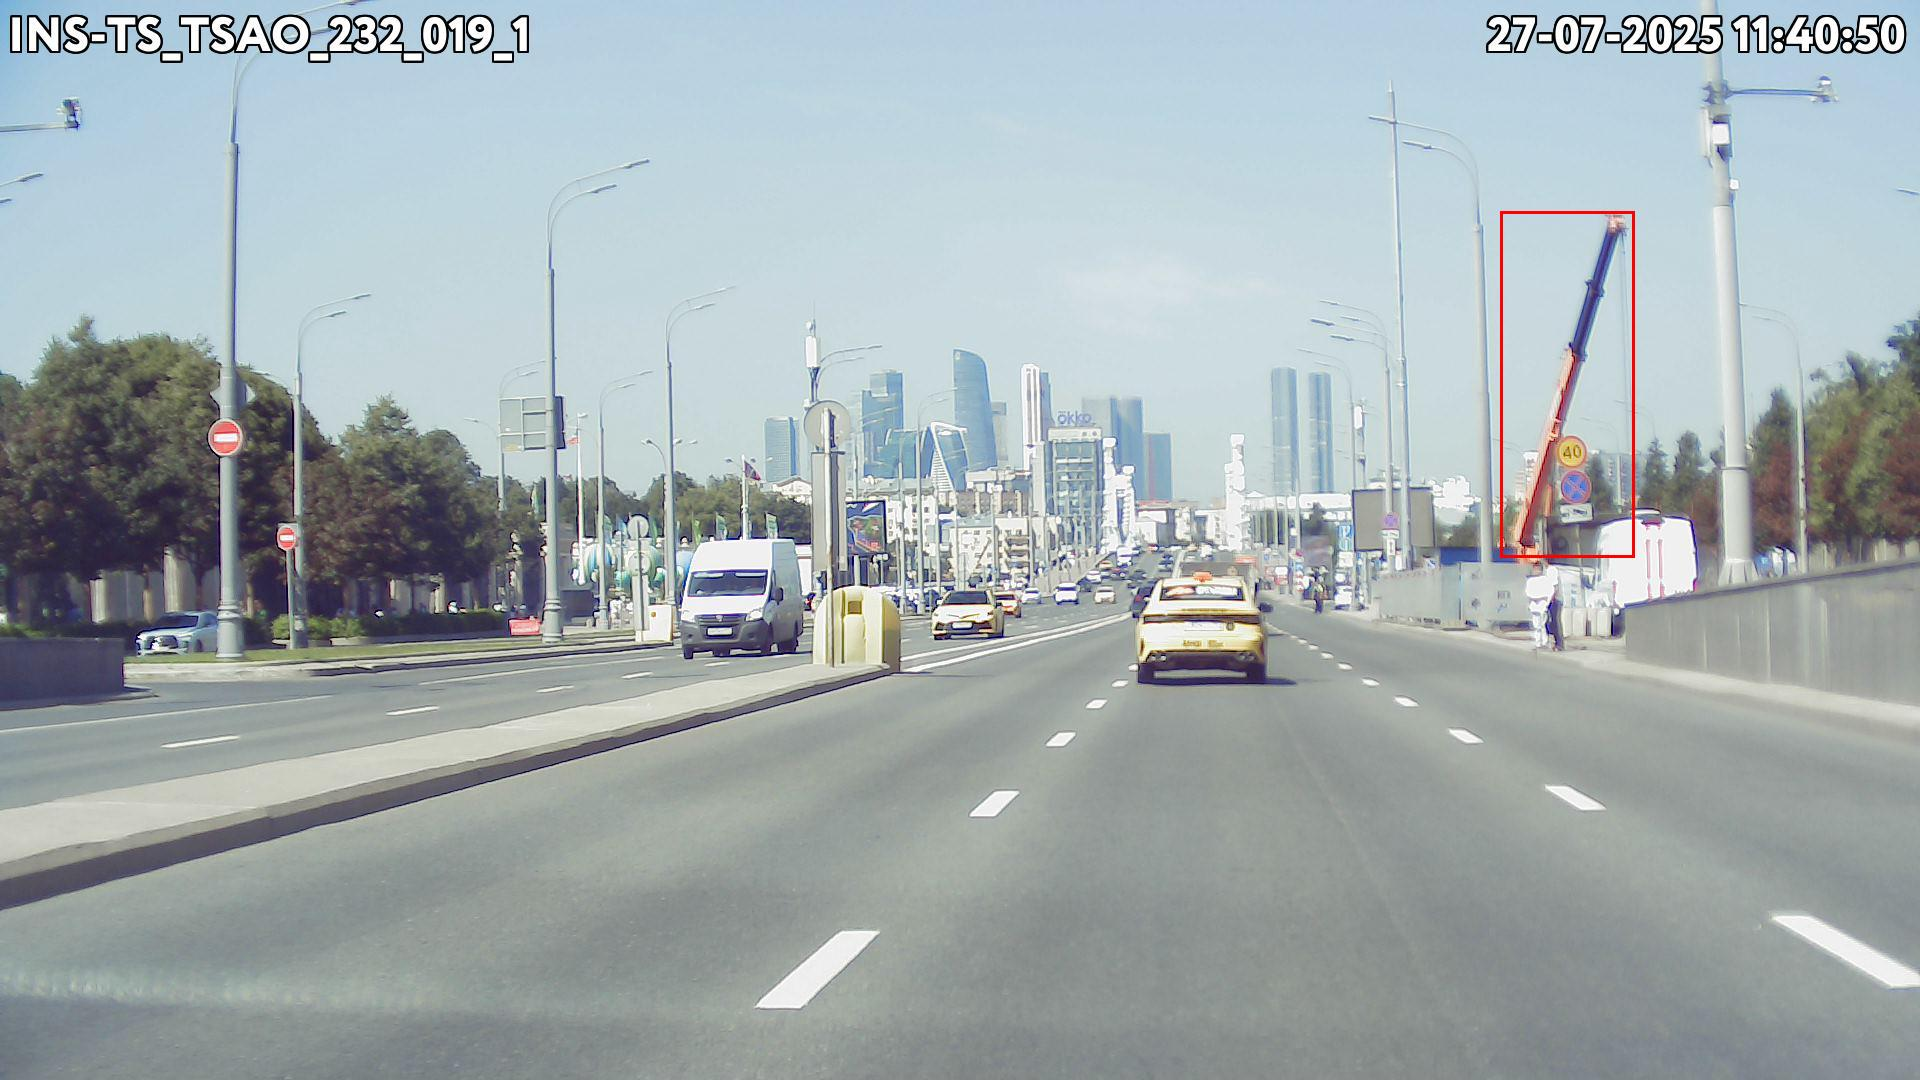

In [ ]:
from IPython.display import display, Image

N_SHOW = 5  # сколько картинок показать на датасет

for obj_name, dfx in coord_flags.items():
    bad = dfx[~dfx['moscow_ok']]
    if bad.empty:
        print(f"\n== {obj_name} ==\nВыбросов нет.")
        continue

    print(f"\n== {obj_name} ==\nПримеры выбросов (всего {len(bad)})")

    # выберем N_SHOW случайных
    sample_bad = bad.sample(min(N_SHOW, len(bad)), random_state=42)

    for idx, row in sample_bad.iterrows():
        lat, lon = row['latitude'], row['longitude']
        dist = row['dist_m_from_center']
        cam = row.get('camera', 'N/A')
        fn = row.get('Имя файла', 'N/A')
        path = row.get('Полный путь к файлу')

        print(f"Камера={cam}, файл={fn}, координаты=({lat:.5f}, {lon:.5f}), "
              f"от центра={dist/1000:.1f} км")

        if path and os.path.exists(path):
            display(Image(filename=path))
        else:
            print("  (Изображение недоступно)")


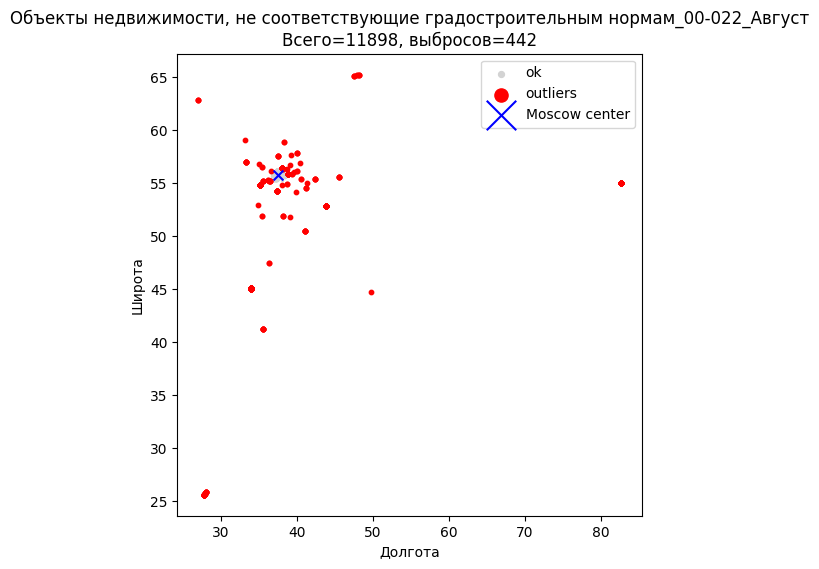

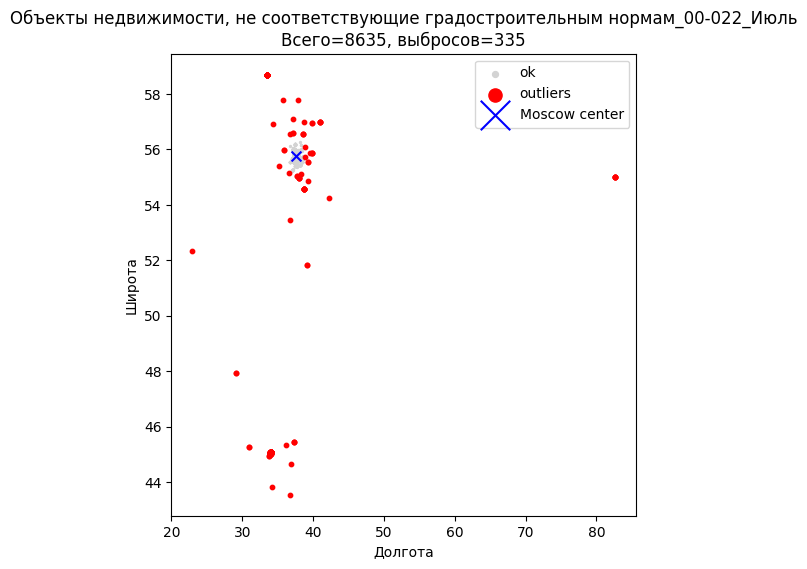

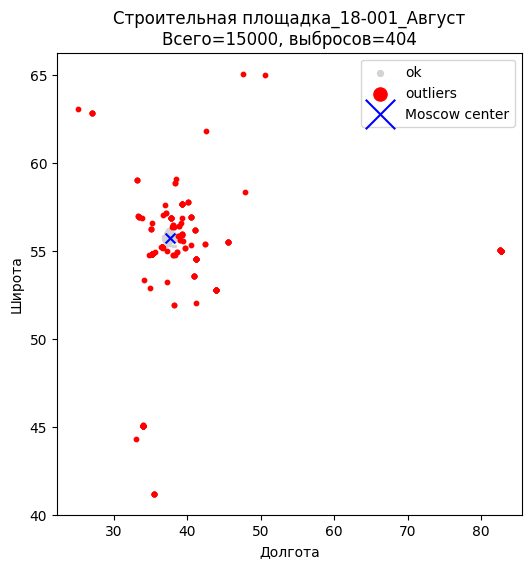

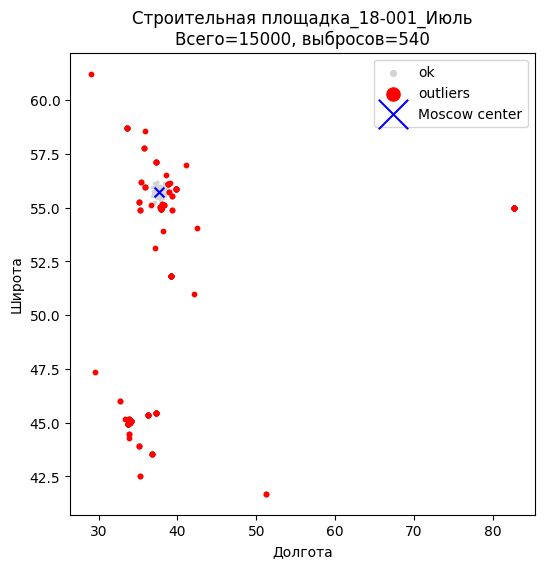

In [ ]:
import matplotlib.pyplot as plt

for obj_name, dfx in coord_flags.items():
    if dfx.empty or 'latitude' not in dfx.columns or 'longitude' not in dfx.columns:
        continue

    fig, ax = plt.subplots(figsize=(6,6))
    ok = dfx[dfx['moscow_ok']]
    bad = dfx[~dfx['moscow_ok']]

    # Все нормальные точки — серым
    ax.scatter(ok['longitude'], ok['latitude'], s=2, c='lightgray', label='ok')

    # Выбросы — красным
    if not bad.empty:
        ax.scatter(bad['longitude'], bad['latitude'], s=10, c='red', label='outliers')

    # Центр Москвы (Кремль)
    ax.scatter([CTR_LON], [CTR_LAT], c='blue', s=50, marker='x', label='Moscow center')

    ax.set_title(f"{obj_name}\nВсего={len(dfx)}, выбросов={len(bad)}")
    ax.set_xlabel("Долгота")
    ax.set_ylabel("Широта")
    ax.legend(markerscale=3)
    plt.show()


In [ ]:
import os
import pandas as pd
from datetime import datetime

# === 1) Папка для сохранения «очищенных» версий ===
SAVE_DIR = "/tmp/cleaned"
os.makedirs(SAVE_DIR, exist_ok=True)
ts = datetime.now().strftime("%Y%m%d_%H%M%S")

# === 2) Удаляем выбросы и собираем сводку ===
cleaned_data = {}
summary_rows = []

for obj_name, dfx in coord_flags.items():
    # защитные проверки
    if dfx is None or dfx.empty or 'moscow_ok' not in dfx.columns:
        print(f"[SKIP] {obj_name}: нет данных/флагов moscow_ok")
        continue

    n_all = len(dfx)
    n_bad = int((~dfx['moscow_ok']).sum())
    n_good = n_all - n_bad

    # не только фильтр, но и уберём явные NaN координаты
    keep_mask = dfx['moscow_ok'] & dfx['coord_notna']
    dfx_clean = dfx.loc[keep_mask].copy()

    # (опционально) простая дедупликация: по ['camera','Имя файла'] если есть
    dedup_keys = [c for c in ['camera','Имя файла'] if c in dfx_clean.columns]
    if dedup_keys:
        before = len(dfx_clean)
        dfx_clean = dfx_clean.drop_duplicates(subset=dedup_keys, keep='first')
        after = len(dfx_clean)
        dedup_removed = before - after
    else:
        dedup_removed = 0

    # Обновим основной контейнер loaded_data → заменить xlsx на очищенный
    # (сохраним только исходные колонки + добавим полезные признаки)
    base_df = loaded_data[obj_name]['xlsx']
    if base_df is not None:
        # переносим флаги обратно только для оставшихся строк (по индексу совпадает)
        # чтобы не потерять столбцы, делаем merge по уникальному ключу, если есть
        # 1) если есть 'Имя файла' — используем его как ключ
        if 'Имя файла' in base_df.columns and 'Имя файла' in dfx_clean.columns:
            to_save = base_df.merge(
                dfx_clean[['Имя файла','dist_m_from_center','in_core_box']],
                on='Имя файла', how='inner'
            )
        else:
            # fallback: по индексу пересечения
            to_save = base_df.loc[dfx_clean.index].copy()
            # приклеим метрики, если индексы совпадают
            to_save['dist_m_from_center'] = dfx_clean['dist_m_from_center']
            if 'in_core_box' in dfx_clean.columns:
                to_save['in_core_box'] = dfx_clean['in_core_box']
    else:
        to_save = dfx_clean.copy()

    loaded_data[obj_name]['xlsx'] = to_save
    cleaned_data[obj_name] = to_save

    # === 3) Сохранить на диск (CSV + Parquet) ===
    csv_path = os.path.join(SAVE_DIR, f"{obj_name}__clean_{ts}.csv")
    pq_path  = os.path.join(SAVE_DIR, f"{obj_name}__clean_{ts}.parquet")
    try:
        to_save.to_csv(csv_path, index=False)
    except Exception as e:
        print(f"[WARN] CSV save failed for {obj_name}: {e}")
    try:
        to_save.to_parquet(pq_path, index=False)
    except Exception as e:
        print(f"[WARN] Parquet save failed for {obj_name}: {e}")

    summary_rows.append({
        "dataset": obj_name,
        "n_all": n_all,
        "n_good": n_good - dedup_removed,
        "n_outliers_removed": n_bad,
        "n_dedup_removed": dedup_removed
    })

# === 4) Сводная таблица по очистке ===
clean_summary = pd.DataFrame(summary_rows).sort_values("dataset").reset_index(drop=True)
print("\n=== Итог очистки ===")
display(clean_summary)

print(f"\nФайлы сохранены в: {SAVE_DIR}")



=== Итог очистки ===


dataset  n_all  n_good  \
0  Объекты недвижимости, не соответствующие градо...  11898   11456   
1  Объекты недвижимости, не соответствующие градо...   8635    8300   
2                Строительная площадка_18-001_Август  15000   14596   
3                  Строительная площадка_18-001_Июль  15000   14460   

   n_outliers_removed  n_dedup_removed  
0                 442                0  
1                 335                0  
2                 404                0  
3                 540                0


Файлы сохранены в: /tmp/cleaned


In [ ]:
!pip install pyproj

In [ ]:
import numpy as np
import pandas as pd
from pyproj import Transformer

# WGS84 <-> UTM 37N для Москвы
to_utm = Transformer.from_crs("EPSG:4326", "EPSG:32637", always_xy=True)   # (lon,lat)->(E,N)
to_wgs = Transformer.from_crs("EPSG:32637", "EPSG:4326", always_xy=True)   # (E,N)->(lon,lat)

def latlon_to_EN(lat, lon):
    E, N = to_utm.transform(float(lon), float(lat))
    return float(E), float(N)

def EN_to_latlon(E, N):
    lon, lat = to_wgs.transform(float(E), float(N))
    return float(lat), float(lon)

def rect_cell_center(lat_lo, lat_hi, lon_lo, lon_hi):
    # центр ячейки в геодезии
    return ( (lat_lo+lat_hi)/2.0, (lon_lo+lon_hi)/2.0 )

def rect_cell_size_m(lat_lo, lat_hi, lon_lo, lon_hi):
    # размеры ячейки в метрах по ENU
    E1,N1 = latlon_to_EN(lat_lo, lon_lo)
    E2,N2 = latlon_to_EN(lat_lo, lon_hi)
    E3,N3 = latlon_to_EN(lat_hi, lon_lo)
    width_m  = abs(E2 - E1)
    height_m = abs(N3 - N1)
    # радиус для нормировки оффсета — половина диагонали
    R_cell = 0.5 * np.sqrt(width_m**2 + height_m**2)
    return width_m, height_m, R_cell


In [ ]:
# Сузим бокс «Москва»
LAT_MIN, LAT_MAX = 55.35, 56.00
LON_MIN, LON_MAX = 37.2,  38.0

# РУЧНЫЕ линии (edges) по широте и долготе, включая границы
lat_edges = [LAT_MIN, 55.55, 55.70, 55.82, 55.92, LAT_MAX]     # 5 полос (=> 5-1 = 4 ряда)
lon_edges = [LON_MIN, 37.35, 37.50, 37.65, 37.80, LON_MAX]     # 5 полос (=> 5-1 = 4 колонки)
# Итого 4x4=16 клеток (подстройки делай эмпирически)

def auto_grid_edges(df, lat_col='latitude', lon_col='longitude',
                    n_lat=4, n_lon=4, quant_clip=(0.02, 0.98)):
    # берём «ядро» распределения по квантилям, чтобы отрезать хвосты/выбросы
    lo_q, hi_q = quant_clip
    lat = df[lat_col].astype(float).values
    lon = df[lon_col].astype(float).values
    lat_min, lat_max = np.quantile(lat, [lo_q, hi_q])
    lon_min, lon_max = np.quantile(lon, [lo_q, hi_q])
    # равные квантильные разбиения
    lat_edges = np.quantile(lat[(lat>=lat_min)&(lat<=lat_max)], np.linspace(0,1,n_lat+1)).tolist()
    lon_edges = np.quantile(lon[(lon>=lon_min)&(lon<=lon_max)], np.linspace(0,1,n_lon+1)).tolist()
    # гарантия строгой монотонности (на случай повтора значений)
    lat_edges = np.unique(np.round(lat_edges, 6)).tolist()
    lon_edges = np.unique(np.round(lon_edges, 6)).tolist()
    return lat_edges, lon_edges

def assign_rect_cells(df, lat_edges, lon_edges,
                      lat_col='latitude', lon_col='longitude',
                      r_clip_m=150.0):
    """
    Выход: колонки
      - cell_row, cell_col, cell_id (строка вида 'r{iy}_c{ix}')
      - lat_c, lon_c (центр ячейки)
      - dE_m, dN_m (оффсет в метрах от центра)
      - dE_norm, dN_norm (нормированный оффсет, клип r_clip_m)
      - R_cell (половина диагонали ячейки, м)
    """
    df = df.copy()
    lat = df[lat_col].astype(float).values
    lon = df[lon_col].astype(float).values

    # индексы полос (в какую полосу попала точка)
    # numpy.digitize возвращает 1..len(edges)-1; преобразуем к 0-базе
    iy = np.digitize(lat, lat_edges) - 1
    ix = np.digitize(lon, lon_edges) - 1

    # маска валидных (внутри интервалов, а не на краю вне)
    valid = (iy >= 0) & (iy < len(lat_edges)-1) & (ix >= 0) & (ix < len(lon_edges)-1)

    # базовые поля
    df['cell_row'] = np.where(valid, iy, -1)
    df['cell_col'] = np.where(valid, ix, -1)
    df['cell_id']  = np.where(valid, [f"r{r}_c{c}" for r,c in zip(iy,ix)], "out")

    # центры и размеры
    lat_c = np.full(len(df), np.nan, dtype=float)
    lon_c = np.full(len(df), np.nan, dtype=float)
    R_cell = np.full(len(df), np.nan, dtype=float)

    for r in range(len(lat_edges)-1):
        for c in range(len(lon_edges)-1):
            m = valid & (iy==r) & (ix==c)
            if not np.any(m):
                continue
            lat_lo, lat_hi = lat_edges[r], lat_edges[r+1]
            lon_lo, lon_hi = lon_edges[c], lon_edges[c+1]
            la_c, lo_c = rect_cell_center(lat_lo, lat_hi, lon_lo, lon_hi)
            _, _, Rc = rect_cell_size_m(lat_lo, lat_hi, lon_lo, lon_hi)
            lat_c[m] = la_c; lon_c[m] = lo_c; R_cell[m] = Rc

    df['lat_c'] = lat_c
    df['lon_c'] = lon_c
    df['R_cell'] = R_cell

    # оффсеты в метрах относительно центра
    EN   = np.array([latlon_to_EN(la, lo) for la,lo in zip(lat, lon)], dtype=float)
    EN_c = np.array([latlon_to_EN(la, lo) for la,lo in zip(lat_c, lon_c)], dtype=float)
    dE = EN[:,0] - EN_c[:,0]
    dN = EN[:,1] - EN_c[:,1]
    df['dE_m'] = dE
    df['dN_m'] = dN

    # нормировка оффсета [-1,1] с клипом по r_clip_m (или по R_cell, если хочешь)
    R = np.where(np.isfinite(R_cell), np.minimum(R_cell, r_clip_m), r_clip_m)
    df['dE_norm'] = np.clip(dE / R, -1.0, 1.0)
    df['dN_norm'] = np.clip(dN / R, -1.0, 1.0)

    return df

def build_class_index(df, col='cell_id'):
    ids = sorted([c for c in df[col].unique() if c != 'out'])
    cell_to_idx = {c:i for i,c in enumerate(ids)}
    idx_to_cell = {i:c for c,i in cell_to_idx.items()}
    y = df[col].map(lambda c: cell_to_idx.get(c, -1)).astype(int)
    return y, cell_to_idx, idx_to_cell

def class_weights(df, y_col='y_cls', pow_=0.5):
    # w_c = 1 / (freq_c ** pow_)
    vc = df[y_col].value_counts().sort_index().values
    w = 1.0 / np.power(np.maximum(vc, 1), pow_)
    return w / w.mean()


In [ ]:
# Применяем разметку ячейками
for name in loaded_data:
    df = loaded_data[name]['xlsx']
    if df is None or not {'latitude','longitude'} <= set(df.columns):
        continue
    df_rect = assign_rect_cells(df, lat_edges, lon_edges,
                                lat_col='latitude', lon_col='longitude',
                                r_clip_m=150.0)   # или нормировка по R_cell
    # пересчитать оффсеты после ремапа — проще повторно вызвать assign_rect_cells:
    df_rect = assign_rect_cells(df_rect, lat_edges, lon_edges,
                                lat_col='latitude', lon_col='longitude',
                                r_clip_m=150.0)
    # собрать метки классов
    y_cls, cell_to_idx, idx_to_cell = build_class_index(df_rect, col='cell_id')
    df_rect['cell_idx'] = y_cls
    loaded_data[name]['rect'] = df_rect


In [ ]:
def grid_report(df_rect):
    vc = df_rect['cell_id'].value_counts()
    print(f"cells={vc.size} | min={int(vc.min())} | p25={int(vc.quantile(0.25))} | "
          f"median={int(vc.median())} | p75={int(vc.quantile(0.75))} | max={int(vc.max())}")
    return vc

all_rect = []
for name in loaded_data:
    if 'rect' in loaded_data[name]:
        tmp = loaded_data[name]['rect'].copy()
        tmp['dataset'] = name
        all_rect.append(tmp)
final_df = pd.concat(all_rect, ignore_index=True)
vc = grid_report(final_df)


cells=25 | min=10 | p25=131 | median=625 | p75=2782 | max=11905


In [ ]:
centers_by_idx = (final_df[final_df['cell_idx']>=0]
                  .groupby('cell_idx')[['lat_c','lon_c','R_cell']]
                  .first()
                  .to_dict('index'))

def decode_rect(pred_idx, dnorm_pred, centers_by_idx):
    lat_pred, lon_pred = [], []
    dnorm = dnorm_pred.detach().cpu().numpy()
    for i, ci in enumerate(pred_idx.detach().cpu().tolist()):
        info = centers_by_idx.get(int(ci))
        if info is None or not np.isfinite(info['R_cell']):
            lat_pred.append(np.nan); lon_pred.append(np.nan); continue
        R  = float(info['R_cell'])
        dE = float(dnorm[i,0]) * R
        dN = float(dnorm[i,1]) * R
        Ec, Nc = latlon_to_EN(info['lat_c'], info['lon_c'])
        la, lo = EN_to_latlon(Ec + dE, Nc + dN)
        lat_pred.append(la); lon_pred.append(lo)
    return torch.tensor(lat_pred, dtype=torch.float32), torch.tensor(lon_pred, dtype=torch.float32)



In [ ]:
import numpy as np, pandas as pd
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler
from PIL import Image
import torchvision.transforms as T
import torch
from torch.utils.data import Dataset

# 1) Собрать финальный df из прямоугольной разметки
all_rect = []
for name, bundle in loaded_data.items():
    if 'rect' in bundle and bundle['rect'] is not None:
        tmp = bundle['rect'].copy()
        tmp['dataset'] = name
        all_rect.append(tmp)
assert all_rect, "Нет loaded_data[*]['rect'] — сначала вызови assign_rect_cells(...)"
final_df = pd.concat(all_rect, ignore_index=True)

# (опц.) фильтруем валидные классы
final_df = final_df[final_df['cell_idx'] >= 0].reset_index(drop=True)

# 2) Сплит по камерам (антиликинг). Если нет колонки — случайный сплит
if 'camera' in final_df.columns:
    cams = final_df['camera'].dropna().unique().tolist()
    rng = np.random.default_rng(42)
    rng.shuffle(cams)
    cut = int(0.9 * len(cams))
    train_cams = set(cams[:cut]); val_cams = set(cams[cut:])
    train_df = final_df[final_df['camera'].isin(train_cams)].reset_index(drop=True)
    val_df   = final_df[final_df['camera'].isin(val_cams)].reset_index(drop=True)
else:
    msk = np.random.RandomState(42).rand(len(final_df)) < 0.9
    train_df = final_df[msk].reset_index(drop=True)
    val_df   = final_df[~msk].reset_index(drop=True)

print("train/val sizes:", len(train_df), len(val_df))

# 3) Dataset (как у тебя)
IMG_COL = 'Полный путь к файлу' if 'Полный путь к файлу' in final_df.columns else 'path'
img_size = 224
train_tfms = T.Compose([
    T.Resize((img_size, img_size)),
    T.ToTensor(),
    T.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
])
val_tfms = train_tfms

class GeoDataset(Dataset):
    def __init__(self, df, tfms):
        self.df = df.reset_index(drop=True)
        self.tfms = tfms
        self.cols = ['cell_idx','dE_norm','dN_norm','R_cell','lat_c','lon_c',
                     'E','N','Ec','Nc','cell_id','latitude','longitude']
    def __len__(self): return len(self.df)
    def __getitem__(self, i):
        row = self.df.iloc[i]
        path = row.get(IMG_COL, None)
        try:
            im = Image.open(path).convert('RGB')
        except Exception:
            im = Image.new('RGB', (img_size, img_size), (0,0,0))
        x = self.tfms(im)
        y_cls = int(row['cell_idx'])
        y_reg = np.array([row['dE_norm'], row['dN_norm']], dtype=np.float32)
        aux = {k: row[k] for k in self.cols if k in row}
        return x, y_cls, y_reg, aux

train_ds = GeoDataset(train_df, train_tfms)
val_ds   = GeoDataset(val_df,   val_tfms)

# 4) 🔁 Веса классов и WeightedRandomSampler (инверсия со сглаживанием)
cls_counts = train_df['cell_idx'].value_counts().sort_index()
class_weights = (1.0 / np.sqrt(np.maximum(cls_counts.values, 1))).astype('float32')
class_weights = class_weights / class_weights.mean()

# веса на сэмпл (по индексу train_df)
sample_weights = train_df['cell_idx'].map(lambda c: class_weights[int(c)]).astype('float32').values
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

# 5) Dataloaders (ВАЖНО: без shuffle при sampler)
train_dl = DataLoader(train_ds, batch_size=128, sampler=sampler, num_workers=2, pin_memory=True)
val_dl   = DataLoader(val_ds,   batch_size=128, shuffle=False,   num_workers=2, pin_memory=True)


train/val sizes: 41225 6692


In [ ]:
!pip install open-clip-torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.4 MB/s eta 0:00:00


In [ ]:
import torch, torch.nn as nn, torch.nn.functional as F
from torch.optim import AdamW
from tqdm import tqdm
import numpy as np
import pandas as pd

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# ---------- 0) Бэкбон CLIP (open_clip -> fallback timm) ----------
use_open_clip = True
import open_clip
clip_model, _, clip_preprocess = open_clip.create_model_and_transforms(
    'ViT-B-16', pretrained='laion2b_s34b_b88k', device=device
)
# Возьмём визуальный энкодер
bb = clip_model.visual.eval()  # заморожен
for p in bb.parameters(): p.requires_grad = False
feat_dim = clip_model.visual.output_dim  # обычно 512
# Если хочешь CLIP-препроцесс: переопредели tfms в своём Dataset на clip_preprocess


open_clip_model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

In [ ]:
# --- 1. КЭШ ЭМБЕДДИНГОВ CLIP (один проход) ---
import numpy as np, torch, torch.nn.functional as F
from tqdm import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
bb = bb.to(device).eval()       # твой CLIP визуальный энкодер

@torch.no_grad()
def encode_images(x):
    feats = bb(x.to(device))
    if isinstance(feats, (list, tuple)): feats = feats[0]
    return F.normalize(feats.float(), dim=-1)

def extract_cache(dl, out_path_npz):
    Z, Y, LAT, LON = [], [], [], []
    for (x, y_cls, _, aux) in tqdm(dl, desc=f"embed"):
        z = encode_images(x).cpu().numpy()       # [B,D], float32
        Z.append(z.astype(np.float16))           # сразу в fp16
        Y.append(y_cls.numpy().astype(np.int32))
        # для метрик:
        if isinstance(aux, dict):
            LAT.append(np.array(aux['latitude'],  dtype=np.float32))
            LON.append(np.array(aux['longitude'], dtype=np.float32))
        else:
            LAT.append(np.array([d['latitude']  for d in aux], dtype=np.float32))
            LON.append(np.array([d['longitude'] for d in aux], dtype=np.float32))
    Z   = np.concatenate(Z, axis=0)
    Y   = np.concatenate(Y, axis=0)
    LAT = np.concatenate(LAT, axis=0)
    LON = np.concatenate(LON, axis=0)
    np.savez_compressed(out_path_npz, z=Z, y=Y, lat=LAT, lon=LON)
    print(f"saved {out_path_npz}: Z{Z.shape} {Z.dtype}, Y{Y.shape}")

extract_cache(train_dl, "/tmp/clip_train.npz")
extract_cache(val_dl,   "/tmp/clip_val.npz")


embed: 100%|██████████| 323/323 [18:30<00:00,  3.44s/it]


saved /tmp/clip_train.npz: Z(41225, 512) float16, Y(41225,)


embed: 100%|██████████| 53/53 [03:00<00:00,  3.41s/it]


saved /tmp/clip_val.npz: Z(6692, 512) float16, Y(6692,)


In [ ]:
del bb
torch.cuda.empty_cache()


In [ ]:
data_tr = np.load("/tmp/clip_train.npz")
Ztr = torch.from_numpy(data_tr['z']).float().to(device)
ytr = torch.from_numpy(data_tr['y']).long().to(device)
Ztr = F.normalize(Ztr, dim=-1)

C = int(ytr.max().item()) + 1
D = Ztr.shape[1]

# ---------- 1) Центры прямоугольных ячеек (по class_idx) ----------
# final_df должен содержать lat_c/lon_c и cell_idx; возьмём по одному центру на класс
centers_df = (final_df[final_df['cell_idx']>=0]
              .groupby('cell_idx')[['lat_c','lon_c']].median().reset_index())
idx_to_center = {int(r.cell_idx):(float(r.lat_c), float(r.lon_c)) for _,r in centers_df.iterrows()}
num_classes = int(max(idx_to_center.keys()))+1
print(f"C={C}, D={D}")

prototypes = torch.empty(C, D, device=device)
with torch.no_grad():
    for c in range(C):
        m = (ytr == c)
        if m.any(): prototypes[c] = Ztr[m].mean(dim=0)
        else:       prototypes[c] = torch.randn(D, device=device)
    prototypes = torch.nn.functional.normalize(prototypes, dim=-1)
prototypes = torch.nn.Parameter(prototypes)

# ---------- 3) Оптимизатор только по прототипам ----------
opt = AdamW([prototypes], lr=5e-3, weight_decay=0.0)
tau = 0.07  # temperature
label_smoothing = 0.0
ce = nn.CrossEntropyLoss(label_smoothing=label_smoothing).to(device)

# опционально: EMA над прототипами (чуть сглаживает дрейф)
use_ema = True
ema_m = 0.99
proto_ema = prototypes.data.clone().detach()

def proto_post_step_renorm():
    with torch.no_grad():
        # держим на единичной сфере
        prototypes.data = F.normalize(prototypes.data, dim=-1)
        if use_ema:
            global proto_ema
            proto_ema = ema_m * proto_ema + (1.0 - ema_m) * prototypes.data

# ---------- 4) Декодинг в координаты центров классов ----------
def decode_center(pred_idx):
    # pred_idx: [B] Long
    lat = torch.tensor([idx_to_center.get(int(i), (np.nan, np.nan))[0] for i in pred_idx.tolist()],
                       dtype=torch.float32, device=device)
    lon = torch.tensor([idx_to_center.get(int(i), (np.nan, np.nan))[1] for i in pred_idx.tolist()],
                       dtype=torch.float32, device=device)
    return lat, lon

def haversine_m_torch(lat1, lon1, lat2, lon2):
    R = 6371000.0
    lat1 = torch.deg2rad(lat1); lon1 = torch.deg2rad(lon1)
    lat2 = torch.deg2rad(lat2); lon2 = torch.deg2rad(lon2)
    dlat = lat2 - lat1; dlon = lon2 - lon1
    a = torch.sin(dlat/2)**2 + torch.cos(lat1)*torch.cos(lat2)*torch.sin(dlon/2)**2
    return 2*R*torch.arcsin(torch.sqrt(a))

def _extract_latlon_from_aux(aux, device):
    if isinstance(aux, dict):
        la = aux['latitude']; lo = aux['longitude']
        la = la if isinstance(la, torch.Tensor) else torch.tensor(la, dtype=torch.float32)
        lo = lo if isinstance(lo, torch.Tensor) else torch.tensor(lo, dtype=torch.float32)
        return la.to(device), lo.to(device)
    else:
        la = torch.tensor([d['latitude'] for d in aux], dtype=torch.float32, device=device)
        lo = torch.tensor([d['longitude'] for d in aux], dtype=torch.float32, device=device)
        return la, lo

# ---------- 5) Быстрая валидация (несколько батчей) ----------
@torch.no_grad()
def quick_val(val_dl, max_batches=5):
    bb.eval()
    all_err = []
    acc_n = 0; acc_d = 0
    for bi, (x, y_cls, _, aux) in enumerate(val_dl):
        if bi >= max_batches: break
        x = x.to(device); y = y_cls.to(device)
        z = encode_images(x)                          # [B,D], L2
        P = F.normalize(prototypes.data, dim=-1)      # (C,D)
        logits = (z @ P.t()) / tau                    # [B,C]
        pred_idx = logits.argmax(dim=1)
        acc_n += int((pred_idx==y).sum()); acc_d += y.numel()

        lat_pred, lon_pred = decode_center(pred_idx)
        lat_gt,   lon_gt   = _extract_latlon_from_aux(aux, device)
        err = haversine_m_torch(lat_gt, lon_gt, lat_pred, lon_pred).detach().cpu().numpy()
        all_err.append(err)

    errs = np.concatenate(all_err) if all_err else np.array([], dtype=np.float32)
    acc = acc_n / max(1, acc_d)
    p50 = np.percentile(errs, 50) if errs.size else np.nan
    p90 = np.percentile(errs, 90) if errs.size else np.nan
    return acc, p50, p90


C=24, D=512


In [ ]:
# --- загрузим валид-кэш ---
data_va = np.load("/tmp/clip_val.npz")
Zva = torch.from_numpy(data_va['z']).float().to(device)
yva = torch.from_numpy(data_va['y']).long().to(device)
lat_va = torch.from_numpy(data_va['lat']).float().to(device)
lon_va = torch.from_numpy(data_va['lon']).float().to(device)
Zva = F.normalize(Zva, dim=-1)

# --- decode_center: тензорная версия по центрам классов ---
centers_df = (final_df[final_df['cell_idx']>=0]
              .groupby('cell_idx')[['lat_c','lon_c']].median().reset_index())
idx2lat = torch.tensor(centers_df['lat_c'].values, dtype=torch.float32, device=device)
idx2lon = torch.tensor(centers_df['lon_c'].values, dtype=torch.float32, device=device)
def decode_center(pred_idx: torch.Tensor):
    return idx2lat[pred_idx], idx2lon[pred_idx]

# --- быстрая геодезия ---
def haversine_m_torch(lat1, lon1, lat2, lon2):
    R = 6371000.0
    lat1 = torch.deg2rad(lat1); lon1 = torch.deg2rad(lon1)
    lat2 = torch.deg2rad(lat2); lon2 = torch.deg2rad(lon2)
    dlat = lat2 - lat1; dlon = lon2 - lon1
    a = torch.sin(dlat/2)**2 + torch.cos(lat1)*torch.cos(lat2)*torch.sin(dlon/2)**2
    return 2*R*torch.arcsin(torch.sqrt(a))

# --- класс-балансированный батч-сэмплинг по кэшу ---
idx_by_c = {c: torch.where(ytr==c)[0] for c in range(C)}
cls_counts = torch.tensor([len(idx_by_c[c]) for c in range(C)],
                          dtype=torch.float32, device=device)
# сглаженная инверсия частот
p_c = (1.0 / torch.sqrt(cls_counts.clamp_min(1.0)))
p_c = (p_c / p_c.sum()).detach().cpu().numpy()

def renorm():
    with torch.no_grad():
        prototypes.data = F.normalize(prototypes.data, dim=-1)

@torch.no_grad()
def full_val():
    P = F.normalize(prototypes, dim=-1)
    logits = (Zva @ P.t()) / tau
    pred   = logits.argmax(dim=1)
    acc    = (pred == yva).float().mean().item()
    latp, lonp = decode_center(pred)
    err = haversine_m_torch(lat_va, lon_va, latp, lonp).detach().cpu().numpy()
    return acc, float(np.percentile(err,50)), float(np.percentile(err,90)), float(err.mean())

# --- тренировка прототипов на кэше ---
opt = torch.optim.AdamW([prototypes], lr=5e-3, weight_decay=0.0)
ce  = nn.CrossEntropyLoss()
tau = 0.07

In [ ]:
import torch, torch.nn as nn, torch.nn.functional as F
import numpy as np
from tqdm import trange

# --- sanity ---
uniq = torch.unique(ytr).detach().cpu().numpy()
assert uniq.min() == 0 and uniq.max() == C-1
assert len(idx2lat) == C and len(idx2lon) == C

# ===== 1) Параметры модели =====
# логарифм масштаба (как в CLIP): s = exp(logit_scale)
logit_scale = nn.Parameter(torch.tensor(np.log(10.0), dtype=torch.float32, device=device))
# лёгкий линейный адаптер
D = Ztr.shape[1]
proj = nn.Linear(D, D, bias=False, device=device)
with torch.no_grad():
    proj.weight.copy_(torch.eye(D, device=device))

# прототипы (нормализованные)
prototypes = nn.Parameter(F.normalize(prototypes.data, dim=-1))

# веса классов (1/sqrt(freq))
idx_by_c = {c: torch.where(ytr==c)[0] for c in range(C)}
cls_counts = torch.tensor([len(idx_by_c[c]) for c in range(C)], dtype=torch.float32, device=device)
ce_w = (1.0 / torch.sqrt(cls_counts.clamp_min(1.0)))
ce = nn.CrossEntropyLoss(weight=ce_w)

opt = torch.optim.AdamW(
    [{'params': [prototypes], 'lr': 3e-3, 'weight_decay': 1e-4},
     {'params': proj.parameters(),   'lr': 3e-3, 'weight_decay': 1e-4},
     {'params': [logit_scale],       'lr': 1e-3, 'weight_decay': 0.0}],
)

# ===== 2) Гео-соседи на уровне классов (маска) =====
# матрица попарных расстояний центров (км)
def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1 = np.radians(lat1); lon1 = np.radians(lon1)
    lat2 = np.radians(lat2); lon2 = np.radians(lon2)
    dlat = lat2 - lat1; dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2*R*np.arcsin(np.sqrt(a))

lat_c = idx2lat.detach().cpu().numpy()
lon_c = idx2lon.detach().cpu().numpy()
# расстояние CxC
Dgeo = haversine_np(lat_c[:,None], lon_c[:,None], lat_c[None,:], lon_c[None,:])  # км
# берём K ближайших соседей каждого класса (включая сам класс)
K_GEO = min(32, C)
nbr_idx = np.argsort(Dgeo, axis=1)[:, :K_GEO]
nbr_idx_t = [torch.tensor(n, device=device, dtype=torch.long) for n in nbr_idx]

# ===== 3) Групповой семплинг: G классов × K примеров =====
def sample_indices_grouped(idx_by_c, p_c, G=128, K=4, rng=None, device='cuda'):
    rng = np.random.default_rng() if rng is None else rng
    classes = rng.choice(len(idx_by_c), size=G, replace=True, p=p_c)
    take = []
    for c in classes:
        pool = idx_by_c[c]
        if len(pool) == 0:
            continue
        ids = pool[rng.integers(0, len(pool), size=K)].tolist()
        take.extend(ids)
    if not take:
        # фоллбек
        for c in range(G):
            pool = idx_by_c[c]
            if len(pool):
                take.append(pool[np.random.randint(len(pool))].item())
    return torch.tensor(take, dtype=torch.long, device=device)

# вероятности классов для сэмплинга (1/sqrt(freq)) -> numpy
p_c = (1.0 / torch.sqrt(cls_counts.clamp_min(1.0)))
p_c = (p_c / p_c.sum()).detach().cpu().numpy()

# ===== 4) SupCon (теперь осмысленный — в батче K>1 на класс) =====
def supcon_loss(z, y, temp=0.1):
    z = F.normalize(z, dim=-1)
    sim = z @ z.t() / temp
    B = z.size(0)
    mask = y.unsqueeze(1).eq(y.unsqueeze(0)).float()
    logits_mask = 1.0 - torch.eye(B, device=z.device)
    exp_sim = torch.exp(sim) * logits_mask
    log_prob = sim - torch.log(exp_sim.sum(dim=1, keepdim=True) + 1e-8)
    pos = (mask * logits_mask).sum(1).clamp_min(1.0)
    mean_log_prob_pos = (mask * logits_mask * log_prob).sum(1) / pos
    return -mean_log_prob_pos.mean()

beta_supcon = 0.2

@torch.no_grad()
def full_val():
    P = F.normalize(prototypes, dim=-1)
    z = F.normalize(proj(Zva), dim=-1)
    s = torch.clamp(logit_scale.exp(), 1.0, 100.0)
    logits = s * (z @ P.t())
    pred   = logits.argmax(dim=1)
    acc    = (pred == yva).float().mean().item()
    latp, lonp = idx2lat[pred], idx2lon[pred]
    R = 6371000.0
    err = 2*R*torch.arcsin(torch.sqrt(
        torch.sin(torch.deg2rad(lat_va - latp)/2)**2 +
        torch.cos(torch.deg2rad(lat_va))*torch.cos(torch.deg2rad(latp))*
        torch.sin(torch.deg2rad(lon_va - lonp)/2)**2
    )).detach().cpu().numpy()
    return acc, float(np.percentile(err,50)), float(np.percentile(err,90)), float(err.mean())

def renorm():
    with torch.no_grad():
        prototypes.data = F.normalize(prototypes.data, dim=-1)

# ===== 5) Тренировка =====
EPOCHS = 30
G, K = 128, 4                     # => батч ~= G*K
STEPS_PER_EPOCH = 200
rng = np.random.default_rng(123)

for ep in range(1, EPOCHS+1):
    tot = 0.0
    for _ in trange(STEPS_PER_EPOCH, leave=False, desc=f"ep{ep}"):
        idx = sample_indices_grouped(idx_by_c, p_c, G=G, K=K, rng=rng, device=device)
        y = ytr[idx]
        z = F.normalize(proj(Ztr[idx]), dim=-1)
        P = F.normalize(prototypes, dim=-1)
        s = torch.clamp(logit_scale.exp(), 1.0, 100.0)

        # --- Локальная маска по геососедям (для каждого примера свои разрешённые классы) ---
        # логиты по всем классам
        logits_full = s * (z @ P.t())         # [B, C]
        # маска: -inf где класс не в списке соседей y_i
        mask = torch.full_like(logits_full, -1e9)
        # векторизованно заполняем разрешённые позиции
        # собираем индексы (i, nbr) для всех i в батче
        rows = []
        cols = []
        y_cpu = y.detach().cpu().numpy()
        start = 0
        for yi in y_cpu:
            nbrs = nbr_idx_t[yi]              # [K_GEO]
            m = nbrs.numel()
            rows.append(torch.arange(start, start+1, device=device).repeat(m))
            cols.append(nbrs)
            start += 1
        rows = torch.cat(rows)
        cols = torch.cat(cols)
        mask[rows, cols] = 0.0

        logits = logits_full + mask          # [B, C], у не-соседей -inf

        # CE по замаскированным логитам + SupCon
        loss = ce(logits, y) + beta_supcon * supcon_loss(z, y, temp=0.1)

        opt.zero_grad(set_to_none=True)
        loss.backward()
        opt.step()
        renorm()
        tot += loss.item()

    acc, p50, p90, mae = full_val()
    s_val = float(s.item())
    print(f"[{ep}/{EPOCHS}] loss={tot/STEPS_PER_EPOCH:.4f} | s={s_val:.1f} | acc={acc:.3f} | "
          f"p50={p50:.0f}m | p90={p90:.0f}m | mae={mae:.0f}m")


[1/30] loss=2.3513 | s=11.2 | acc=0.068 | p50=21285m | p90=37530m | mae=21905m


[2/30] loss=1.9949 | s=12.6 | acc=0.045 | p50=23554m | p90=38259m | mae=23663m


[3/30] loss=1.9253 | s=13.9 | acc=0.064 | p50=23923m | p90=39646m | mae=23753m


[4/30] loss=1.8913 | s=15.1 | acc=0.065 | p50=23544m | p90=39614m | mae=23930m


[5/30] loss=1.8511 | s=16.3 | acc=0.070 | p50=21032m | p90=38568m | mae=21832m


[6/30] loss=1.8396 | s=17.3 | acc=0.075 | p50=21750m | p90=36430m | mae=21587m


[7/30] loss=1.8157 | s=18.2 | acc=0.057 | p50=21785m | p90=38143m | mae=22073m


[8/30] loss=1.8042 | s=19.0 | acc=0.046 | p50=22793m | p90=37874m | mae=22811m


[9/30] loss=1.8072 | s=19.6 | acc=0.061 | p50=23259m | p90=39116m | mae=23410m


[10/30] loss=1.7792 | s=20.3 | acc=0.067 | p50=21376m | p90=34892m | mae=21169m


[11/30] loss=1.7816 | s=20.9 | acc=0.056 | p50=22479m | p90=38545m | mae=22563m


[12/30] loss=1.7798 | s=21.4 | acc=0.073 | p50=22271m | p90=37645m | mae=21993m


[13/30] loss=1.7725 | s=22.0 | acc=0.060 | p50=23381m | p90=38742m | mae=23216m


[14/30] loss=1.7635 | s=22.3 | acc=0.063 | p50=23139m | p90=39680m | mae=23311m


[15/30] loss=1.7718 | s=22.6 | acc=0.042 | p50=21785m | p90=37267m | mae=22103m


[16/30] loss=1.7664 | s=22.6 | acc=0.067 | p50=21873m | p90=35622m | mae=21772m


[17/30] loss=1.7458 | s=23.2 | acc=0.067 | p50=20419m | p90=35200m | mae=20803m


[18/30] loss=1.7454 | s=23.5 | acc=0.056 | p50=23050m | p90=38724m | mae=23208m


[19/30] loss=1.7464 | s=23.7 | acc=0.077 | p50=21318m | p90=37614m | mae=21267m


[20/30] loss=1.7480 | s=24.0 | acc=0.074 | p50=21643m | p90=34001m | mae=21170m


[21/30] loss=1.7487 | s=24.0 | acc=0.069 | p50=21869m | p90=37469m | mae=21872m


[22/30] loss=1.7487 | s=24.3 | acc=0.057 | p50=21800m | p90=36827m | mae=21776m


[23/30] loss=1.7301 | s=24.6 | acc=0.076 | p50=20663m | p90=34709m | mae=20711m


[24/30] loss=1.7303 | s=24.8 | acc=0.055 | p50=20727m | p90=34974m | mae=20918m


[25/30] loss=1.7403 | s=24.8 | acc=0.053 | p50=22294m | p90=36339m | mae=22112m


[26/30] loss=1.7200 | s=25.3 | acc=0.068 | p50=21461m | p90=37271m | mae=21533m


[27/30] loss=1.7459 | s=25.4 | acc=0.062 | p50=21300m | p90=35884m | mae=21243m


[28/30] loss=1.7211 | s=25.9 | acc=0.064 | p50=23788m | p90=40443m | mae=24114m


[29/30] loss=1.7244 | s=25.9 | acc=0.090 | p50=20765m | p90=33824m | mae=20364m


[30/30] loss=1.7244 | s=25.8 | acc=0.065 | p50=21389m | p90=37273m | mae=21364m
